# Telangana Growth Analysis

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 28px; font-weight: bold; text-align: justify; color: #555;">Objectives:</h2>
<ul style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">
  <li>Explore Stamp Registration, Transportation and Ts-Ipass Datasets.</li>
  <li>Understand their attributes, categories and time period.</li>
  <li>Analyze trends and patterns within each department.</li>
  <li>Identify growth opportunities and areas needing attention.</li>
  <li>Find correlation among these departments and report the overall growth of the state through insights and relevant visuals such as shape maps.</li>
</ul>

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">Step 1: Imports</h2>

Import relevant Python libraries and packages: `numpy`, `pandas`, `seaborn`, and `pyplot` from `matplotlib`.

In [1]:
# Import libraries and packages.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import iplot,init_notebook_mode,plot

Here we are initializes the Jupyter Notebook for interactive plotting with Plotly, ensures Matplotlib plots appear inline. These configurations are typically employed at the start of a notebook to establish the correct settings for subsequent code cells.

In [2]:
# Initialize Plotly notebook mode to enable interactive plotting in Jupyter Notebook
init_notebook_mode(connected=True)

# Enable inline plotting for Matplotlib in Jupyter Notebook 
%matplotlib inline

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">Load the dataset</h2>

<p style="font-size: 16px;">This dataset encompasses information from <strong>five</strong> CSV files, each providing valuable insights into different aspects of Telangana's economic landscape:</p>
<ul>
  <li style="font-size: larger;"><strong>dim_districts:</strong>
    <ul>
     <li><strong>dist_code:</strong> District code or identifier.</li>
     <li><strong>district:</strong> District name.</li>
    </ul>
  </li>
</ul>
<ul>
  <li style="font-size: larger;"><strong>dim_date:</strong>
    <ul>
     <li><strong>month:</strong> Starting date of each month.</li>
     <li><strong>Mmm:</strong> Month name.</li>
     <li><strong>quarter:</strong> Associated quarter.</li>
     <li><strong>fiscal_year:</strong> Corresponding fiscal year.</li>
    </ul>
  </li>
</ul>
<ul>
  <li style="font-size: larger;"><strong>fact_stamps:</strong>
    <ul>
     <li><strong>dist_code:</strong> District code.</li>
     <li><strong>month:</strong> Starting date of each month.</li>
     <li><strong>documents_registered_cnt:</strong> Total count of registered documents.</li>
     <li><strong>documents_registered_rev:</strong> Total revenue from registered documents.</li>
     <li><strong>estamps_challans_cnt:</strong> Count of e-stamps challans.</li>
     <li><strong>estamps_challans_rev:</strong> Revenue from e-stamps challans.</li>
    </ul>
  </li>
</ul>
<ul>
  <li style="font-size: larger;"><strong>fact_transport:</strong>
    <ul>
     <li><strong>dist_code:</strong> District code.</li>
     <li><strong>month:</strong> Starting date of each month.</li>
     <li><strong>Vehicle sales by fuel type: </strong> Petrol, Diesel, Electric, Others.</li>
     <li><strong>Vehicle sales by class: </strong> Motorcycles, Motorcars, Auto rickshaws, Agriculture, Others.</li>
     <li><strong>Vehicle sales by seating capacity: </strong> 1-3, 4-6, Above 6.</li>
     <li><strong>Other categories: </strong> Brand new, Pre-owned, Non-Transport, Transport.</li>
    </ul>
  </li>
</ul>
<ul>
  <li style="font-size: larger;"><strong>fact_TS_iPASS:</strong>
    <ul>
     <li><strong>dist_code:</strong> District code.</li>
     <li><strong>month:</strong> Starting date of each month.</li>
     <li><strong>sector: </strong> Industry category (e.g., Automobiles, Beverages).</li>
     <li><strong>investment in cr: </strong> Investment in crores.</li>
     <li><strong>number_of_employees: </strong> Number of employees in the sector.</li>
    </ul>
  </li>
</ul>

<p style="font-size: 16px;">This comprehensive dataset provides a multi-dimensional view of economic activities, including district details, monthly timelines, document registrations, vehicle sales, and industrial investments in Telangana.</p>

Configuring pandas to display all columns

In [3]:
# Set pandas option to display all columns when showing DataFrames
pd.set_option('display.max_columns', None)

In [4]:
# Load data
date = pd.read_csv("D:\DataScience\Projects\Portfolio\CODEBASIC_Telangana Growth Analysis\dataset\dim_date.csv")
districts = pd.read_csv("D:\DataScience\Projects\Portfolio\CODEBASIC_Telangana Growth Analysis\dataset\dim_districts.csv")
stamps = pd.read_csv(r"D:\DataScience\Projects\Portfolio\CODEBASIC_Telangana Growth Analysis\dataset\fact_stamps.csv")
transport = pd.read_csv(r"D:\DataScience\Projects\Portfolio\CODEBASIC_Telangana Growth Analysis\dataset\fact_transport.csv")
ts_ipass = pd.read_csv(r"D:\DataScience\Projects\Portfolio\CODEBASIC_Telangana Growth Analysis\dataset\fact_TS_iPASS.csv")

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">Step 2: Fundamental Exploration of Data</h2>

Let's initiate the data exploration process by examining each dataframe: `date`, `districts`, `stamps`, `transport`, and `ts_ipass`. We aim to gain insights into the data's structure and dimensions using the following methods:

- `.head()` : Provides a preview of the initial rows in the dataframe.
- `.info()` : Offers a concise summary of the dataframe, including data types and non-null counts.
- `.describe()`: Presents statistical information about the numerical columns in the dataframe.

Our objective is to better understand the nature of the data and its potential implications.

In [5]:
date.head()

,month,Mmm,quarter,fiscal_year
0,2019-04-01,Apr,Q1,2019
1,2019-05-01,May,Q1,2019
2,2019-06-01,Jun,Q1,2019
3,2019-07-01,Jul,Q2,2019
4,2019-08-01,Aug,Q2,2019


In [6]:
districts.head()

,dist_code,district
0,19_1,Adilabad
1,22_2,Bhadradri Kothagudem
2,21_1,Hanumakonda
3,16_1,Hyderabad
4,20_2,Jagtial


In [7]:
stamps.head()

,dist_code,month,documents_registered_cnt,documents_registered_rev,estamps_challans_cnt,estamps_challans_rev
0,14_1,2019-04-01,4533,59236363,0,0
1,17_3,2019-04-01,4151,41508762,0,0
2,20_3,2019-04-01,2116,23674170,0,0
3,21_5,2019-04-01,1089,15915285,0,0
4,23_1,2019-04-01,6133,82593256,0,0


In [8]:
transport.head()

,dist_code,month,fuel_type_petrol,fuel_type_diesel,fuel_type_electric,fuel_type_others,vehicleClass_MotorCycle,vehicleClass_MotorCar,vehicleClass_AutoRickshaw,vehicleClass_Agriculture,vehicleClass_others,seatCapacity_1_to_3,seatCapacity_4_to_6,seatCapacity_above_6,Brand_new_vehicles,Pre-owned_vehicles,category_Non-Transport,category_Transport
0,15_1,2019-04-01,17910,3011,76,22,15308,4429,0,4,1278,16110,4182,717,19542,1477,19856,1163
1,18_2,2019-04-01,3066,306,6,0,2995,142,49,64,128,3156,189,33,3322,56,3203,175
2,20_3,2019-04-01,1577,215,0,0,1546,79,29,21,117,1683,104,5,1751,41,1648,144
3,21_3,2019-04-01,1961,281,2,0,1939,72,72,48,113,2082,146,16,2209,35,2075,169
4,21_7,2019-04-01,1552,309,0,0,1512,76,69,109,95,1696,145,20,1820,41,1701,160


In [9]:
ts_ipass.head()

,dist_code,month,sector,investment in cr,number_of_employees
0,14_1,01-04-2019,Engineering,2.3200,15
1,19_1,01-04-2019,Engineering,0.6250,13
2,20_3,01-04-2019,Wood and Leather,0.2000,8
3,20_3,01-04-2019,Textiles,0.2675,27
4,21_5,01-04-2019,Electrical and Electronic Products,0.1200,5


In [10]:
date.describe()

,fiscal_year
count,48.000000
mean,2020.500000
std,1.129865
min,2019.000000
25%,2019.750000
50%,2020.500000
75%,2021.250000
max,2022.000000


<p style="font-family: Arial, sans-serif; font-size: 16px; color: #555; text-align: justify;">The Date dataset provides information on the fiscal year, covering a span of 48 months from 2019 to 2022. The mean fiscal year is around 2020.5, with a standard deviation of approximately 1.13. The dataset includes 33 unique districts, with each district having a unique district code.</p>

In [11]:
districts.describe()

,dist_code,district
count,33,33
unique,33,33
top,19_1,Adilabad
freq,1,1


<p style="font-family: Arial, sans-serif; font-size: 16px; color: #555; text-align: justify;">The Districts dataset consists of 33 districts, each uniquely identified by a district code. The dataset provides a brief overview, with `dist_code` and `district` columns. Each district occurs only once in the dataset.</p>

In [12]:
stamps.describe()

,documents_registered_cnt,documents_registered_rev,estamps_challans_cnt,estamps_challans_rev
count,1504.000000,1.504000e+03,1504.000000,1.504000e+03
mean,3238.007314,1.962961e+08,1944.861037,1.467299e+08
std,4196.002256,5.224591e+08,3740.305328,4.963718e+08
min,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,1013.500000,1.840655e+07,0.000000,0.000000e+00
50%,1964.500000,3.512241e+07,805.000000,1.799040e+07
75%,3952.500000,9.339799e+07,2198.000000,5.299411e+07
max,31310.000000,4.073496e+09,30526.000000,4.294273e+09


<p style="font-family: Arial, sans-serif; font-size: 16px; color: #555; text-align: justify;">The Stamps dataset offers insights into document registrations and estamp challan payments. The dataset includes information on documents registered, revenue generated, estamp challans, and associated revenue. The statistics indicate variations in counts and revenues, with some districts having higher values than others.</p>

In [13]:
transport.describe()

,fuel_type_petrol,fuel_type_diesel,fuel_type_electric,fuel_type_others,vehicleClass_MotorCycle,vehicleClass_MotorCar,vehicleClass_AutoRickshaw,vehicleClass_Agriculture,vehicleClass_others,seatCapacity_1_to_3,seatCapacity_4_to_6,seatCapacity_above_6,Brand_new_vehicles,Pre-owned_vehicles,category_Non-Transport,category_Transport
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000
mean,3835.600694,659.294444,71.985417,62.131250,3340.268750,719.743056,93.850694,135.912500,339.327778,3750.516667,768.715278,108.190278,4317.778472,311.343056,4213.104861,416.016667
std,5245.789804,684.823903,247.599599,204.991263,4349.406167,1455.487272,197.178758,118.486063,449.467763,4609.407242,1413.933293,209.771880,5531.411539,648.260389,5693.800420,525.924176
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,6.000000,0.000000,6.000000,0.000000
25%,1346.250000,261.750000,2.000000,2.000000,1229.750000,123.000000,16.000000,49.000000,122.000000,1486.250000,154.000000,20.000000,1629.750000,57.000000,1497.000000,149.000000
50%,2067.500000,445.500000,8.000000,6.000000,1887.000000,228.500000,36.000000,105.000000,199.000000,2244.500000,273.000000,38.000000,2457.000000,101.000000,2295.000000,250.000000
75%,3412.000000,744.000000,35.000000,34.000000,3149.250000,432.500000,90.000000,189.000000,332.250000,3635.500000,543.500000,75.250000,4095.250000,167.000000,3783.250000,449.250000
max,39689.000000,5270.000000,2782.000000,2326.000000,35420.000000,8036.000000,2287.000000,786.000000,4299.000000,36694.000000,7918.000000,1337.000000,42073.000000,4450.000000,42074.000000,4239.000000


<h3 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">Fuel Types:</h3>
<ul style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">
  <li><strong>Petrol:</strong> Mean of approximately 3,836 units with a wide distribution from 0 to 39,689 units.</li>
  <li><strong>Diesel:</strong> Mean around 659 units with a range from 0 to 5,270 units.</li>
  <li><strong>Electric:</strong> Mean of about 72 units with a distribution from 0 to 2,782 units.</li>
  <li><strong>Others:</strong> Mean of 62 units with a standard deviation of 205.</li>
</ul>

<h3 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">Vehicle Classes:</h3>
<ul style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">
  <li><strong>Motorcycle:</strong> Mean around 3,340 units with a diverse distribution.</li>
  <li><strong>Motorcar:</strong> Mean approximately 720 units with a wide range from 0 to 8,036 units.</li>
  <li><strong>Auto Rickshaw:</strong> Mean about 94 units with a standard deviation of 197.</li>
  <li><strong>Agriculture:</strong> Mean around 136 units with a standard deviation of 118.</li>
</ul>

<h3 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">Seating Capacity:</h3>
<ul style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">
  <li><strong>1 to 3:</strong> Mean of 3,751 units with a standard deviation of 4,610.</li>
  <li><strong>4 to 6:</strong> Mean approximately 769 units with a standard deviation of 1,414.</li>
  <li><strong>Above 6:</strong> Mean around 108 units with a standard deviation of 209.</li>
</ul>

<h3 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">Other Categories:</h3>
<ul style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">
  <li><strong>Brand New Vehicles:</strong> Mean of approximately 4,318 units with a standard deviation of 5,531.</li>
  <li><strong>Pre-owned Vehicles:</strong> Mean around 311 units with a wide distribution from 6 to 42,074 units.</li>
  <li><strong>Non-Transport Category:</strong> Mean of about 4,213 units with a standard deviation of 5,694.</li>
  <li><strong>Transport Category:</strong> Mean approximately 416 units with a standard deviation of 526.</li>
</ul>

In [14]:
ts_ipass.describe()

,investment in cr,number_of_employees
count,5753.000000,5753.000000
mean,17.231612,117.344168
std,257.427190,1398.725287
min,0.000000,0.000000
25%,0.220000,7.000000
50%,0.740000,15.000000
75%,3.120000,40.000000
max,17793.350800,57000.000000


<h3 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">Investment in Crores:</h3>
<ul style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">
  <li>Range from 0 to 17,793.35 crores with a mean of approximately 17.23 crores.</li>
  <li>Standard deviation of 257.43, indicating diversity in investment amounts.</li>
</ul>
<h3 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">Number of Employees:</h3>
<ul style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">
  <li>Range from 0 to 57,000 employees with a mean of around 117.34 employees.</li>
  <li>Standard deviation of 1,398.73, indicating variability in workforce sizes.</li>
</ul>

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">Identify the number of rows and columns</h2>

Identify the number of rows and columns in the dataset. This will help you get a sense of how much data you are working with.

In [15]:
date.shape

(48, 4)

In [16]:
districts.shape

(33, 2)

In [17]:
stamps.shape

(1504, 6)

In [18]:
transport.shape

(1440, 18)

In [19]:
ts_ipass.shape

(5753, 5)

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">Quick summary of the dataframes.</h2>

Generating a brief summary of the dataframe, outlining data types and the number of non-null entries.

In [20]:
# Showcase the data types for each column in the 'date' dataframe.
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   month        48 non-null     object
 1   Mmm          48 non-null     object
 2   quarter      48 non-null     object
 3   fiscal_year  48 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 1.6+ KB


In [21]:
# Showcase the data types for each column in the 'districts' dataframe.
districts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   dist_code  33 non-null     object
 1   district   33 non-null     object
dtypes: object(2)
memory usage: 656.0+ bytes


In [22]:
# Showcase the data types for each column in the 'stamps' dataframe.
stamps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504 entries, 0 to 1503
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   dist_code                 1504 non-null   object
 1   month                     1504 non-null   object
 2   documents_registered_cnt  1504 non-null   int64 
 3   documents_registered_rev  1504 non-null   int64 
 4   estamps_challans_cnt      1504 non-null   int64 
 5   estamps_challans_rev      1504 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 70.6+ KB


In [23]:
# Showcase the data types for each column in the 'transport' dataframe.
transport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   dist_code                  1440 non-null   object
 1   month                      1440 non-null   object
 2   fuel_type_petrol           1440 non-null   int64 
 3   fuel_type_diesel           1440 non-null   int64 
 4   fuel_type_electric         1440 non-null   int64 
 5   fuel_type_others           1440 non-null   int64 
 6   vehicleClass_MotorCycle    1440 non-null   int64 
 7   vehicleClass_MotorCar      1440 non-null   int64 
 8   vehicleClass_AutoRickshaw  1440 non-null   int64 
 9   vehicleClass_Agriculture   1440 non-null   int64 
 10  vehicleClass_others        1440 non-null   int64 
 11  seatCapacity_1_to_3        1440 non-null   int64 
 12  seatCapacity_4_to_6        1440 non-null   int64 
 13  seatCapacity_above_6       1440 non-null   int64 
 14  Brand_ne

In [24]:
# Showcase the data types for each column in the 'ts_ipass' dataframe.
ts_ipass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5753 entries, 0 to 5752
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dist_code            5753 non-null   object 
 1   month                5753 non-null   object 
 2   sector               5753 non-null   object 
 3   investment in cr     5753 non-null   float64
 4   number_of_employees  5753 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 224.9+ KB


<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">Step 3: Data cleaning</h2>

Begin by checking for null values in `districts` , `date`, `stamps`, `transport`, `ts_ipass` dataframes

In [25]:
# Missing values table
def missing_values_table(df):
        # Getting total missing values
        mis_val = df.isnull().sum()
        
        # Calculating the percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # New table with both missing values and the percentage of missing values
        mis_val_tab = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        ren_mis_val_table_columns = mis_val_tab.rename(columns = {0 : 'Missing Values', 1 : '% of Total Missing Values'})
        
        # Sort the table in descending order by percentage of missing values
        ren_mis_val_table_columns = ren_mis_val_table_columns[ren_mis_val_table_columns.iloc[:,1] != 0].sort_values(
        '% of Total Missing Values', ascending=False).round(1)
        
        # Printing some summary 
        print ("\033[1mThe dataframe has total " + str(df.shape[1]) + " columns.\033[0m \n")
        print ("\033[1mThere are " 
               + str(ren_mis_val_table_columns.shape[0]) + " columns that have missing values.\033[0m \n")
        
        # Return the dataframe with missing info
        return ren_mis_val_table_columns

In [26]:
missing_val_date = missing_values_table(date)
missing_val_date.style.background_gradient(cmap='Oranges')

The dataframe has total 4 columns. 

There are 0 columns that have missing values. 



,Missing Values,% of Total Missing Values


In [27]:
missing_val_districts = missing_values_table(districts)
missing_val_districts.style.background_gradient(cmap='Oranges')

The dataframe has total 2 columns. 

There are 0 columns that have missing values. 



,Missing Values,% of Total Missing Values


In [28]:
missing_val_stamps = missing_values_table(stamps)
missing_val_stamps.style.background_gradient(cmap='Oranges')

The dataframe has total 6 columns. 

There are 0 columns that have missing values. 



,Missing Values,% of Total Missing Values


In [29]:
missing_val_transport = missing_values_table(transport)
missing_val_transport.style.background_gradient(cmap='Oranges')

The dataframe has total 18 columns. 

There are 0 columns that have missing values. 



,Missing Values,% of Total Missing Values


In [30]:
missing_val_ts_ipass = missing_values_table(ts_ipass)
missing_val_ts_ipass.style.background_gradient(cmap='Oranges')

The dataframe has total 5 columns. 

There are 0 columns that have missing values. 



,Missing Values,% of Total Missing Values


<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">Modify the data types</h2>

Notice that the data type of the `month` in all columns are an `object`&mdash;in this case, a string. Convert this column to `datetime` to make it more usable. 

In [31]:
# Apply necessary datatype conversions.
date['month'] = pd.to_datetime(date['month'])
stamps['month'] = pd.to_datetime(stamps['month'])
transport['month'] = pd.to_datetime(transport['month'])
ts_ipass['month'] = pd.to_datetime(ts_ipass['month'])

In [32]:
# Display the data types of the columns.
date.dtypes

month          datetime64[ns]
Mmm                    object
quarter                object
fiscal_year             int64
dtype: object

In [33]:
# Display the data types of the columns.
stamps.dtypes

dist_code                           object
month                       datetime64[ns]
documents_registered_cnt             int64
documents_registered_rev             int64
estamps_challans_cnt                 int64
estamps_challans_rev                 int64
dtype: object

In [34]:
# Display the data types of the columns.
transport.dtypes

dist_code                            object
month                        datetime64[ns]
fuel_type_petrol                      int64
fuel_type_diesel                      int64
fuel_type_electric                    int64
fuel_type_others                      int64
vehicleClass_MotorCycle               int64
vehicleClass_MotorCar                 int64
vehicleClass_AutoRickshaw             int64
vehicleClass_Agriculture              int64
vehicleClass_others                   int64
seatCapacity_1_to_3                   int64
seatCapacity_4_to_6                   int64
seatCapacity_above_6                  int64
Brand_new_vehicles                    int64
Pre-owned_vehicles                    int64
category_Non-Transport                int64
category_Transport                    int64
dtype: object

In [35]:
# Display the data types of the columns.
ts_ipass.dtypes

dist_code                      object
month                  datetime64[ns]
sector                         object
investment in cr              float64
number_of_employees             int64
dtype: object

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">Issues with `month` labels in all dataset and `Mmm` label in date dataset</h2>

<ul>
    <li><strong>month:</strong> This column contains the starting date of each month.</li>
    <li><strong>Mmm:</strong> This column contains the name of the month.</li>
</ul>

Begin by renaming the columns name `month` to `date`, in  `dim_date`, `fact_stamps`, `fact_transport`, `fact_TS_iPASS`. Then rename the columns called `Mmm` to `month` in `dim_date`. 

In [36]:
# Rename the 'month' column to 'date' in the DataFrame date, stamps, transport.
date.rename(columns={'month': 'start_date'}, inplace=True)
stamps.rename(columns={'month': 'start_date'}, inplace=True)
transport.rename(columns={'month': 'start_date'}, inplace=True)

In [37]:
# Rename the 'Mmm' column to 'month' in the DataFrame date.
date.rename(columns={'Mmm': 'month'}, inplace=True)

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">Create a new column</h2>

In the `fact_TS_iPASS` dataframe, there's an issue with the `month` column where the date and month values are swapped. 

**Note:** `2019-01-04` should have `01` as the date and `04` as the month, according to the metadata.

In [38]:
# Swapping the date and month values and storing them in a new column
ts_ipass['start_date'] = ts_ipass['month'].dt.strftime('%Y-%d-%m')

# Apply necessary datatype conversions.
ts_ipass['start_date'] = pd.to_datetime(ts_ipass['start_date'])

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">Drop column</h2>

Here we are droping `month` column from `fact_TS_iPASS` dataframe.

In [39]:
# Now 'month' column is no longer needed, so we are dropping it.
ts_ipass.drop('month', axis=1, inplace=True)

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">Check for duplicates in the data</h2>

In [40]:
# Check for duplicates.
date.drop_duplicates().shape

(48, 4)

In [41]:
# Check for duplicates.
districts.drop_duplicates().shape

(33, 2)

In [42]:
# Check for duplicates.
stamps.drop_duplicates().shape

(1504, 6)

In [43]:
# Check for duplicates.
transport.drop_duplicates().shape

(1440, 18)

In [44]:
# Check for duplicates.
ts_ipass.drop_duplicates().shape

(5753, 5)

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">Check for Outliers in the data</h2>

Handling outliers in data cleaning is vital for accurate analyses and robust models, preventing distortions in statistical measures and ensuring data quality.

Examining for anomalies within the `documents_registered_cnt` category. 

In [45]:
stamps.head()

,dist_code,start_date,documents_registered_cnt,documents_registered_rev,estamps_challans_cnt,estamps_challans_rev
0,14_1,2019-04-01,4533,59236363,0,0
1,17_3,2019-04-01,4151,41508762,0,0
2,20_3,2019-04-01,2116,23674170,0,0
3,21_5,2019-04-01,1089,15915285,0,0
4,23_1,2019-04-01,6133,82593256,0,0


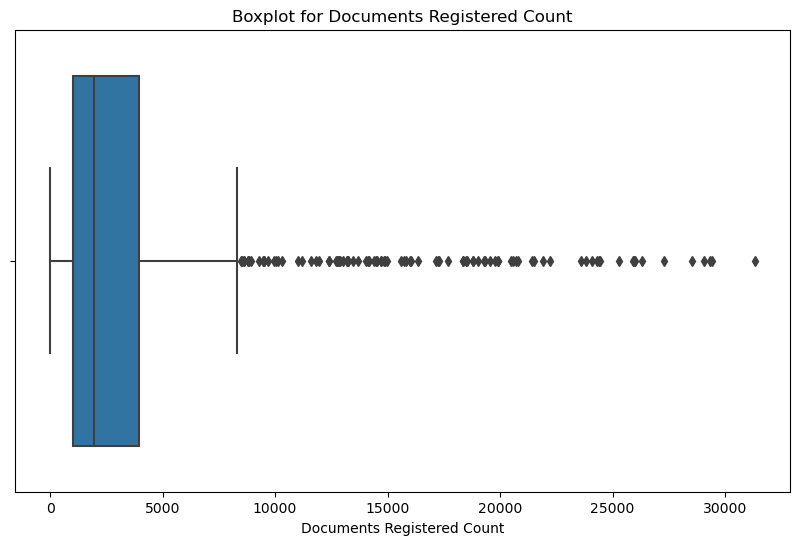

In [46]:
plt.figure(figsize=(10, 6))

# Boxplot for 'documents_registered_cnt'
sns.boxplot(x='documents_registered_cnt', data=stamps)

# Set plot labels and title
plt.xlabel('Documents Registered Count')
plt.title('Boxplot for Documents Registered Count')

# Show the plot
plt.show()

In [47]:
# Calculate 25th percentile of annual 'documents_registered_cnt'
percentile25 = stamps['documents_registered_cnt'].quantile(0.25)

# Calculate 75th percentile of annual 'documents_registered_cnt'
percentile75 = stamps['documents_registered_cnt'].quantile(0.75)

# Calculate interquartile range
iqr = percentile75 - percentile25

# Calculate upper and lower thresholds for outliers
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print('Lower limit is: ', lower_limit)
print('Upper limit is: ', upper_limit)

Lower limit is:  -3395.0
Upper limit is:  8361.0


In [48]:
stamps_doc_cnt = stamps[['start_date', 'documents_registered_cnt', 'dist_code']]

In [49]:
lower_doc_cnt = stamps_doc_cnt[stamps_doc_cnt['documents_registered_cnt'] < lower_limit]
print(lower_doc_cnt)

Empty DataFrame
Columns: [start_date, documents_registered_cnt, dist_code]
Index: []


In [50]:
upper_doc_cnt = stamps_doc_cnt[stamps_doc_cnt['documents_registered_cnt'] > upper_limit]
upper_doc_cnt.reset_index(drop=True, inplace=True)
print(upper_doc_cnt)

   start_date  documents_registered_cnt dist_code
0  2019-04-01                     14140      15_2
1  2019-04-01                     29436      15_1
2  2019-05-01                      8787      23_3
3  2019-05-01                      8494      17_2
4  2019-05-01                     31310      15_1
..        ...                       ...       ...
90 2023-01-01                     17671      15_1
91 2023-02-01                     19027      15_1
92 2023-02-01                     12810      15_2
93 2023-03-01                     14960      15_2
94 2023-03-01                     21524      15_1

[95 rows x 3 columns]


In [51]:
# Merge the two DataFrames based on the 'dist_code' column
upper_cnt_dist = pd.merge(upper_doc_cnt, districts, on='dist_code')

In [52]:
upper_doc_cnt = pd.merge(upper_cnt_dist, date, on='start_date')
upper_doc_cnt = upper_doc_cnt[['district', 'documents_registered_cnt', 'month', 'quarter', 'fiscal_year' ]]
upper_doc_cnt

,district,documents_registered_cnt,month,quarter,fiscal_year
0,Medchal_Malkajgiri,14140,Apr,Q1,2019
1,Rangareddy,29436,Apr,Q1,2019
2,Medchal_Malkajgiri,16036,May,Q1,2019
3,Rangareddy,31310,May,Q1,2019
4,Yadadri Bhuvanagiri,8787,May,Q1,2019
...,...,...,...,...,...
90,Rangareddy,17671,Jan,Q4,2022
91,Medchal_Malkajgiri,12810,Feb,Q4,2022
92,Rangareddy,19027,Feb,Q4,2022
93,Medchal_Malkajgiri,14960,Mar,Q4,2022


In [53]:
upper_doc_cnt['district'].unique()

array(['Medchal_Malkajgiri', 'Rangareddy', 'Yadadri Bhuvanagiri',
       'Sangareddy', 'Nalgonda'], dtype=object)

In [54]:
upper_doc_cnt['month'].unique()

array(['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec',
       'Jan', 'Feb', 'Mar'], dtype=object)

In [55]:
upper_doc_cnt['quarter'].unique()

array(['Q1', 'Q2', 'Q3', 'Q4'], dtype=object)

In [56]:
upper_doc_cnt['fiscal_year'].unique()

array([2019, 2020, 2021, 2022], dtype=int64)

In analyzing these outliers, it becomes evident that neither the `month`, `quarter`, nor `fiscal year` appears to be a decisive factor, as there is no consistent occurrence of these outliers within any specific `month`, `quarter`, or `fiscal year`. Therefore, our focus will be solely on the `districts`.

In [57]:
# Calculate the total count of registered documents for each 'dist_code'
# using the 'groupby' and 'agg' functions
district_documents_totals = stamps.groupby('dist_code').agg({
    'documents_registered_cnt': 'sum'
})

# Display the resulting DataFrame with the aggregated information
print(district_documents_totals.head())

           documents_registered_cnt
dist_code                          
14_1                         140380
14_2                          76296
14_3                         115078
14_4                          85580
14_5                          51242


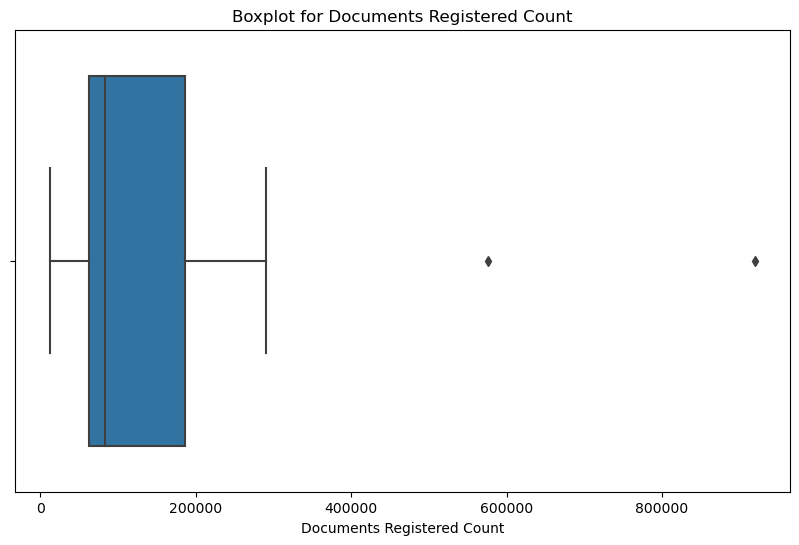

In [58]:
# Create a figure with a specified size
plt.figure(figsize=(10, 6))

# Generate a boxplot for the 'documents_registered_cnt' column in the 'dist_stamps' DataFrame
sns.boxplot(x='documents_registered_cnt', data=district_documents_totals)

# Set labels for the x-axis and the plot title
plt.xlabel('Documents Registered Count')
plt.title('Boxplot for Documents Registered Count')

# Display the plot
plt.show()

In [59]:
# Calculate the 25th percentile of annual 'documents_registered_cnt'
percentile_25 = district_documents_totals['documents_registered_cnt'].quantile(0.25)

# Calculate the 75th percentile of annual 'documents_registered_cnt'
percentile_75 = district_documents_totals['documents_registered_cnt'].quantile(0.75)

# Calculate the interquartile range (IQR)
iqr = percentile_75 - percentile_25

# Calculate the upper threshold for outliers using 1.5 times the IQR
upper_outlier_limit = percentile_75 + 1.5 * iqr

# Display the calculated upper limit for outliers
print('Upper limit for outliers is:', upper_outlier_limit)

Upper limit for outliers is: 372946.375


In [60]:
# Filter and merge districts where 'documents_registered_cnt' exceeds the upper outlier limit
merged_outlier_districts = pd.merge(
    district_documents_totals[district_documents_totals['documents_registered_cnt'] > upper_outlier_limit],
    districts,
    on='dist_code'
)

# Display the merged DataFrame
print(merged_outlier_districts)

  dist_code  documents_registered_cnt            district
0      15_1                    919064          Rangareddy
1      15_2                    575722  Medchal_Malkajgiri


Let's identify potential outliers in revenue collection, specifically in the `documents_registered_rev`, `estamps_challans_cnt`, 	`estamps_challans_rev` columns. Our analysis will be concentrated on `districts` exclusively.

Examining for anomalies within the `documents_registered_rev` category. 

In [61]:
# Calculate the total count of registered documents for each 'dist_code' in the stamps DataFrame
revenue_documents_totals = stamps.groupby('dist_code').agg({
    'documents_registered_rev': 'sum'
})

# Display the resulting DataFrame with the aggregated revenue information
print(revenue_documents_totals.head())

           documents_registered_rev
dist_code                          
14_1                     3186731550
14_2                      978779682
14_3                     1358262744
14_4                     1126819540
14_5                      722273314


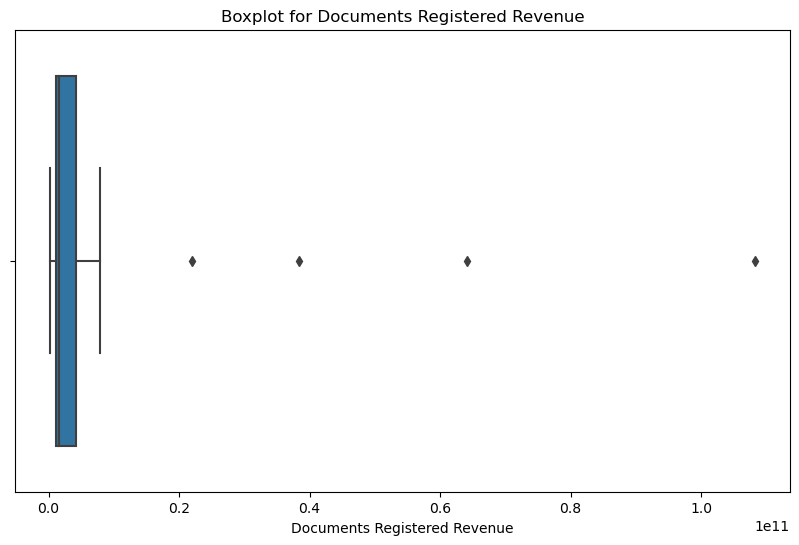

In [62]:
# Create a figure with a specified size
plt.figure(figsize=(10, 6))

# Generate a boxplot for the 'documents_registered_rev' column in the 'stamps' DataFrame
sns.boxplot(x='documents_registered_rev', data=revenue_documents_totals)

# Set labels for the x-axis and the plot title
plt.xlabel('Documents Registered Revenue')
plt.title('Boxplot for Documents Registered Revenue')

# Display the plot
plt.show()

In [63]:
# Calculate the 25th percentile of annual 'documents_registered_rev'
percentile_25_rev = revenue_documents_totals['documents_registered_rev'].quantile(0.25)

# Calculate the 75th percentile of annual 'documents_registered_rev'
percentile_75_rev = revenue_documents_totals['documents_registered_rev'].quantile(0.75)

# Calculate the interquartile range (IQR) for revenue
iqr_rev = percentile_75_rev - percentile_25_rev

# Calculate the upper threshold for outliers using 1.5 times the IQR
upper_outlier_limit_rev = percentile_75_rev + 1.5 * iqr_rev

# Display the calculated upper limit for revenue outliers
print('Upper limit for revenue outliers is:', upper_outlier_limit_rev)

Upper limit for revenue outliers is: 8816701814.75


In [64]:
# Filter and merge districts where 'documents_registered_rev' exceeds the upper outlier limit
merged_outlier_districts_rev = pd.merge(
    revenue_documents_totals[revenue_documents_totals['documents_registered_rev'] > upper_outlier_limit_rev],
    districts,
    on='dist_code'
)

# Display the merged DataFrame for revenue
print(merged_outlier_districts_rev)

  dist_code  documents_registered_rev            district
0      15_1              108198682809          Rangareddy
1      15_2               64071382839  Medchal_Malkajgiri
2      16_1               38396743983           Hyderabad
3      17_2               22024502771          Sangareddy


Examining for anomalies within the `estamps_challans_cnt` category. 

In [65]:
# Calculate the total count of registered documents for each 'dist_code' in the stamps DataFrame
challans_documents_totals = stamps.groupby('dist_code').agg({
    'estamps_challans_cnt': 'sum'
})

# Display the resulting DataFrame with the aggregated challans information
print(challans_documents_totals.head())

           estamps_challans_cnt
dist_code                      
14_1                      77043
14_2                      43372
14_3                      60988
14_4                      44598
14_5                      22735


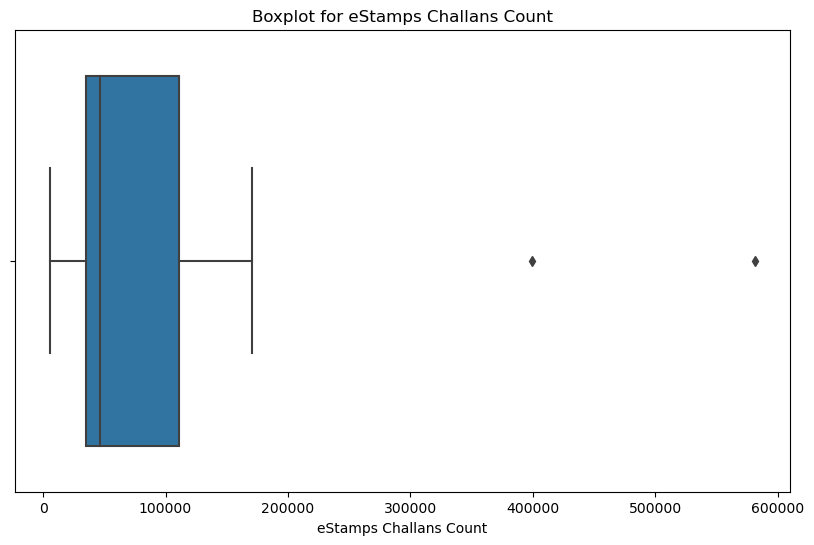

In [66]:
# Create a figure with a specified size
plt.figure(figsize=(10, 6))

# Generate a boxplot for the 'estamps_challans_cnt' column in the 'stamps' DataFrame
sns.boxplot(x='estamps_challans_cnt', data=challans_documents_totals)

# Set labels for the x-axis and the plot title
plt.xlabel('eStamps Challans Count')
plt.title('Boxplot for eStamps Challans Count')

# Display the plot
plt.show()

In [67]:
# Calculate the 25th percentile of annual 'estamps_challans_cnt'
percentile_25_challans = challans_documents_totals['estamps_challans_cnt'].quantile(0.25)

# Calculate the 75th percentile of annual 'estamps_challans_cnt'
percentile_75_challans = challans_documents_totals['estamps_challans_cnt'].quantile(0.75)

# Calculate the interquartile range (IQR) for challans
iqr_challans = percentile_75_challans - percentile_25_challans

# Calculate the upper threshold for outliers using 1.5 times the IQR
upper_outlier_limit_challans = percentile_75_challans + 1.5 * iqr_challans

# Display the calculated upper limit for challans outliers
print('Upper limit for eStamps Challans Count outliers is:', upper_outlier_limit_challans)

Upper limit for eStamps Challans Count outliers is: 223763.875


In [68]:
# Filter and merge districts where 'estamps_challans_cnt' exceeds the upper outlier limit
merged_outlier_districts_challans = pd.merge(
    challans_documents_totals[challans_documents_totals['estamps_challans_cnt'] > upper_outlier_limit_challans],
    districts,
    on='dist_code'
)

# Display the merged DataFrame for challans
print(merged_outlier_districts_challans)

  dist_code  estamps_challans_cnt            district
0      15_1                581231          Rangareddy
1      15_2                399643  Medchal_Malkajgiri


Examining for anomalies within the `estamps_challans_rev` category. 

In [69]:
# Calculate the total revenue from eStamps challans for each 'dist_code' in the stamps DataFrame
challans_rev_totals = stamps.groupby('dist_code').agg({
    'estamps_challans_rev': 'sum'
})

# Display the resulting DataFrame with the aggregated eStamps challans revenue information
print(challans_rev_totals.head())

           estamps_challans_rev
dist_code                      
14_1                 2236920432
14_2                  709344353
14_3                  980926364
14_4                  830193698
14_5                  517604092


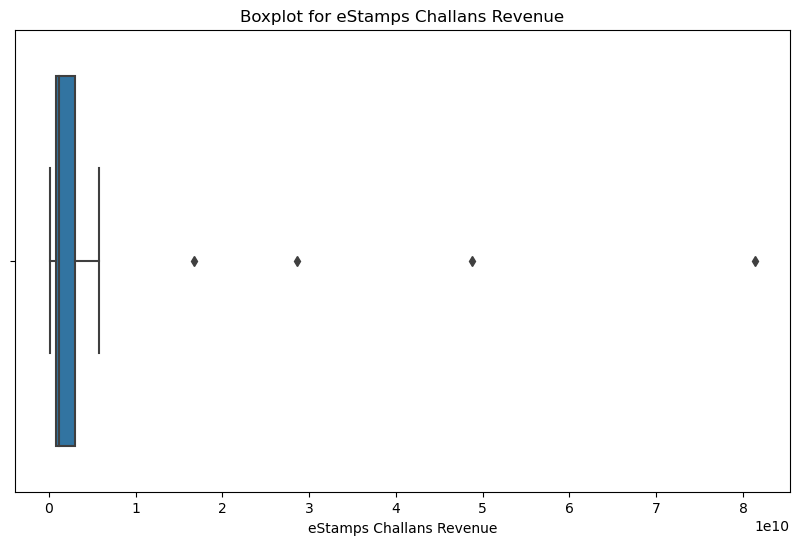

In [70]:
# Create a figure with a specified size
plt.figure(figsize=(10, 6))

# Generate a boxplot for the 'estamps_challans_rev' column in the 'stamps' DataFrame
sns.boxplot(x='estamps_challans_rev', data=challans_rev_totals)

# Set labels for the x-axis and the plot title
plt.xlabel('eStamps Challans Revenue')
plt.title('Boxplot for eStamps Challans Revenue')

# Display the plot
plt.show()

In [71]:
# Calculate the 25th percentile of annual 'estamps_challans_rev'
percentile_25_challans_rev = challans_rev_totals['estamps_challans_rev'].quantile(0.25)

# Calculate the 75th percentile of annual 'estamps_challans_rev'
percentile_75_challans_rev = challans_rev_totals['estamps_challans_rev'].quantile(0.75)

# Calculate the interquartile range (IQR) for eStamps challans revenue
iqr_challans_rev = percentile_75_challans_rev - percentile_25_challans_rev

# Calculate the upper threshold for outliers using 1.5 times the IQR
upper_outlier_limit_challans_rev = percentile_75_challans_rev + 1.5 * iqr_challans_rev

# Display the calculated upper limit for eStamps challans revenue outliers
print('Upper limit for eStamps Challans Revenue outliers is:', upper_outlier_limit_challans_rev)

Upper limit for eStamps Challans Revenue outliers is: 6325826523.875


In [72]:
# Filter and merge districts where 'estamps_challans_rev' exceeds the upper outlier limit
merged_outlier_districts_challans_rev = pd.merge(
    challans_rev_totals[challans_rev_totals['estamps_challans_rev'] > upper_outlier_limit_challans_rev],
    districts,
    on='dist_code'
)

# Display the merged DataFrame for eStamps challans revenue
print(merged_outlier_districts_challans_rev)

  dist_code  estamps_challans_rev            district
0      15_1           81336993463          Rangareddy
1      15_2           48819368222  Medchal_Malkajgiri
2      16_1           28652397786           Hyderabad
3      17_2           16708219605          Sangareddy


Examining for anomalies within the `fuel_type_petrol` category.

In [73]:
# Calculate the total count of petrol-fueled vehicles for each 'dist_code' in the transport DataFrame
petrol_type_totals = transport.groupby('dist_code').agg({'fuel_type_petrol': 'sum'})

# Display the resulting DataFrame with the aggregated petrol vehicle count information
print(petrol_type_totals.head())

           fuel_type_petrol
dist_code                  
14_1                 138492
14_2                  67136
14_3                  81040
14_4                  59250
15_1                 786086


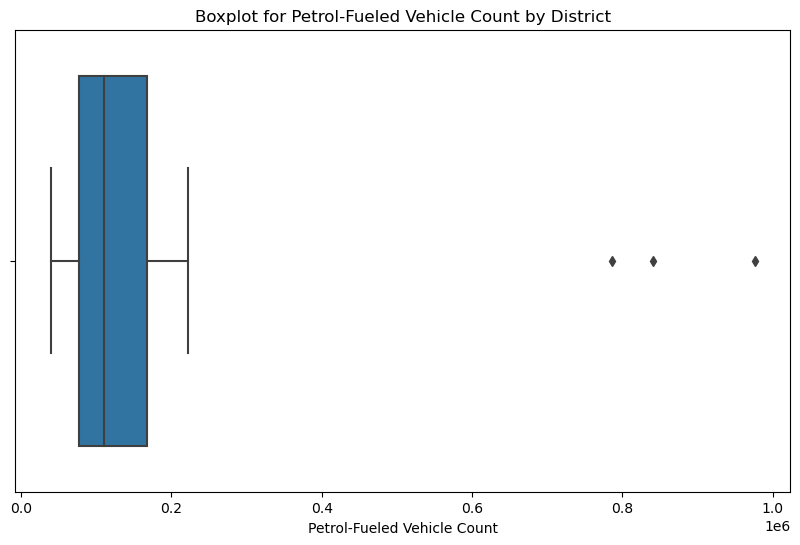

In [74]:
# Create a figure with a specified size
plt.figure(figsize=(10, 6))

# Generate a boxplot for the 'fuel_type_petrol' column in the 'transport' DataFrame
sns.boxplot(x='fuel_type_petrol', data=petrol_type_totals)

# Set labels for the x-axis and the plot title
plt.xlabel('Petrol-Fueled Vehicle Count')
plt.title('Boxplot for Petrol-Fueled Vehicle Count by District')

# Display the plot
plt.show()

In [75]:
# Calculate the 25th percentile of 'fuel_type_petrol' counts
percentile_25_petrol = petrol_type_totals['fuel_type_petrol'].quantile(0.25)

# Calculate the 75th percentile of 'fuel_type_petrol' counts
percentile_75_petrol = petrol_type_totals['fuel_type_petrol'].quantile(0.75)

# Calculate the interquartile range (IQR) for 'fuel_type_petrol' counts
iqr_petrol = percentile_75_petrol - percentile_25_petrol

# Calculate the upper threshold for outliers using 1.5 times the IQR
upper_outlier_limit_petrol = percentile_75_petrol + 1.5 * iqr_petrol

# Display the calculated upper limit for 'fuel_type_petrol' count outliers
print('Upper limit for Petrol-Fueled Vehicle Count outliers is:', upper_outlier_limit_petrol)

Upper limit for Petrol-Fueled Vehicle Count outliers is: 305056.0


In [76]:
# Filter and merge districts where 'fuel_type_petrol' count exceeds the upper outlier limit
merged_outlier_districts_petrol = pd.merge(
    petrol_type_totals[petrol_type_totals['fuel_type_petrol'] > upper_outlier_limit_petrol],
    districts,
    on='dist_code'
)

# Display the merged DataFrame for districts with 'fuel_type_petrol' counts above the upper limit
print(merged_outlier_districts_petrol)

  dist_code  fuel_type_petrol            district
0      15_1            786086          Rangareddy
1      15_2            840822  Medchal_Malkajgiri
2      16_1            976654           Hyderabad


Examining for anomalies within the `fuel_type_diesel` category.

In [77]:
# Calculate the total count of diesel-fueled vehicles for each 'dist_code' in the transport DataFrame
diesel_type_totals = transport.groupby('dist_code').agg({'fuel_type_diesel': 'sum'})

# Display the resulting DataFrame with the aggregated diesel vehicle count information
print(diesel_type_totals.head())

           fuel_type_diesel
dist_code                  
14_1                  29752
14_2                  10480
14_3                  24542
14_4                  13121
15_1                 111061


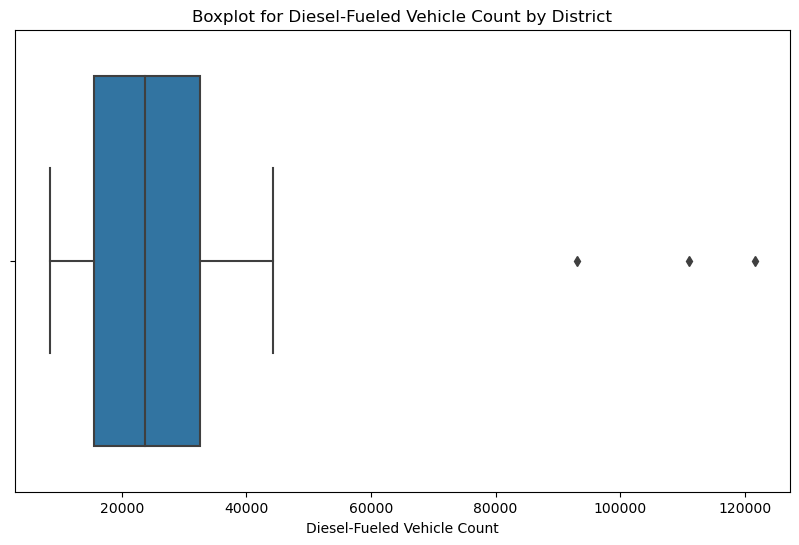

In [78]:
# Create a figure with a specified size
plt.figure(figsize=(10, 6))

# Generate a boxplot for the 'fuel_type_diesel' column in the 'transport' DataFrame
sns.boxplot(x='fuel_type_diesel', data=diesel_type_totals)

# Set labels for the x-axis and the plot title
plt.xlabel('Diesel-Fueled Vehicle Count')
plt.title('Boxplot for Diesel-Fueled Vehicle Count by District')

# Display the plot
plt.show()

In [79]:
# Calculate the 25th percentile of 'fuel_type_diesel' counts
percentile_25_diesel = diesel_type_totals['fuel_type_diesel'].quantile(0.25)

# Calculate the 75th percentile of 'fuel_type_diesel' counts
percentile_75_diesel = diesel_type_totals['fuel_type_diesel'].quantile(0.75)

# Calculate the interquartile range (IQR) for 'fuel_type_diesel' counts
iqr_diesel = percentile_75_diesel - percentile_25_diesel

# Calculate the upper threshold for outliers using 1.5 times the IQR
upper_outlier_limit_diesel = percentile_75_diesel + 1.5 * iqr_diesel

# Display the calculated upper limit for 'fuel_type_diesel' count outliers
print('Upper limit for Diesel-Fueled Vehicle Count outliers is:', upper_outlier_limit_diesel)

Upper limit for Diesel-Fueled Vehicle Count outliers is: 58327.75


In [80]:
# Filter and merge districts where 'fuel_type_diesel' count exceeds the upper outlier limit
merged_outlier_districts_diesel = pd.merge(
    diesel_type_totals[diesel_type_totals['fuel_type_diesel'] > upper_outlier_limit_diesel],
    districts,
    on='dist_code'
)

# Display the merged DataFrame for districts with 'fuel_type_diesel' counts above the upper limit
print(merged_outlier_districts_diesel)

  dist_code  fuel_type_diesel            district
0      15_1            111061          Rangareddy
1      15_2            121602  Medchal_Malkajgiri
2      16_1             93133           Hyderabad


Examining for anomalies within the `fuel_type_electric` category.

In [81]:
# Calculate the total count of electric-fueled vehicles for each 'dist_code' in the transport DataFrame
electric_type_totals = transport.groupby('dist_code').agg({'fuel_type_electric': 'sum'})

# Display the resulting DataFrame with the aggregated electric vehicle count information
print(electric_type_totals.head())

           fuel_type_electric
dist_code                    
14_1                      963
14_2                      165
14_3                      311
14_4                      340
15_1                    21755


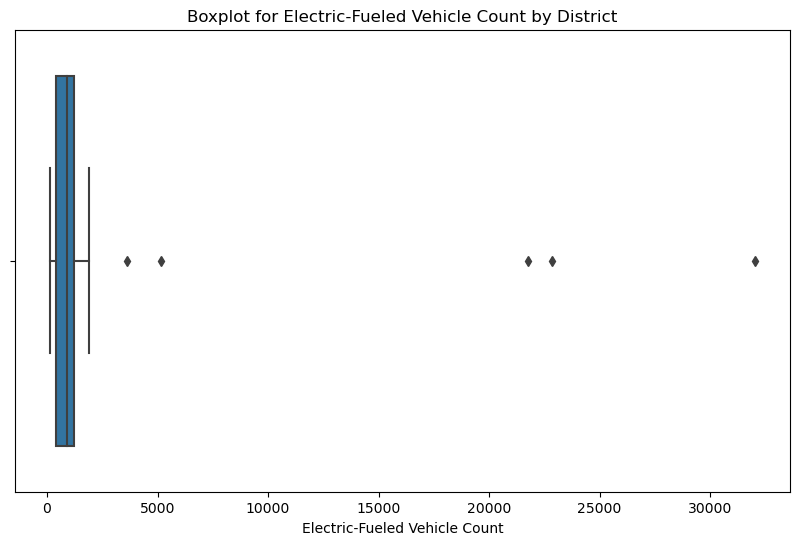

In [82]:
# Create a figure with a specified size
plt.figure(figsize=(10, 6))

# Generate a boxplot for the 'fuel_type_electric' column in the 'transport' DataFrame
sns.boxplot(x='fuel_type_electric', data=electric_type_totals)

# Set labels for the x-axis and the plot title
plt.xlabel('Electric-Fueled Vehicle Count')
plt.title('Boxplot for Electric-Fueled Vehicle Count by District')

# Display the plot
plt.show()

In [83]:
# Calculate the 25th percentile of 'fuel_type_electric' counts
percentile_25_electric = electric_type_totals['fuel_type_electric'].quantile(0.25)

# Calculate the 75th percentile of 'fuel_type_electric' counts
percentile_75_electric = electric_type_totals['fuel_type_electric'].quantile(0.75)

# Calculate the interquartile range (IQR) for 'fuel_type_electric' counts
iqr_electric = percentile_75_electric - percentile_25_electric

# Calculate the upper threshold for outliers using 1.5 times the IQR
upper_outlier_limit_electric = percentile_75_electric + 1.5 * iqr_electric

# Display the calculated upper limit for 'fuel_type_electric' count outliers
print('Upper limit for Electric-Fueled Vehicle Count outliers is:', upper_outlier_limit_electric)

Upper limit for Electric-Fueled Vehicle Count outliers is: 2430.25


In [84]:
# Filter and merge districts where 'fuel_type_electric' count exceeds the upper outlier limit
merged_outlier_districts_electric = pd.merge(
    electric_type_totals[electric_type_totals['fuel_type_electric'] > upper_outlier_limit_electric],
    districts,
    on='dist_code'
)

# Display the merged DataFrame for districts with 'fuel_type_electric' counts above the upper limit
print(merged_outlier_districts_electric)

  dist_code  fuel_type_electric            district
0      15_1               21755          Rangareddy
1      15_2               22846  Medchal_Malkajgiri
2      16_1               32012           Hyderabad
3      17_2                5170          Sangareddy
4      18_1                3609           Nizamabad


Examining for anomalies within the `fuel_type_others` category.

In [85]:
# Calculate the total count of vehicles with other fuel types for each 'dist_code' in the transport DataFrame
others_type_totals = transport.groupby('dist_code').agg({'fuel_type_others': 'sum'})

# Display the resulting DataFrame with the aggregated count of vehicles with other fuel types
print(others_type_totals.head())

           fuel_type_others
dist_code                  
14_1                    745
14_2                     59
14_3                    250
14_4                    232
15_1                   7731


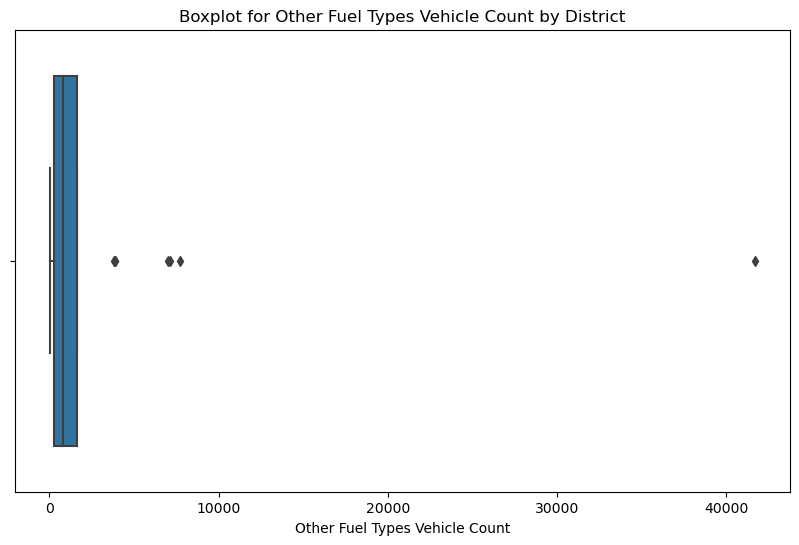

In [86]:
# Create a figure with a specified size
plt.figure(figsize=(10, 6))

# Generate a boxplot for the 'fuel_type_others' column in the 'transport' DataFrame
sns.boxplot(x='fuel_type_others', data=others_type_totals)

# Set labels for the x-axis and the plot title
plt.xlabel('Other Fuel Types Vehicle Count')
plt.title('Boxplot for Other Fuel Types Vehicle Count by District')

# Display the plot
plt.show()

In [87]:
# Calculate the 25th percentile of 'fuel_type_others' counts
percentile_25_others = others_type_totals['fuel_type_others'].quantile(0.25)

# Calculate the 75th percentile of 'fuel_type_others' counts
percentile_75_others = others_type_totals['fuel_type_others'].quantile(0.75)

# Calculate the interquartile range (IQR) for 'fuel_type_others' counts
iqr_others = percentile_75_others - percentile_25_others

# Calculate the upper threshold for outliers using 1.5 times the IQR
upper_outlier_limit_others = percentile_75_others + 1.5 * iqr_others

# Display the calculated upper limit for 'fuel_type_others' count outliers
print('Upper limit for Other Fuel Types Vehicle Count outliers is:', upper_outlier_limit_others)

Upper limit for Other Fuel Types Vehicle Count outliers is: 3719.875


In [88]:
# Filter and merge districts where 'fuel_type_others' count exceeds the upper outlier limit
merged_outlier_districts_others = pd.merge(
    others_type_totals[others_type_totals['fuel_type_others'] > upper_outlier_limit_others],
    districts,
    on='dist_code'
)

# Display the merged DataFrame for districts with 'fuel_type_others' counts above the upper limit
print(merged_outlier_districts_others)

  dist_code  fuel_type_others             district
0      15_1              7731           Rangareddy
1      15_2              7107   Medchal_Malkajgiri
2      16_1             41680            Hyderabad
3      17_2              7031           Sangareddy
4      22_1              3804              Khammam
5      23_1              3881             Nalgonda
6      23_3              3857  Yadadri Bhuvanagiri


Examining for anomalies within the `vehicleClass_MotorCycle` category.

In [89]:
# Calculate the total count of motorcycles for each 'dist_code' in the transport DataFrame
motorcycle_totals = transport.groupby('dist_code').agg({'vehicleClass_MotorCycle': 'sum'})

# Display the resulting DataFrame with the aggregated motorcycle count information
print(motorcycle_totals.head())

           vehicleClass_MotorCycle
dist_code                         
14_1                        128386
14_2                         64610
14_3                         75197
14_4                         55837
15_1                        598298


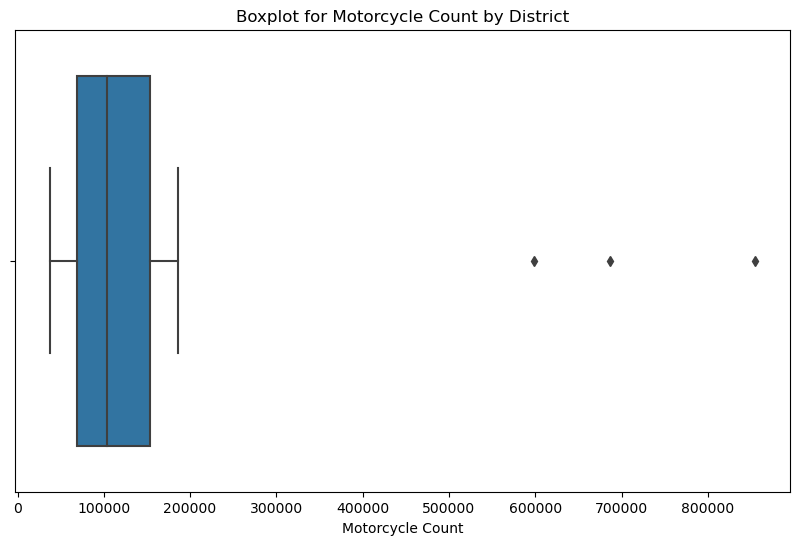

In [90]:
# Create a figure with a specified size
plt.figure(figsize=(10, 6))

# Generate a boxplot for the 'vehicleClass_MotorCycle' column in the 'transport' DataFrame
sns.boxplot(x='vehicleClass_MotorCycle', data=motorcycle_totals)

# Set labels for the x-axis and the plot title
plt.xlabel('Motorcycle Count')
plt.title('Boxplot for Motorcycle Count by District')

# Display the plot
plt.show()

In [91]:
# Calculate the 25th percentile of 'vehicleClass_MotorCycle' counts
percentile_25_motorcycle = motorcycle_totals['vehicleClass_MotorCycle'].quantile(0.25)

# Calculate the 75th percentile of 'vehicleClass_MotorCycle' counts
percentile_75_motorcycle = motorcycle_totals['vehicleClass_MotorCycle'].quantile(0.75)

# Calculate the interquartile range (IQR) for 'vehicleClass_MotorCycle' counts
iqr_motorcycle = percentile_75_motorcycle - percentile_25_motorcycle

# Calculate the upper threshold for outliers using 1.5 times the IQR
upper_outlier_limit_motorcycle = percentile_75_motorcycle + 1.5 * iqr_motorcycle

# Display the calculated upper limit for 'vehicleClass_MotorCycle' count outliers
print('Upper limit for Motorcycle Count outliers is:', upper_outlier_limit_motorcycle)

Upper limit for Motorcycle Count outliers is: 278798.5


In [92]:
# Filter and merge districts where 'vehicleClass_MotorCycle' count exceeds the upper outlier limit
merged_outlier_districts_motorcycle = pd.merge(
    motorcycle_totals[motorcycle_totals['vehicleClass_MotorCycle'] > upper_outlier_limit_motorcycle],
    districts,
    on='dist_code'
)

# Display the merged DataFrame for districts with 'vehicleClass_MotorCycle' counts above the upper limit
print(merged_outlier_districts_motorcycle)

  dist_code  vehicleClass_MotorCycle            district
0      15_1                   598298          Rangareddy
1      15_2                   686735  Medchal_Malkajgiri
2      16_1                   854183           Hyderabad


Examining for anomalies within the `vehicleClass_MotorCar` category.

In [93]:
# Calculate the total count of motorcars for each 'dist_code' in the transport DataFrame
motorcar_totals = transport.groupby('dist_code').agg({'vehicleClass_MotorCar': 'sum'})

# Display the resulting DataFrame with the aggregated motorcar count information
print(motorcar_totals.head())

           vehicleClass_MotorCar
dist_code                       
14_1                       14873
14_2                        3707
14_3                        7488
14_4                        4839
15_1                      254022


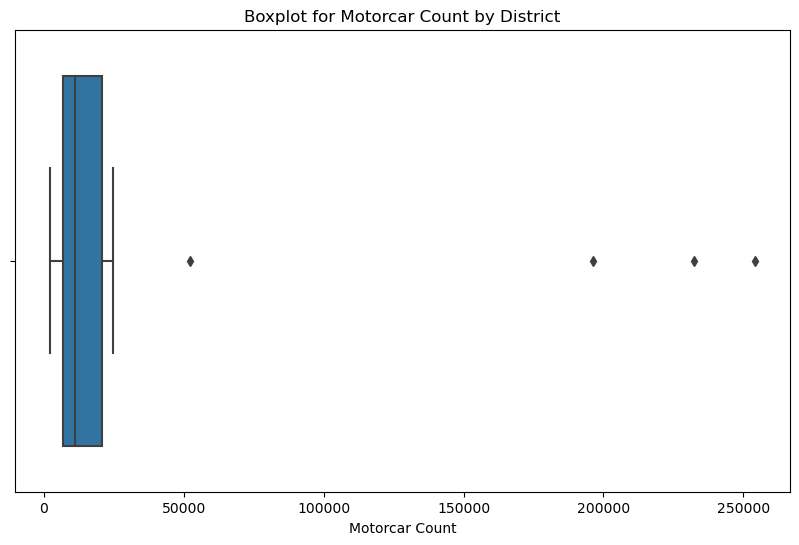

In [94]:
# Create a figure with a specified size
plt.figure(figsize=(10, 6))

# Generate a boxplot for the 'vehicleClass_MotorCar' column in the 'transport' DataFrame
sns.boxplot(x='vehicleClass_MotorCar', data=motorcar_totals)

# Set labels for the x-axis and the plot title
plt.xlabel('Motorcar Count')
plt.title('Boxplot for Motorcar Count by District')

# Display the plot
plt.show()

In [95]:
# Calculate the 25th percentile of 'vehicleClass_MotorCar' counts
percentile_25_motorcar = motorcar_totals['vehicleClass_MotorCar'].quantile(0.25)

# Calculate the 75th percentile of 'vehicleClass_MotorCar' counts
percentile_75_motorcar = motorcar_totals['vehicleClass_MotorCar'].quantile(0.75)

# Calculate the interquartile range (IQR) for 'vehicleClass_MotorCar' counts
iqr_motorcar = percentile_75_motorcar - percentile_25_motorcar

# Calculate the upper threshold for outliers using 1.5 times the IQR
upper_outlier_limit_motorcar = percentile_75_motorcar + 1.5 * iqr_motorcar

# Display the calculated upper limit for 'vehicleClass_MotorCar' count outliers
print('Upper limit for Motorcar Count outliers is:', upper_outlier_limit_motorcar)

Upper limit for Motorcar Count outliers is: 41671.625


In [96]:
# Filter and merge districts where 'vehicleClass_MotorCar' count exceeds the upper outlier limit
merged_outlier_districts_motorcar = pd.merge(
    motorcar_totals[motorcar_totals['vehicleClass_MotorCar'] > upper_outlier_limit_motorcar],
    districts,
    on='dist_code'
)

# Display the merged DataFrame for districts with 'vehicleClass_MotorCar' counts above the upper limit
print(merged_outlier_districts_motorcar)

  dist_code  vehicleClass_MotorCar            district
0      15_1                 254022          Rangareddy
1      15_2                 232514  Medchal_Malkajgiri
2      16_1                 196428           Hyderabad
3      17_2                  52080          Sangareddy


Examining for anomalies within the `vehicleClass_AutoRickshaw` category.

In [97]:
# Calculate the total count of auto-rickshaws for each 'dist_code' in the transport DataFrame
auto_rickshaw_totals = transport.groupby('dist_code').agg({'vehicleClass_AutoRickshaw': 'sum'})

# Display the resulting DataFrame with the aggregated auto-rickshaw count information
print(auto_rickshaw_totals.head())

           vehicleClass_AutoRickshaw
dist_code                           
14_1                            5072
14_2                             709
14_3                            1781
14_4                            1656
15_1                             104


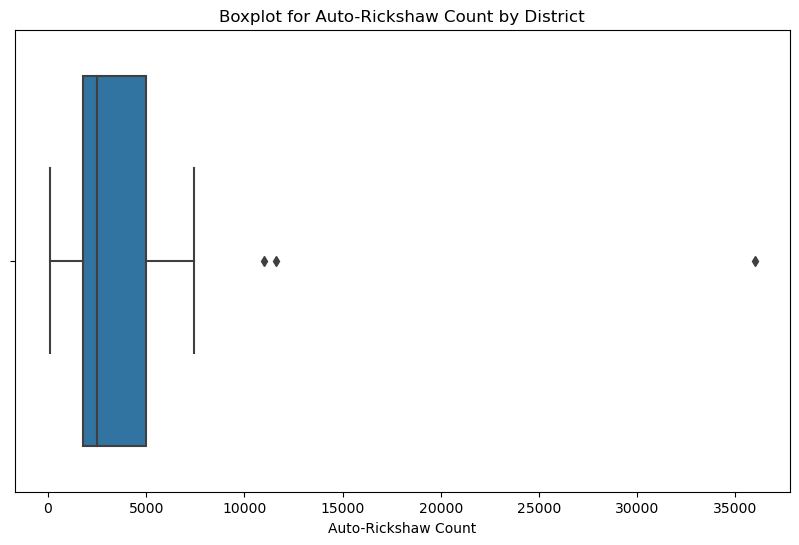

In [98]:
# Create a figure with a specified size
plt.figure(figsize=(10, 6))

# Generate a boxplot for the 'vehicleClass_AutoRickshaw' column in the 'transport' DataFrame
sns.boxplot(x='vehicleClass_AutoRickshaw', data=auto_rickshaw_totals)

# Set labels for the x-axis and the plot title
plt.xlabel('Auto-Rickshaw Count')
plt.title('Boxplot for Auto-Rickshaw Count by District')

# Display the plot
plt.show()

In [99]:
# Calculate the 25th percentile of 'vehicleClass_AutoRickshaw' counts
percentile_25_auto_rickshaw = auto_rickshaw_totals['vehicleClass_AutoRickshaw'].quantile(0.25)

# Calculate the 75th percentile of 'vehicleClass_AutoRickshaw' counts
percentile_75_auto_rickshaw = auto_rickshaw_totals['vehicleClass_AutoRickshaw'].quantile(0.75)

# Calculate the interquartile range (IQR) for 'vehicleClass_AutoRickshaw' counts
iqr_auto_rickshaw = percentile_75_auto_rickshaw - percentile_25_auto_rickshaw

# Calculate the upper threshold for outliers using 1.5 times the IQR
upper_outlier_limit_auto_rickshaw = percentile_75_auto_rickshaw + 1.5 * iqr_auto_rickshaw

# Display the calculated upper limit for 'vehicleClass_AutoRickshaw' count outliers
print('Upper limit for Auto-Rickshaw Count outliers is:', upper_outlier_limit_auto_rickshaw)

Upper limit for Auto-Rickshaw Count outliers is: 9855.125


In [100]:
# Filter and merge districts where 'vehicleClass_AutoRickshaw' count exceeds the upper outlier limit
merged_outlier_districts_auto_rickshaw = pd.merge(
    auto_rickshaw_totals[auto_rickshaw_totals['vehicleClass_AutoRickshaw'] > upper_outlier_limit_auto_rickshaw],
    districts,
    on='dist_code'
)

# Display the merged DataFrame for districts with 'vehicleClass_AutoRickshaw' counts above the upper limit
print(merged_outlier_districts_auto_rickshaw)

  dist_code  vehicleClass_AutoRickshaw    district
0      15_3                      11615   Vikarabad
1      16_1                      35990   Hyderabad
2      17_2                      11024  Sangareddy


Examining for anomalies within the `vehicleClass_Agriculture` category.

In [101]:
# Calculate the total count of agriculture vehicles for each 'dist_code' in the transport DataFrame
agriculture_vehicle_totals = transport.groupby('dist_code').agg({'vehicleClass_Agriculture': 'sum'})

# Display the resulting DataFrame with the aggregated agriculture vehicle count information
print(agriculture_vehicle_totals.head())

           vehicleClass_Agriculture
dist_code                          
14_1                           7517
14_2                           4365
14_3                           9208
14_4                           5190
15_1                           1699


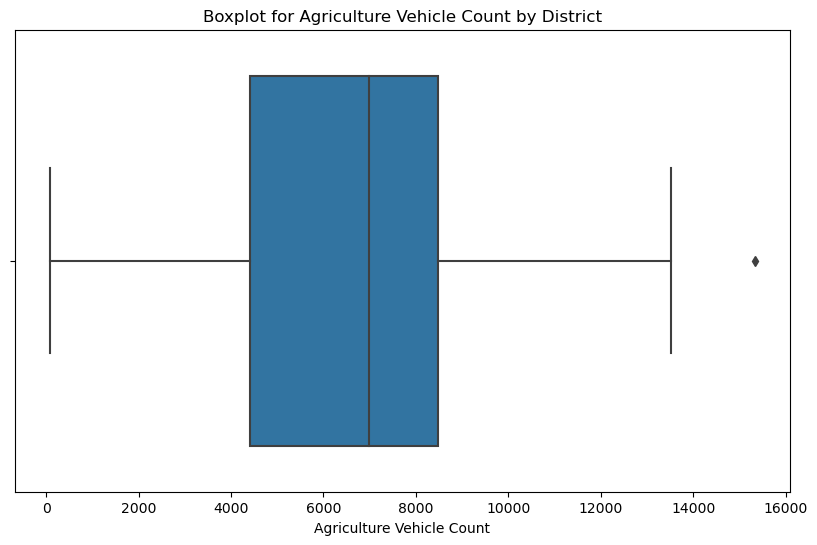

In [102]:
# Create a figure with a specified size
plt.figure(figsize=(10, 6))

# Generate a boxplot for the 'vehicleClass_Agriculture' column in the 'transport' DataFrame
sns.boxplot(x='vehicleClass_Agriculture', data=agriculture_vehicle_totals)

# Set labels for the x-axis and the plot title
plt.xlabel('Agriculture Vehicle Count')
plt.title('Boxplot for Agriculture Vehicle Count by District')

# Display the plot
plt.show()

In [103]:
# Calculate the 25th percentile of 'vehicleClass_Agriculture' counts
percentile_25_agriculture_vehicle = agriculture_vehicle_totals['vehicleClass_Agriculture'].quantile(0.25)

# Calculate the 75th percentile of 'vehicleClass_Agriculture' counts
percentile_75_agriculture_vehicle = agriculture_vehicle_totals['vehicleClass_Agriculture'].quantile(0.75)

# Calculate the interquartile range (IQR) for 'vehicleClass_Agriculture' counts
iqr_agriculture_vehicle = percentile_75_agriculture_vehicle - percentile_25_agriculture_vehicle

# Calculate the upper threshold for outliers using 1.5 times the IQR
upper_outlier_limit_agriculture_vehicle = percentile_75_agriculture_vehicle + 1.5 * iqr_agriculture_vehicle

# Display the calculated upper limit for 'vehicleClass_Agriculture' count outliers
print('Upper limit for Agriculture Vehicle Count outliers is:', upper_outlier_limit_agriculture_vehicle)

Upper limit for Agriculture Vehicle Count outliers is: 14581.5


In [104]:
# Filter and merge districts where 'vehicleClass_Agriculture' count exceeds the upper outlier limit
merged_outlier_districts_agriculture_vehicle = pd.merge(
    agriculture_vehicle_totals[agriculture_vehicle_totals['vehicleClass_Agriculture'] > upper_outlier_limit_agriculture_vehicle],
    districts,
    on='dist_code'
)

# Display the merged DataFrame for districts with 'vehicleClass_Agriculture' counts above the upper limit
print(merged_outlier_districts_agriculture_vehicle)

  dist_code  vehicleClass_Agriculture  district
0      23_1                     15330  Nalgonda


Examining for anomalies within the `vehicleClass_others` category.

In [105]:
# Calculate the total count of 'others' vehicles for each 'dist_code' in the transport DataFrame
others_vehicle_totals = transport.groupby('dist_code').agg({'vehicleClass_others': 'sum'})

# Display the resulting DataFrame with the aggregated 'others' vehicle count information
print(others_vehicle_totals.head())

           vehicleClass_others
dist_code                     
14_1                     14104
14_2                      4449
14_3                     12469
14_4                      5421
15_1                     72509


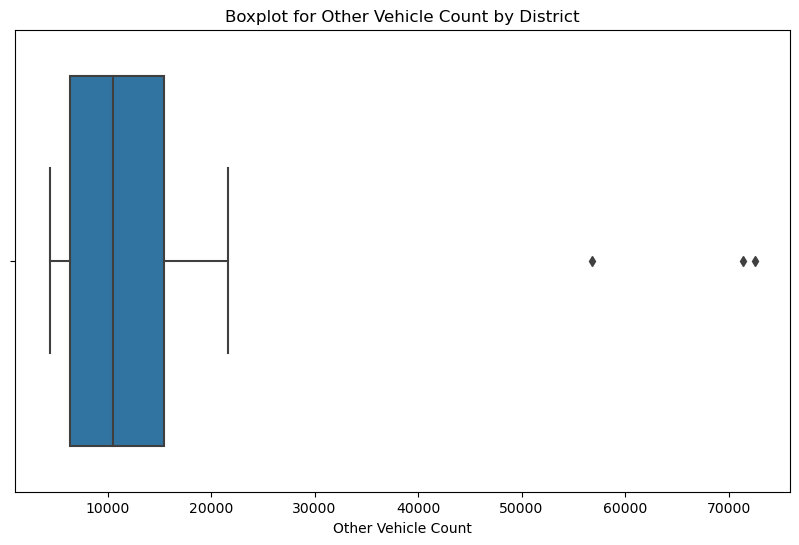

In [106]:
# Create a figure with a specified size
plt.figure(figsize=(10, 6))

# Generate a boxplot for the 'vehicleClass_others' column in the 'transport' DataFrame
sns.boxplot(x='vehicleClass_others', data=others_vehicle_totals)

# Set labels for the x-axis and the plot title
plt.xlabel('Other Vehicle Count')
plt.title('Boxplot for Other Vehicle Count by District')

# Display the plot
plt.show()

In [107]:
# Calculate the 25th percentile of 'vehicleClass_others' counts
percentile_25_others_vehicle = others_vehicle_totals['vehicleClass_others'].quantile(0.25)

# Calculate the 75th percentile of 'vehicleClass_others' counts
percentile_75_others_vehicle = others_vehicle_totals['vehicleClass_others'].quantile(0.75)

# Calculate the interquartile range (IQR) for 'vehicleClass_others' counts
iqr_others_vehicle = percentile_75_others_vehicle - percentile_25_others_vehicle

# Calculate the upper threshold for outliers using 1.5 times the IQR
upper_outlier_limit_others_vehicle = percentile_75_others_vehicle + 1.5 * iqr_others_vehicle

# Display the calculated upper limit for 'vehicleClass_others' count outliers
print('Upper limit for Other Vehicle Count outliers is:', upper_outlier_limit_others_vehicle)

Upper limit for Other Vehicle Count outliers is: 29112.0


In [108]:
# Filter and merge districts where 'vehicleClass_others' count exceeds the upper outlier limit
merged_outlier_districts_others_vehicle = pd.merge(
    others_vehicle_totals[others_vehicle_totals['vehicleClass_others'] > upper_outlier_limit_others_vehicle],
    districts,
    on='dist_code'
)

# Display the merged DataFrame for districts with 'vehicleClass_others' counts above the upper limit
print(merged_outlier_districts_others_vehicle)

  dist_code  vehicleClass_others            district
0      15_1                72509          Rangareddy
1      15_2                71388  Medchal_Malkajgiri
2      16_1                56812           Hyderabad


Examining for anomalies within the `seatCapacity_1_to_3` category.

In [109]:
# Calculate the total count of vehicles with seat capacity between 1 and 3 for each 'dist_code' in the transport DataFrame
seat_1_to_3_totals = transport.groupby('dist_code').agg({'seatCapacity_1_to_3': 'sum'})

# Display the resulting DataFrame with the aggregated seat capacity information
print(seat_1_to_3_totals.head())

           seatCapacity_1_to_3
dist_code                     
14_1                    148064
14_2                     73038
14_3                     95437
14_4                     65798
15_1                    653620


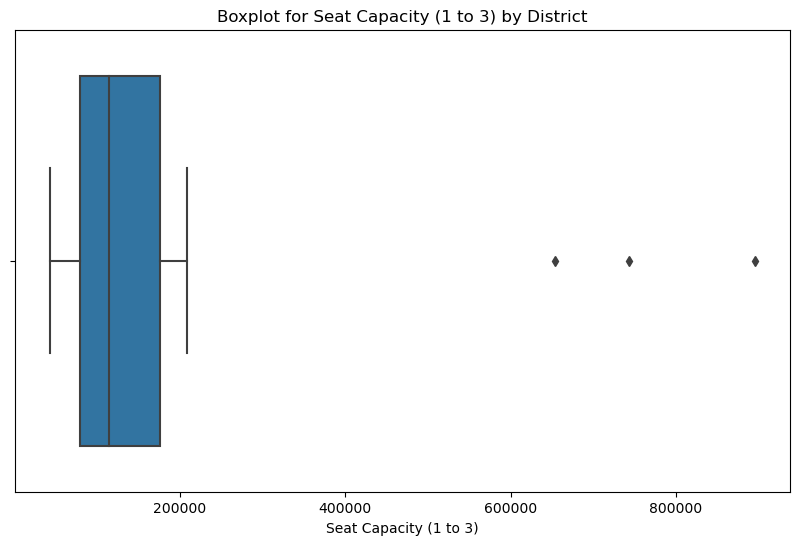

In [110]:
# Create a figure with a specified size
plt.figure(figsize=(10, 6))

# Generate a boxplot for the 'seatCapacity_1_to_3' column in the 'transport' DataFrame
sns.boxplot(x='seatCapacity_1_to_3', data=seat_1_to_3_totals)

# Set labels for the x-axis and the plot title
plt.xlabel('Seat Capacity (1 to 3)')
plt.title('Boxplot for Seat Capacity (1 to 3) by District')

# Display the plot
plt.show()

In [111]:
# Calculate the 25th percentile of 'seatCapacity_1_to_3' counts
percentile_25_seat_1_to_3 = seat_1_to_3_totals['seatCapacity_1_to_3'].quantile(0.25)

# Calculate the 75th percentile of 'seatCapacity_1_to_3' counts
percentile_75_seat_1_to_3 = seat_1_to_3_totals['seatCapacity_1_to_3'].quantile(0.75)

# Calculate the interquartile range (IQR) for 'seatCapacity_1_to_3' counts
iqr_seat_1_to_3 = percentile_75_seat_1_to_3 - percentile_25_seat_1_to_3

# Calculate the upper threshold for outliers using 1.5 times the IQR
upper_outlier_limit_seat_1_to_3 = percentile_75_seat_1_to_3 + 1.5 * iqr_seat_1_to_3

# Display the calculated upper limit for 'seatCapacity_1_to_3' count outliers
print('Upper limit for Seat Capacity (1 to 3) outliers is:', upper_outlier_limit_seat_1_to_3)

Upper limit for Seat Capacity (1 to 3) outliers is: 321447.875


In [112]:
# Filter and merge districts where 'seatCapacity_1_to_3' count exceeds the upper outlier limit
merged_outlier_districts_seat_1_to_3 = pd.merge(
    seat_1_to_3_totals[seat_1_to_3_totals['seatCapacity_1_to_3'] > upper_outlier_limit_seat_1_to_3],
    districts,
    on='dist_code'
)

# Display the merged DataFrame for districts with 'seatCapacity_1_to_3' counts above the upper limit
print(merged_outlier_districts_seat_1_to_3)

  dist_code  seatCapacity_1_to_3            district
0      15_1               653620          Rangareddy
1      15_2               743317  Medchal_Malkajgiri
2      16_1               894920           Hyderabad


Examining for anomalies within the `seatCapacity_4_to_6` category.

In [113]:
# Calculate the total count of vehicles with seat capacity between 4 and 6 for each 'dist_code' in the transport DataFrame
seat_4_to_6_totals = transport.groupby('dist_code').agg({'seatCapacity_4_to_6': 'sum'})

# Display the resulting DataFrame with the aggregated seat capacity information
print(seat_4_to_6_totals.head())

           seatCapacity_4_to_6
dist_code                     
14_1                     19378
14_2                      4118
14_3                      9565
14_4                      6378
15_1                    238375


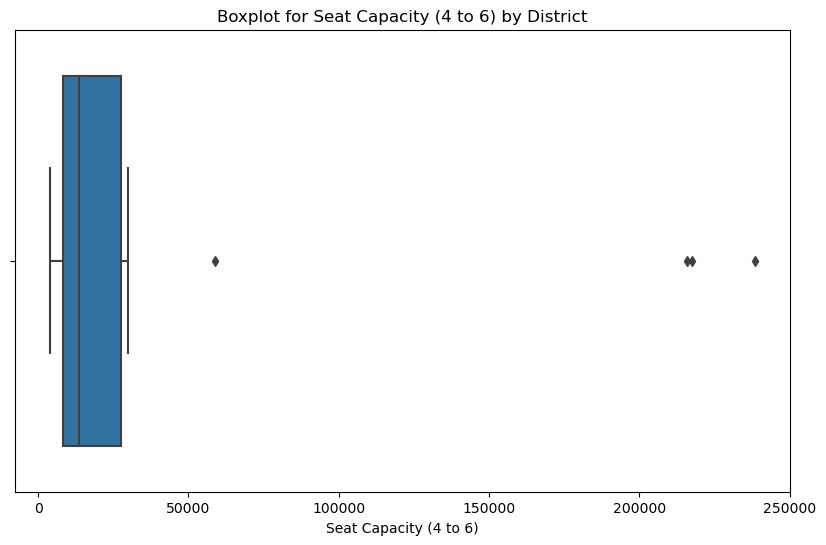

In [114]:
# Create a figure with a specified size
plt.figure(figsize=(10, 6))

# Generate a boxplot for the 'seatCapacity_4_to_6' column in the 'transport' DataFrame
sns.boxplot(x='seatCapacity_4_to_6', data=seat_4_to_6_totals)

# Set labels for the x-axis and the plot title
plt.xlabel('Seat Capacity (4 to 6)')
plt.title('Boxplot for Seat Capacity (4 to 6) by District')

# Display the plot
plt.show()

In [115]:
# Calculate the 25th percentile of 'seatCapacity_4_to_6' counts
percentile_25_seat_4_to_6 = seat_4_to_6_totals['seatCapacity_4_to_6'].quantile(0.25)

# Calculate the 75th percentile of 'seatCapacity_4_to_6' counts
percentile_75_seat_4_to_6 = seat_4_to_6_totals['seatCapacity_4_to_6'].quantile(0.75)

# Calculate the interquartile range (IQR) for 'seatCapacity_4_to_6' counts
iqr_seat_4_to_6 = percentile_75_seat_4_to_6 - percentile_25_seat_4_to_6

# Calculate the upper threshold for outliers using 1.5 times the IQR
upper_outlier_limit_seat_4_to_6 = percentile_75_seat_4_to_6 + 1.5 * iqr_seat_4_to_6

# Display the calculated upper limit for 'seatCapacity_4_to_6' count outliers
print('Upper limit for Seat Capacity (4 to 6) outliers is:', upper_outlier_limit_seat_4_to_6)

Upper limit for Seat Capacity (4 to 6) outliers is: 56684.625


In [116]:
# Filter and merge districts where 'seatCapacity_4_to_6' count exceeds the upper outlier limit
merged_outlier_districts_seat_4_to_6 = pd.merge(
    seat_4_to_6_totals[seat_4_to_6_totals['seatCapacity_4_to_6'] > upper_outlier_limit_seat_4_to_6],
    districts,
    on='dist_code'
)

# Display the merged DataFrame for districts with 'seatCapacity_4_to_6' counts above the upper limit
print(merged_outlier_districts_seat_4_to_6)

  dist_code  seatCapacity_4_to_6            district
0      15_1               238375          Rangareddy
1      15_2               215835  Medchal_Malkajgiri
2      16_1               217392           Hyderabad
3      17_2                58966          Sangareddy


Examining for anomalies within the `seatCapacity_above_6` category.

In [117]:
# Calculate the total count of vehicles with seat capacity above 6 for each 'dist_code' in the transport DataFrame
seat_above_6_totals = transport.groupby('dist_code').agg({'seatCapacity_above_6': 'sum'})

# Display the resulting DataFrame with the aggregated seat capacity information
print(seat_above_6_totals.head())

           seatCapacity_above_6
dist_code                      
14_1                       2455
14_2                        668
14_3                       1126
14_4                        747
15_1                      33877


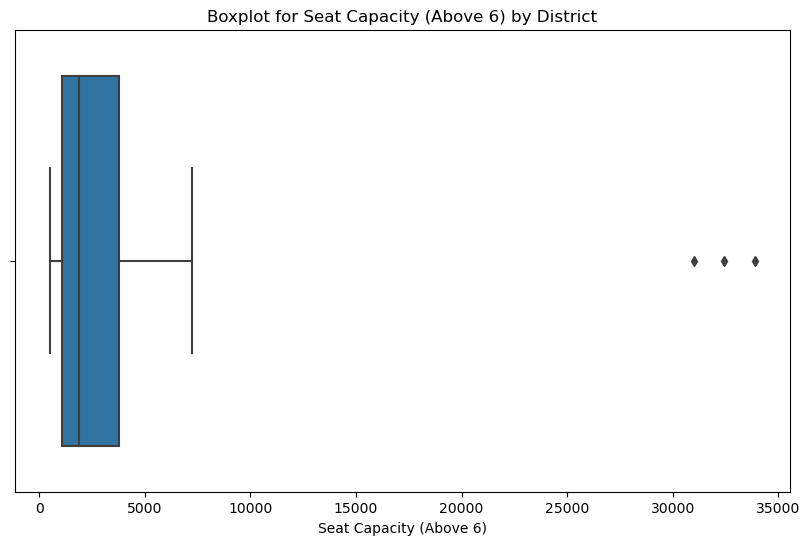

In [118]:
# Create a figure with a specified size
plt.figure(figsize=(10, 6))

# Generate a boxplot for the 'seatCapacity_above_6' column in the 'transport' DataFrame
sns.boxplot(x='seatCapacity_above_6', data=seat_above_6_totals)

# Set labels for the x-axis and the plot title
plt.xlabel('Seat Capacity (Above 6)')
plt.title('Boxplot for Seat Capacity (Above 6) by District')

# Display the plot
plt.show()

In [119]:
# Calculate the 25th percentile of 'seatCapacity_above_6' counts
percentile_25_seat_above_6 = seat_above_6_totals['seatCapacity_above_6'].quantile(0.25)

# Calculate the 75th percentile of 'seatCapacity_above_6' counts
percentile_75_seat_above_6 = seat_above_6_totals['seatCapacity_above_6'].quantile(0.75)

# Calculate the interquartile range (IQR) for 'seatCapacity_above_6' counts
iqr_seat_above_6 = percentile_75_seat_above_6 - percentile_25_seat_above_6

# Calculate the upper threshold for outliers using 1.5 times the IQR
upper_outlier_limit_seat_above_6 = percentile_75_seat_above_6 + 1.5 * iqr_seat_above_6

# Display the calculated upper limit for 'seatCapacity_above_6' count outliers
print('Upper limit for Seat Capacity (Above 6) outliers is:', upper_outlier_limit_seat_above_6)

Upper limit for Seat Capacity (Above 6) outliers is: 7879.125


In [120]:
# Filter and merge districts where 'seatCapacity_above_6' count exceeds the upper outlier limit
merged_outlier_districts_seat_above_6 = pd.merge(
    seat_above_6_totals[seat_above_6_totals['seatCapacity_above_6'] > upper_outlier_limit_seat_above_6],
    districts,
    on='dist_code'
)

# Display the merged DataFrame for districts with 'seatCapacity_above_6' counts above the upper limit
print(merged_outlier_districts_seat_above_6)

  dist_code  seatCapacity_above_6            district
0      15_1                 33877          Rangareddy
1      15_2                 32416  Medchal_Malkajgiri
2      16_1                 31009           Hyderabad


Examining for anomalies within the `Brand_new_vehicles` category.

In [121]:
# Calculate the total count of brand new vehicles for each 'dist_code' in the transport DataFrame
new_vehicles_totals = transport.groupby('dist_code').agg({'Brand_new_vehicles': 'sum'})

# Display the resulting DataFrame with the aggregated brand new vehicle count information
print(new_vehicles_totals.head())

           Brand_new_vehicles
dist_code                    
14_1                   163524
14_2                    75044
14_3                   102937
14_4                    70659
15_1                   831453


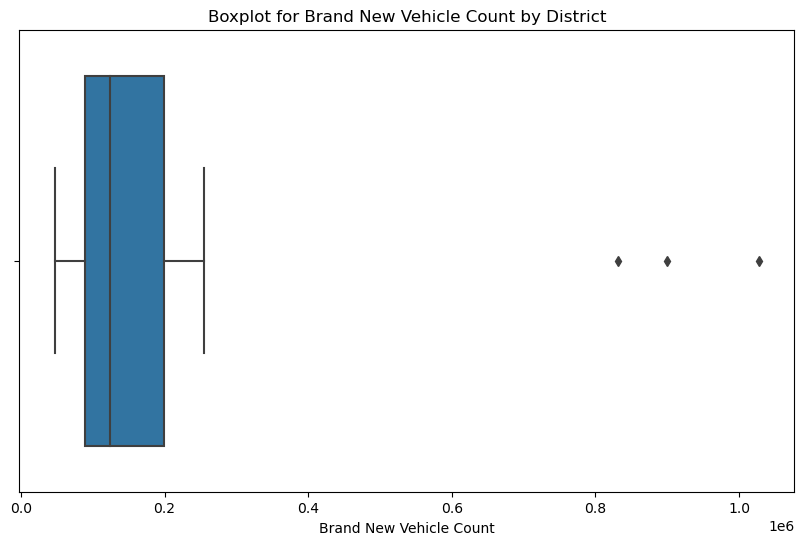

In [122]:
# Create a figure with a specified size
plt.figure(figsize=(10, 6))

# Generate a boxplot for the 'Brand_new_vehicles' column in the 'transport' DataFrame
sns.boxplot(x='Brand_new_vehicles', data=new_vehicles_totals)

# Set labels for the x-axis and the plot title
plt.xlabel('Brand New Vehicle Count')
plt.title('Boxplot for Brand New Vehicle Count by District')

# Display the plot
plt.show()

In [123]:
# Calculate the 25th percentile of 'Brand_new_vehicles' counts
percentile_25_new_vehicles = new_vehicles_totals['Brand_new_vehicles'].quantile(0.25)

# Calculate the 75th percentile of 'Brand_new_vehicles' counts
percentile_75_new_vehicles = new_vehicles_totals['Brand_new_vehicles'].quantile(0.75)

# Calculate the interquartile range (IQR) for 'Brand_new_vehicles' counts
iqr_new_vehicles = percentile_75_new_vehicles - percentile_25_new_vehicles

# Calculate the upper threshold for outliers using 1.5 times the IQR
upper_outlier_limit_new_vehicles = percentile_75_new_vehicles + 1.5 * iqr_new_vehicles

# Display the calculated upper limit for 'Brand_new_vehicles' count outliers
print('Upper limit for Brand New Vehicle Count outliers is:', upper_outlier_limit_new_vehicles)

Upper limit for Brand New Vehicle Count outliers is: 363870.875


In [124]:
# Filter and merge districts where 'Brand_new_vehicles' count exceeds the upper outlier limit
merged_outlier_districts_new_vehicles = pd.merge(
    new_vehicles_totals[new_vehicles_totals['Brand_new_vehicles'] > upper_outlier_limit_new_vehicles],
    districts,
    on='dist_code'
)

# Display the merged DataFrame for districts with 'Brand_new_vehicles' counts above the upper limit
print(merged_outlier_districts_new_vehicles)

  dist_code  Brand_new_vehicles            district
0      15_1              831453          Rangareddy
1      15_2              899852  Medchal_Malkajgiri
2      16_1             1027980           Hyderabad


Examining for anomalies within the `Pre-owned_vehicles` category.

In [125]:
# Calculate the total count of pre-owned vehicles for each 'dist_code' in the transport DataFrame
pre_owned_vehicles_totals = transport.groupby('dist_code').agg({'Pre-owned_vehicles': 'sum'})

# Display the resulting DataFrame with the aggregated pre-owned vehicle count information
print(pre_owned_vehicles_totals.head())

           Pre-owned_vehicles
dist_code                    
14_1                     6428
14_2                     2796
14_3                     3206
14_4                     2284
15_1                    95180


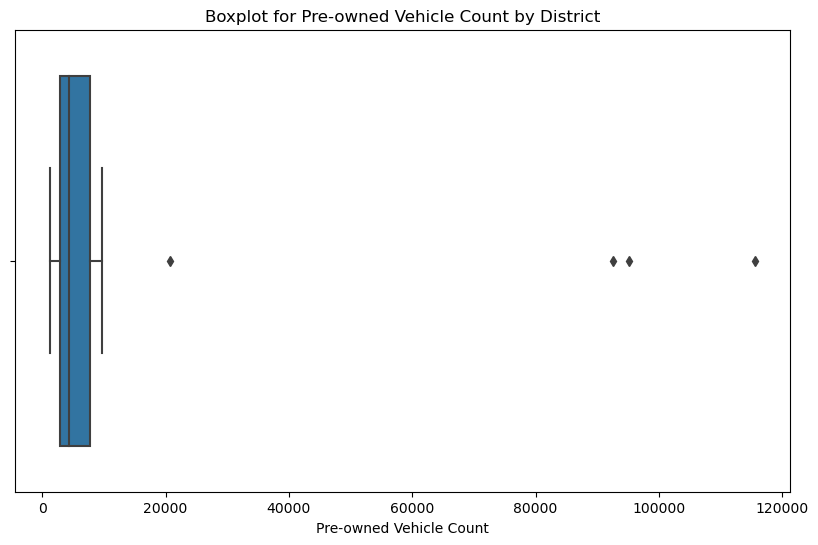

In [126]:
# Create a figure with a specified size
plt.figure(figsize=(10, 6))

# Generate a boxplot for the 'Pre-owned_vehicles' column in the 'transport' DataFrame
sns.boxplot(x='Pre-owned_vehicles', data=pre_owned_vehicles_totals)

# Set labels for the x-axis and the plot title
plt.xlabel('Pre-owned Vehicle Count')
plt.title('Boxplot for Pre-owned Vehicle Count by District')

# Display the plot
plt.show()

In [127]:
# Calculate the 25th percentile of 'Pre-owned_vehicles' counts
percentile_25_pre_owned_vehicles = pre_owned_vehicles_totals['Pre-owned_vehicles'].quantile(0.25)

# Calculate the 75th percentile of 'Pre-owned_vehicles' counts
percentile_75_pre_owned_vehicles = pre_owned_vehicles_totals['Pre-owned_vehicles'].quantile(0.75)

# Calculate the interquartile range (IQR) for 'Pre-owned_vehicles' counts
iqr_pre_owned_vehicles = percentile_75_pre_owned_vehicles - percentile_25_pre_owned_vehicles

# Calculate the upper threshold for outliers using 1.5 times the IQR
upper_outlier_limit_pre_owned_vehicles = percentile_75_pre_owned_vehicles + 1.5 * iqr_pre_owned_vehicles

# Display the calculated upper limit for 'Pre-owned_vehicles' count outliers
print('Upper limit for Pre-owned Vehicle Count outliers is:', upper_outlier_limit_pre_owned_vehicles)

Upper limit for Pre-owned Vehicle Count outliers is: 15000.625


In [128]:
# Filter and merge districts where 'Pre-owned_vehicles' count exceeds the upper outlier limit
merged_outlier_districts_pre_owned_vehicles = pd.merge(
    pre_owned_vehicles_totals[pre_owned_vehicles_totals['Pre-owned_vehicles'] > upper_outlier_limit_pre_owned_vehicles],
    districts,
    on='dist_code'
)

# Display the merged DataFrame for districts with 'Pre-owned_vehicles' counts above the upper limit
print(merged_outlier_districts_pre_owned_vehicles)

  dist_code  Pre-owned_vehicles            district
0      15_1               95180          Rangareddy
1      15_2               92525  Medchal_Malkajgiri
2      16_1              115521           Hyderabad
3      17_2               20658          Sangareddy


Examining for anomalies within the `category_Non-Transport` category.

In [129]:
# Calculate the total count of 'Non-Transport' category vehicles for each 'dist_code' in the transport DataFrame
non_transport_totals = transport.groupby('dist_code').agg({'category_Non-Transport': 'sum'})

# Display the resulting DataFrame with the aggregated 'Non-Transport' category vehicle count information
print(non_transport_totals.head())

           category_Non-Transport
dist_code                        
14_1                       151532
14_2                        72904
14_3                        92524
14_4                        66276
15_1                       857810


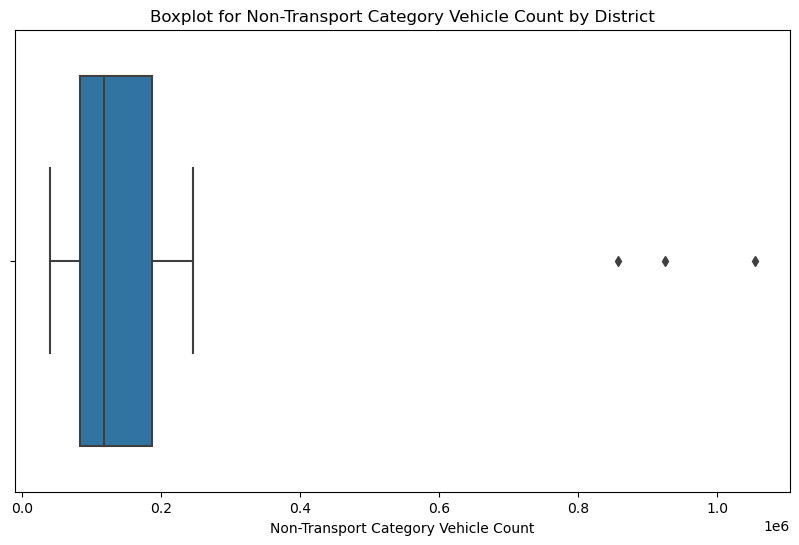

In [130]:
# Create a figure with a specified size
plt.figure(figsize=(10, 6))

# Generate a boxplot for the 'category_Non-Transport' column in the 'transport' DataFrame
sns.boxplot(x='category_Non-Transport', data=non_transport_totals)

# Set labels for the x-axis and the plot title
plt.xlabel('Non-Transport Category Vehicle Count')
plt.title('Boxplot for Non-Transport Category Vehicle Count by District')

# Display the plot
plt.show()

In [131]:
# Calculate the 25th percentile of 'category_Non-Transport' counts
percentile_25_non_transport = non_transport_totals['category_Non-Transport'].quantile(0.25)

# Calculate the 75th percentile of 'category_Non-Transport' counts
percentile_75_non_transport = non_transport_totals['category_Non-Transport'].quantile(0.75)

# Calculate the interquartile range (IQR) for 'category_Non-Transport' counts
iqr_non_transport = percentile_75_non_transport - percentile_25_non_transport

# Calculate the upper threshold for outliers using 1.5 times the IQR
upper_outlier_limit_non_transport = percentile_75_non_transport + 1.5 * iqr_non_transport

# Display the calculated upper limit for 'category_Non-Transport' count outliers
print('Upper limit for Non-Transport Category Vehicle Count outliers is:', upper_outlier_limit_non_transport)

Upper limit for Non-Transport Category Vehicle Count outliers is: 341423.375


In [132]:
# Filter and merge districts where 'category_Non-Transport' count exceeds the upper outlier limit
merged_outlier_districts_non_transport = pd.merge(
    non_transport_totals[non_transport_totals['category_Non-Transport'] > upper_outlier_limit_non_transport],
    districts,
    on='dist_code'
)

# Display the merged DataFrame for districts with 'category_Non-Transport' counts above the upper limit
print(merged_outlier_districts_non_transport)

  dist_code  category_Non-Transport            district
0      15_1                  857810          Rangareddy
1      15_2                  924389  Medchal_Malkajgiri
2      16_1                 1053616           Hyderabad


Examining for anomalies within the `category_Transport` category.

In [133]:
# Calculate the total count of 'Transport' category vehicles for each 'dist_code' in the transport DataFrame
transport_category_totals = transport.groupby('dist_code').agg({'category_Transport': 'sum'})

# Display the resulting DataFrame with the aggregated 'Transport' category vehicle count information
print(transport_category_totals.head())

           category_Transport
dist_code                    
14_1                    18420
14_2                     4936
14_3                    13619
14_4                     6667
15_1                    68823


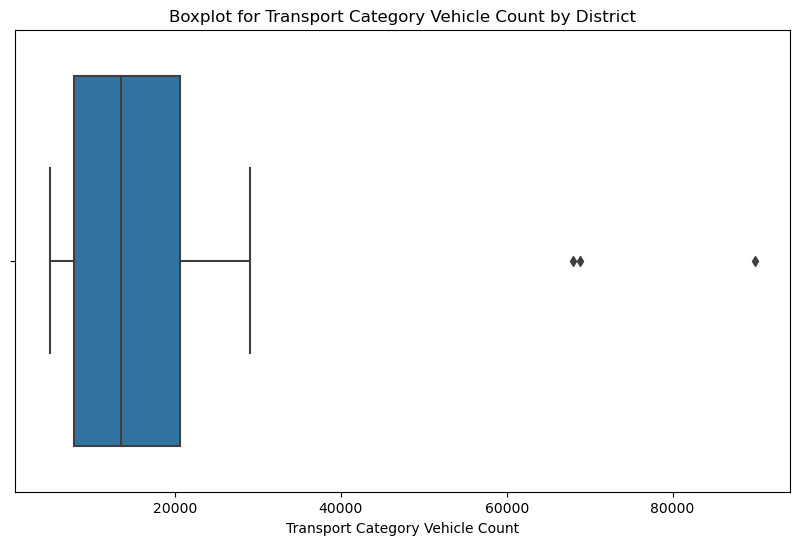

In [134]:
# Create a figure with a specified size
plt.figure(figsize=(10, 6))

# Generate a boxplot for the 'category_Transport' column in the 'transport' DataFrame
sns.boxplot(x='category_Transport', data=transport_category_totals)

# Set labels for the x-axis and the plot title
plt.xlabel('Transport Category Vehicle Count')
plt.title('Boxplot for Transport Category Vehicle Count by District')

# Display the plot
plt.show()

In [135]:
# Calculate the 25th percentile of 'category_Transport' counts
percentile_25_transport_category = transport_category_totals['category_Transport'].quantile(0.25)

# Calculate the 75th percentile of 'category_Transport' counts
percentile_75_transport_category = transport_category_totals['category_Transport'].quantile(0.75)

# Calculate the interquartile range (IQR) for 'category_Transport' counts
iqr_transport_category = percentile_75_transport_category - percentile_25_transport_category

# Calculate the upper threshold for outliers using 1.5 times the IQR
upper_outlier_limit_transport_category = percentile_75_transport_category + 1.5 * iqr_transport_category

# Display the calculated upper limit for 'category_Transport' count outliers
print('Upper limit for Transport Category Vehicle Count outliers is:', upper_outlier_limit_transport_category)

Upper limit for Transport Category Vehicle Count outliers is: 39686.125


In [136]:
# Filter and merge districts where 'category_Transport' count exceeds the upper outlier limit
merged_outlier_districts_transport_category = pd.merge(
    transport_category_totals[transport_category_totals['category_Transport'] > upper_outlier_limit_transport_category],
    districts,
    on='dist_code'
)

# Display the merged DataFrame for districts with 'category_Transport' counts above the upper limit
print(merged_outlier_districts_transport_category)

  dist_code  category_Transport            district
0      15_1               68823          Rangareddy
1      15_2               67988  Medchal_Malkajgiri
2      16_1               89885           Hyderabad


Examining for anomalies within the `investment in cr` category.

In [137]:
# Calculate the total investment in crore for each 'dist_code' in the ts_ipass DataFrame
investment_cr_totals = ts_ipass.groupby('dist_code').agg({'investment in cr': 'sum'})

# Display the resulting DataFrame with the aggregated investment information
print(investment_cr_totals.head())

           investment in cr
dist_code                  
14_1              4771.8909
14_2               138.0338
14_3               359.6021
14_4               559.8043
14_5              1615.6815


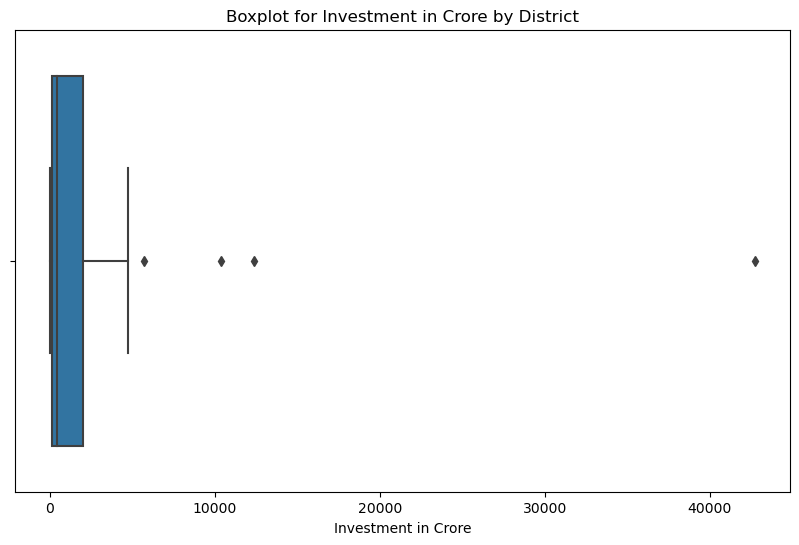

In [138]:
# Create a figure with a specified size
plt.figure(figsize=(10, 6))

# Generate a boxplot for the 'investment in cr' column in the 'ts_ipass' DataFrame
sns.boxplot(x='investment in cr', data=investment_cr_totals)

# Set labels for the x-axis and the plot title
plt.xlabel('Investment in Crore')
plt.title('Boxplot for Investment in Crore by District')

# Display the plot
plt.show()

In [139]:
# Calculate the 25th percentile of 'investment in cr'
percentile_25_investment_cr = investment_cr_totals['investment in cr'].quantile(0.25)

# Calculate the 75th percentile of 'investment in cr'
percentile_75_investment_cr = investment_cr_totals['investment in cr'].quantile(0.75)

# Calculate the interquartile range (IQR) for 'investment in cr'
iqr_investment_cr = percentile_75_investment_cr - percentile_25_investment_cr

# Calculate the upper threshold for outliers using 1.5 times the IQR
upper_outlier_limit_investment_cr = percentile_75_investment_cr + 1.5 * iqr_investment_cr

# Display the calculated upper limit for 'investment in cr' outliers
print('Upper limit for Investment in Crore outliers is:', upper_outlier_limit_investment_cr)

Upper limit for Investment in Crore outliers is: 4833.644


In [140]:
# Filter and merge districts where 'investment in cr' exceeds the upper outlier limit
merged_outlier_districts_investment_cr = pd.merge(
    investment_cr_totals[investment_cr_totals['investment in cr'] > upper_outlier_limit_investment_cr],
    districts,
    on='dist_code'
)

# Display the merged DataFrame for districts with 'investment in cr' above the upper limit
print(merged_outlier_districts_investment_cr)

  dist_code  investment in cr            district
0      15_1        42706.3320          Rangareddy
1      15_2        10394.5610  Medchal_Malkajgiri
2      17_2        12366.7556          Sangareddy
3      20_4         5715.3865          Peddapalli


In [141]:
# Calculate the total investment in crore for each 'sector' in the ts_ipass DataFrame
investment_cr_sector_totals = ts_ipass.groupby('sector').agg({'investment in cr': 'sum'})

# Display the resulting DataFrame with the aggregated investment information
print(investment_cr_sector_totals.head())

                                                    investment in cr
sector                                                              
Agro based incl Cold Storages                              2100.4685
Automobile                                                 1575.2121
Beverages                                                  2809.7994
Cement, Cement & Concrete Products, Fly Ash Bricks         2238.6345
Electrical and Electronic Products                          941.6272


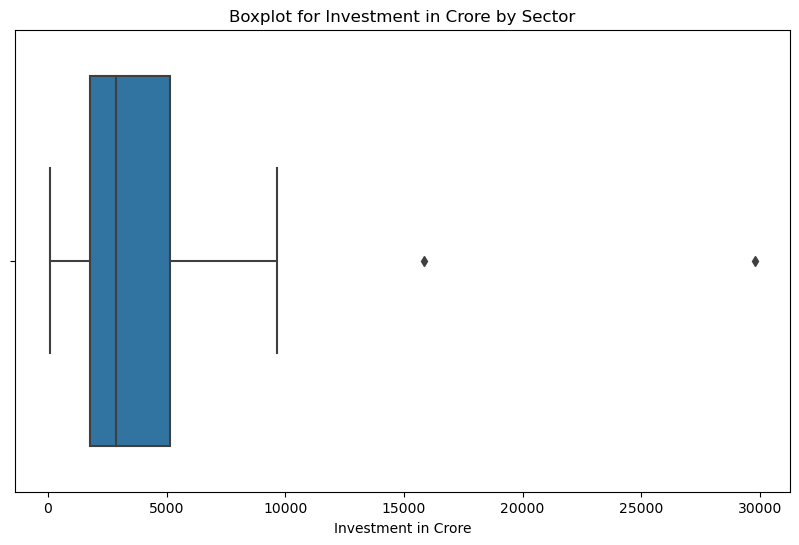

In [142]:
# Create a figure with a specified size
plt.figure(figsize=(10, 6))

# Generate a boxplot for the 'investment in cr' column in the 'ts_ipass' DataFrame
sns.boxplot(x='investment in cr', data=investment_cr_sector_totals)

# Set labels for the x-axis and the plot title
plt.xlabel('Investment in Crore')
plt.title('Boxplot for Investment in Crore by Sector')

# Display the plot
plt.show()

In [143]:
# Calculate the 25th percentile of 'investment in cr'
percentile_25_investment_cr_sector = investment_cr_sector_totals['investment in cr'].quantile(0.25)

# Calculate the 75th percentile of 'investment in cr'
percentile_75_investment_cr_sector = investment_cr_sector_totals['investment in cr'].quantile(0.75)

# Calculate the interquartile range (IQR) for 'investment in cr'
iqr_investment_cr_sector = percentile_75_investment_cr_sector - percentile_25_investment_cr_sector

# Calculate the upper threshold for outliers using 1.5 times the IQR
upper_outlier_limit_investment_cr_sector = percentile_75_investment_cr_sector + 1.5 * iqr_investment_cr_sector

# Display the calculated upper limit for 'investment in cr' outliers
print('Upper limit for Investment in Crore outliers is:', upper_outlier_limit_investment_cr_sector)

Upper limit for Investment in Crore outliers is: 10142.141412500001


In [144]:
# Filter sectors where 'investment in cr' exceeds the upper outlier limit
outlier_sectors_investment_cr = investment_cr_sector_totals[investment_cr_sector_totals['investment in cr'] > upper_outlier_limit_investment_cr_sector]

# Display the DataFrame for sectors with 'investment in cr' above the upper limit
print(outlier_sectors_investment_cr.head())

                                               investment in cr
sector                                                         
Pharmaceuticals and Chemicals                        15858.0561
Real Estate,Industrial Parks and IT Buildings        29778.1741


Examining for anomalies within the `number_of_employees` category.

In [145]:
# Group by 'dist_code' and sum 'number_of_employees'
employee_count_totals = ts_ipass.groupby('dist_code').agg({'number_of_employees': 'sum'}).reset_index()

# Display the resulting DataFrame with the aggregated employee count information
print(employee_count_totals.head())

  dist_code  number_of_employees
0      14_1                16094
1      14_2                 1123
2      14_3                 2246
3      14_4                 2398
4      14_5                 2068


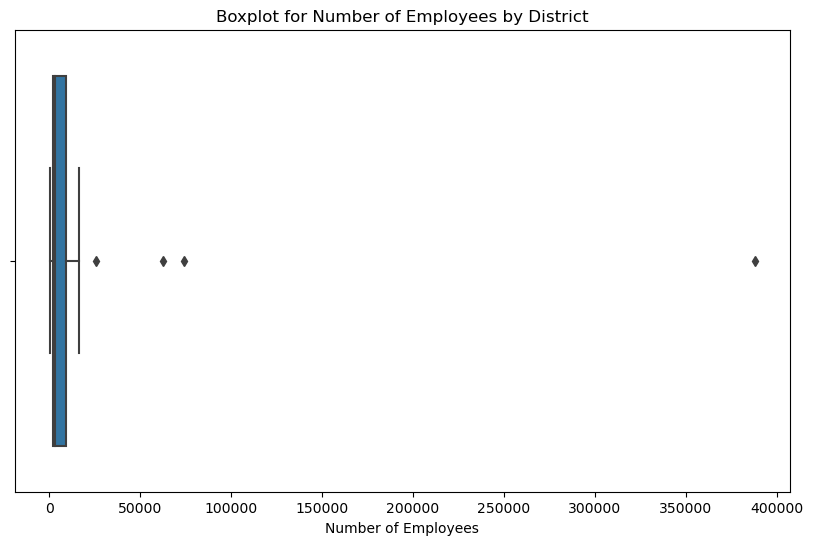

In [146]:
# Create a figure with a specified size
plt.figure(figsize=(10, 6))

# Generate a boxplot for the 'number_of_employees' column in the 'ts_ipass' DataFrame
sns.boxplot(x='number_of_employees', data=employee_count_totals)

# Set labels for the x-axis and the plot title
plt.xlabel('Number of Employees')
plt.title('Boxplot for Number of Employees by District')

# Display the plot
plt.show()

In [147]:
# Calculate the 25th percentile of 'number_of_employees'
percentile_25_employee_count = employee_count_totals['number_of_employees'].quantile(0.25)

# Calculate the 75th percentile of 'number_of_employees'
percentile_75_employee_count = employee_count_totals['number_of_employees'].quantile(0.75)

# Calculate the interquartile range (IQR) for 'number_of_employees'
iqr_employee_count = percentile_75_employee_count - percentile_25_employee_count

# Calculate the upper threshold for outliers using 1.5 times the IQR
upper_outlier_limit_employee_count = percentile_75_employee_count + 1.5 * iqr_employee_count

# Display the calculated upper limit for 'number_of_employees' outliers
print('Upper limit for Employee Count outliers is:', upper_outlier_limit_employee_count)

Upper limit for Employee Count outliers is: 19832.0


In [148]:
# Filter districts where 'number_of_employees' exceeds the upper outlier limit and merge with 'districts'
merged_outlier_employee_count = pd.merge(
    employee_count_totals[employee_count_totals['number_of_employees'] > upper_outlier_limit_employee_count],
    districts,
    on='dist_code'
)

# Display the merged DataFrame for districts with 'number_of_employees' above the upper limit
print(merged_outlier_employee_count.head())

  dist_code  number_of_employees             district
0      15_1               387758           Rangareddy
1      15_2                62662   Medchal_Malkajgiri
2      17_2                74292           Sangareddy
3      23_3                25829  Yadadri Bhuvanagiri


In [149]:
# Load Census data from (https://www.indiacensus.net/states/telangana/density)
population_density = pd.read_csv(r"D:\DataScience\Projects\Portfolio\CODEBASIC_Telangana Growth Analysis\dataset\third_party\Telangana_Population_Density.csv")
highest_sex_ratio = pd.read_csv(r"D:\DataScience\Projects\Portfolio\CODEBASIC_Telangana Growth Analysis\dataset\third_party\Highest_Sex_Ratio_Districts.csv")
highest_literate = pd.read_csv(r"D:\DataScience\Projects\Portfolio\CODEBASIC_Telangana Growth Analysis\dataset\third_party\Highest_Literate_Districts.csv")

In [150]:
population_density = population_density[['districts', 'population', 'area_km', 'density']]
population_density['population'] = population_density['population'].str.replace(',', '').astype('int64')

In [151]:
population_density.head()

,districts,population,area_km,density
0,Adilabad,708972,"4,153",171
1,Bhadradri Kothagudem,1069261,"7,483",143
2,Hyderabad,3943323,217,18172
3,Jagitial,985417,"2,419",407
4,Jangaon,566376,"2,188",259


In [152]:
highest_sex_ratio.head()

,districts,sex_ratio
0,Nirmal,1046
1,Nizamabad,1044
2,Jagitial,1036
3,Kamareddy,1033


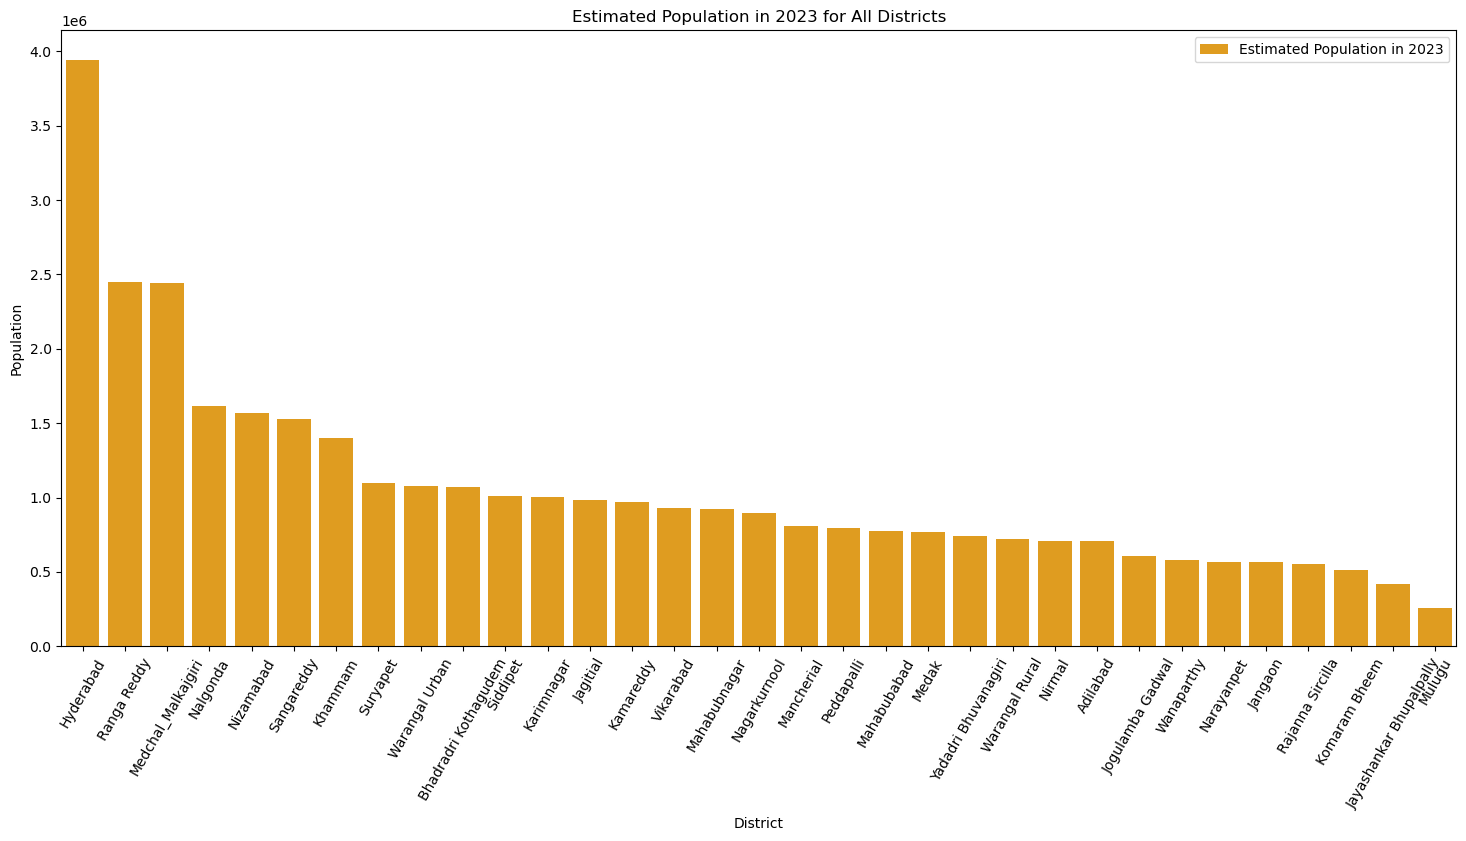

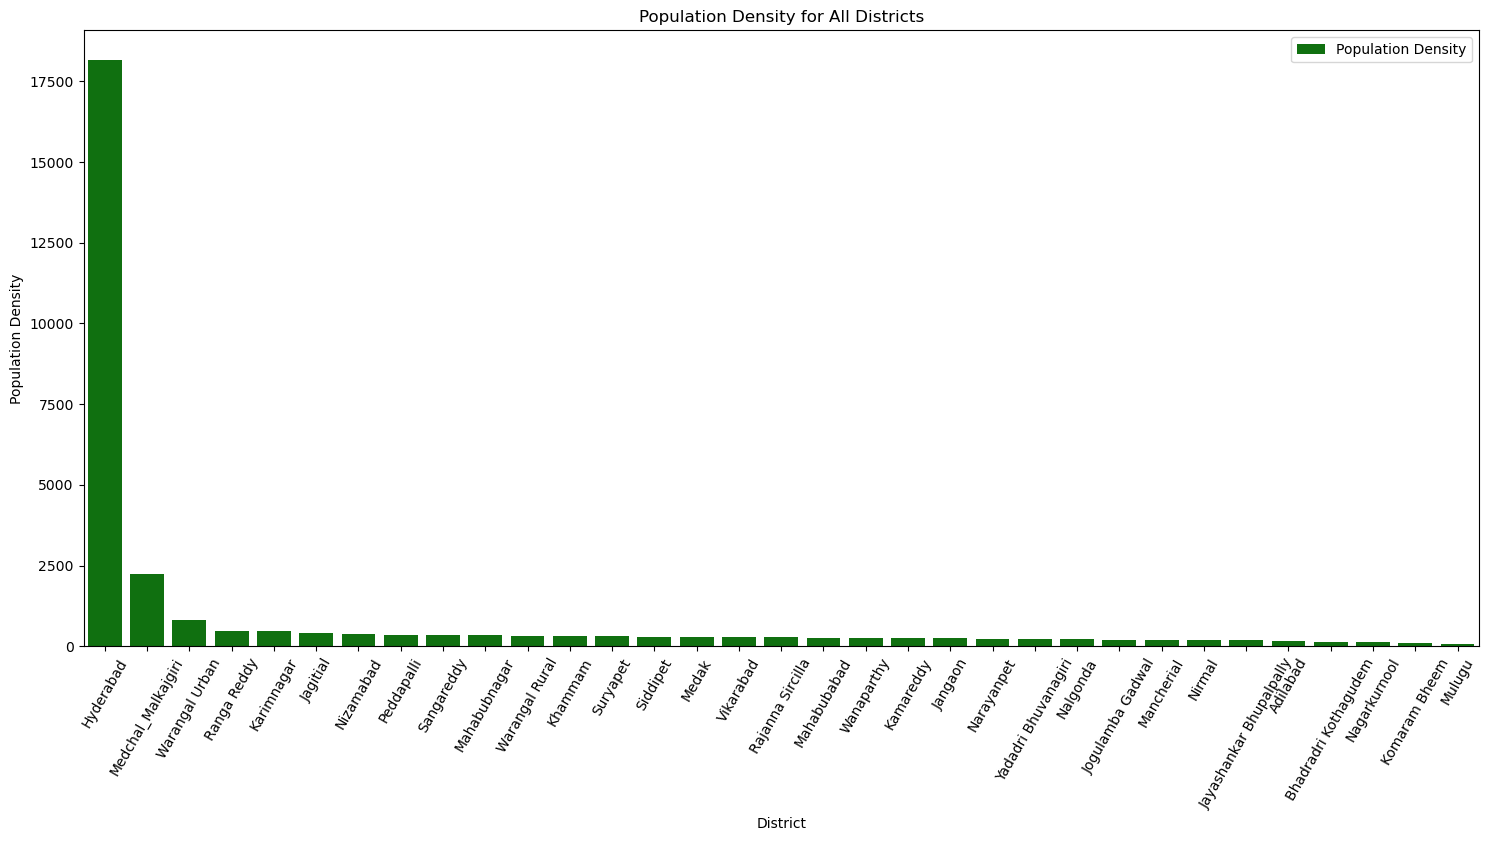

In [153]:
# Sort the DataFrame by 'population' in descending order
population_sorted = population_density.sort_values(by='population', ascending=False)

# Create a bar plot for population in 2023 for all districts
plt.figure(figsize=(18, 8))
sns.barplot(x=population_sorted['districts'], y=population_sorted['population'], color='orange', label='Estimated Population in 2023')
plt.title('Estimated Population in 2023 for All Districts')
plt.xlabel('District')
plt.ylabel('Population')
plt.xticks(rotation=60)
plt.legend()
plt.show()

# Sort the DataFrame by 'density' in descending order
density_sorted = population_density.sort_values(by='density', ascending=False)

# Create a bar plot for population density for all districts
plt.figure(figsize=(18, 8))
sns.barplot(x=density_sorted['districts'], y=density_sorted['density'], color='green', label='Population Density')
plt.title('Population Density for All Districts')
plt.xlabel('District')
plt.ylabel('Population Density')
plt.xticks(rotation=60)
plt.legend()
plt.show()

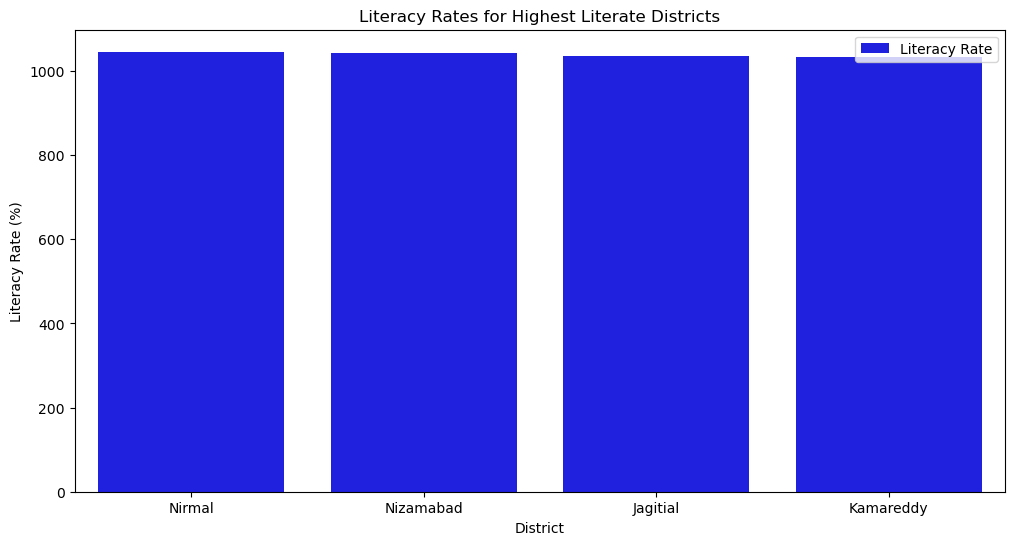

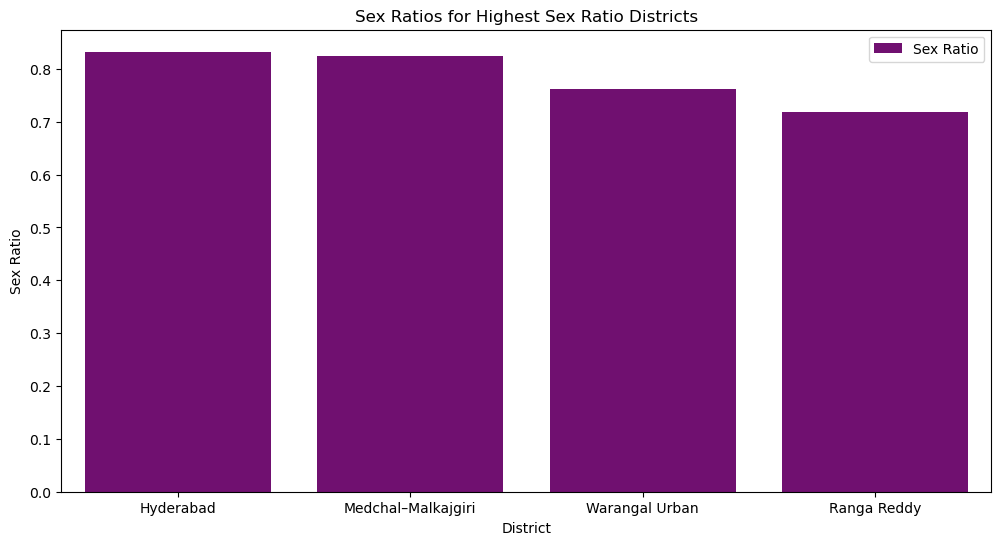

In [154]:
# Create a bar plot for literacy rates
plt.figure(figsize=(12, 6))
sns.barplot(x=highest_sex_ratio['districts'], y=highest_sex_ratio['sex_ratio'], color='blue', label='Literacy Rate')
plt.title('Literacy Rates for Highest Literate Districts')
plt.xlabel('District')
plt.ylabel('Literacy Rate (%)')
plt.legend()
plt.show()

# Create a bar plot for sex ratios
plt.figure(figsize=(12, 6))
sns.barplot(x=highest_literate['districts'], y=highest_literate['perc'], color='purple', label='Sex Ratio')
plt.title('Sex Ratios for Highest Sex Ratio Districts')
plt.xlabel('District')
plt.ylabel('Sex Ratio')
plt.legend()
plt.show()

The Hyderabad Metropolitan Region, under the Hyderabad Metropolitan Development Authority, spans seven districts: `Hyderabad`, `Bhuvanagiri`, `Medchal-Malkajgiri`, `Ranga Reddy`, `Sangareddy`, `Medak`, and `Siddipet`. Notably, the Greater Hyderabad Municipal Corporation includes `175 villages` and `12 municipalities`, covering `31 villages`. Key districts within the region are `Hyderabad` (`16 mandals`), `Medchal-Malkajgiri` (`14 mandals`), `Ranga Reddy` (`20 mandals`), and `Sangareddy` (`8 mandals`). Municipal Corporations and Councils further contribute to the region's administrative structure. 

Other Sources: 
- [Wikipedia](https://en.wikipedia.org/wiki/Hyderabad_Metropolitan_Region)
- [India Census](https://www.indiacensus.net/states/telangana/density)
- [Industries Telangana - Medchal District Profile](https://industries.telangana.gov.in/Library/DistrictNew/MEDCHAL.pdf)

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 20px; font-weight: bold; text-align: justify; color: #555;">Outlier Analysis</h2>

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">1. Documents Registered Count:</h2>

  <ul style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">
    <li>Rangareddy, Medchal_Malkajgiri:</li>
    <li>Cause: High population density and economic activities leading to increased document registrations.</li>
    <li>Implication: High document count signifies robust economic and real estate activities.</li>
    <li>Prescription: Streamline documentation processes, enhance digital services, and ensure transparent property transactions.</li>
  </ul>



  <h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">2. Documents Registered Revenue:</h2>

  <ul style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">
    <li>Rangareddy, Medchal_Malkajgiri, Hyderabad, Sangareddy:</li>
    <li>Cause: Economic and real estate activities leading to higher revenue from stamp duty.</li>
    <li>Implication: Increased revenue reflects economic strength and real estate transactions.</li>
    <li>Prescription: Ensure transparent and efficient revenue collection processes, explore digital payment options, and monitor property market dynamics.</li>
  </ul>
  
 <h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">3. eStamps Challans Count:</h2>

<ul style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">
    <li>Rangareddy, Medchal_Malkajgiri:</li>
    <li>Cause: Economic and industrial activities contributing to a higher volume of stamp duty transactions.</li>
    <li>Implication: Increased challans indicate frequent property transactions and business activities.</li>
    <li>Prescription: Implement efficient digital stamping processes, facilitate online transactions, and ensure ease of doing business.</li>
</ul>

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">4. eStamps Challans Revenue:</h2>

<ul style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">
    <li>Rangareddy, Medchal_Malkajgiri, Hyderabad, Sangareddy:</li>
    <li>Cause: Economic and real estate activities leading to higher revenue from stamp duty.</li>
    <li>Implication: Increased revenue reflects economic strength and real estate transactions.</li>
    <li>Prescription: Ensure transparent and efficient revenue collection processes, explore digital payment options, and monitor property market dynamics.</li>
</ul>

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">5. Fuel Types (Petrol, Diesel, Electric, Others):</h2>

<ul style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">
    <li>Rangareddy, Medchal_Malkajgiri, Hyderabad, Sangareddy, Nizamabad, Khammam, Nalgonda, Yadadri Bhuvanagiri:</li>
    <li>Cause: Varied fuel consumption patterns based on urbanization, economic activities, and industrialization.</li>
    <li>Implication: Different fuel types reflect the region's energy infrastructure and environmental concerns.</li>
    <li>Prescription: Promote electric and eco-friendly vehicles, invest in sustainable energy solutions, and monitor air quality.</li>
</ul>

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">6. Vehicle Classes (Motorcycle, MotorCar, AutoRickshaw, Agriculture, Others):</h2>

<ul style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">
    <li>Rangareddy, Medchal_Malkajgiri, Hyderabad:</li>
    <li>Cause: Diverse economic activities contributing to various types of vehicles.</li>
    <li>Implication: Vehicle class distribution reflects economic diversity and transportation needs.</li>
    <li>Prescription: Plan infrastructure for diverse vehicle types, promote sustainable transport, and manage traffic accordingly.</li>
</ul>

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">7. Seat Capacity (1 to 3, 4 to 6, Above 6):</h2>

<ul style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">
    <li>Rangareddy, Medchal_Malkajgiri, Hyderabad, Sangareddy:</li>
    <li>Cause: Varied vehicle seat capacities based on economic activities and urbanization.</li>
    <li>Implication: Seat capacity distribution reflects transportation needs and preferences.</li>
    <li>Prescription: Plan transportation infrastructure, encourage shared mobility, and consider urban planning for efficient traffic flow.</li>
</ul>

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">8. Brand New and Pre-Owned Vehicles:</h2>

<ul style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">
    <li>Rangareddy, Medchal_Malkajgiri, Hyderabad, Sangareddy:</li>
    <li>Cause: Economic prosperity and preferences influencing vehicle purchase choices.</li>
    <li>Implication: Distribution of new and pre-owned vehicles reflects consumer behavior and market dynamics.</li>
    <li>Prescription: Monitor consumer trends, support the automotive industry, and ensure transparent resale processes.</li>
</ul>

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">9. Category (Non-Transport, Transport):</h2>

<ul style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">
    <li>Rangareddy, Medchal_Malkajgiri, Hyderabad:</li>
    <li>Cause: Economic activities influencing the distribution of transport and non-transport vehicles.</li>
    <li>Implication: Category distribution reflects the region's economic structure and mobility needs.</li>
    <li>Prescription: Implement sustainable urban planning, invest in public transportation, and promote eco-friendly mobility solutions.</li>
</ul>

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">10. Investment in CR:</h2>

<ul style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">
    <li>Rangareddy, Medchal_Malkajgiri, Sangareddy, Peddapalli:</li>
    <li>Cause: High investments in specific sectors indicating economic focus and development plans.</li>
    <li>Implication: Sector-wise investments reflect the region's economic priorities and growth prospects.</li>
    <li>Prescription: Further investigation into local economic and development policies, collaboration with stakeholders, and continuous monitoring for dynamic policymaking.</li>
</ul>

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">11. Number of Employees:</h2>

<ul style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">
    <li>Rangareddy, Medchal_Malkajgiri, Sangareddy, Yadadri Bhuvanagiri:</li>
    <li>Cause: Varied employment numbers based on economic activities and industrial presence.</li>
    <li>Implication: Employment distribution reflects the region's economic diversity and job opportunities.</li>
    <li>Prescription: Collaborate with local authorities for targeted skill development, monitor employment trends, and adapt policies for workforce needs.</li>
</ul>

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">Step 4: Data exploration</h2>

Here we are delving into several Key metrics. 

In [155]:
# Merge 'stamps' with 'date' to get the fiscal year for each record
merged_stamps_date = pd.merge(stamps, date, on='start_date')

# Merge 'merged_stamps_date' with 'districts' to get the district names
merged_stamps_districts = pd.merge(merged_stamps_date, districts, on='dist_code')

# Filter data for each fiscal year
fy_2019_stamps = merged_stamps_districts[merged_stamps_districts['fiscal_year'] == 2019].copy()
fy_2020_stamps = merged_stamps_districts[merged_stamps_districts['fiscal_year'] == 2020].copy()
fy_2021_stamps = merged_stamps_districts[merged_stamps_districts['fiscal_year'] == 2021].copy()
fy_2022_stamps = merged_stamps_districts[merged_stamps_districts['fiscal_year'] == 2022].copy()

# Calculate total revenue for each fiscal year (Document Registration Revenue)
total_revenue_2019_all = fy_2019_stamps.groupby('district')['documents_registered_rev'].sum().sum()
total_revenue_2020_all = fy_2020_stamps.groupby('district')['documents_registered_rev'].sum().sum()
total_revenue_2021_all = fy_2021_stamps.groupby('district')['documents_registered_rev'].sum().sum()
total_revenue_2022_all = fy_2022_stamps.groupby('district')['documents_registered_rev'].sum().sum()

# Calculate the change in growth from 2019 to 2020, 2020 to 2021, and 2021 to 2022
growth_2019_to_2020_all = ((total_revenue_2020_all - total_revenue_2019_all) / total_revenue_2019_all) * 100
growth_2020_to_2021_all = ((total_revenue_2021_all - total_revenue_2020_all) / total_revenue_2020_all) * 100
growth_2021_to_2022_all = ((total_revenue_2022_all - total_revenue_2021_all) / total_revenue_2021_all) * 100

# Print the results for total revenue
print("\nTotal Document Registration Revenue in FY 2019 (All):")
print(total_revenue_2019_all)
print("\nTotal Document Registration Revenue in FY 2020 (All):")
print(total_revenue_2020_all)
print("\nTotal Document Registration Revenue in FY 2021 (All):")
print(total_revenue_2021_all)
print("\nTotal Document Registration Revenue in FY 2022 (All):")
print(total_revenue_2022_all)

print("\nChange in Growth from 2019 to 2020 (All):")
print(growth_2019_to_2020_all)
print("\nChange in Growth from 2020 to 2021 (All):")
print(growth_2020_to_2021_all)
print("\nChange in Growth from 2021 to 2022 (All):")
print(growth_2021_to_2022_all)

# Calculate total revenue for each fiscal year
total_revenue_2019 = fy_2019_stamps.groupby('district')['documents_registered_rev'].sum()
total_revenue_2020 = fy_2020_stamps.groupby('district')['documents_registered_rev'].sum()
total_revenue_2021 = fy_2021_stamps.groupby('district')['documents_registered_rev'].sum()
total_revenue_2022 = fy_2022_stamps.groupby('district')['documents_registered_rev'].sum()

# Calculate the change in growth from 2019 to 2020, 2020 to 2021, and 2021 to 2022
growth_2019_to_2020 = ((total_revenue_2020 - total_revenue_2019) / total_revenue_2019) * 100
growth_2020_to_2021 = ((total_revenue_2021 - total_revenue_2020) / total_revenue_2020) * 100
growth_2021_to_2022 = ((total_revenue_2022 - total_revenue_2021) / total_revenue_2021) * 100

# Print the results for total revenue
print("\nTotal Document Registration Revenue in FY 2019:")
print(total_revenue_2019)
print("\nTotal Document Registration Revenue in FY 2020:")
print(total_revenue_2020)
print("\nTotal Document Registration Revenue in FY 2021:")
print(total_revenue_2021)
print("\nTotal Document Registration Revenue in FY 2022:")
print(total_revenue_2022)

print("\nChange in Growth from 2019 to 2020:")
print(growth_2019_to_2020)
print("\nChange in Growth from 2020 to 2021:")
print(growth_2020_to_2021)
print("\nChange in Growth from 2021 to 2022:")
print(growth_2021_to_2022)


Total Document Registration Revenue in FY 2019 (All):
62410774226

Total Document Registration Revenue in FY 2020 (All):
42047114334

Total Document Registration Revenue in FY 2021 (All):
84075980256

Total Document Registration Revenue in FY 2022 (All):
106695404941

Change in Growth from 2019 to 2020 (All):
-32.62843658734265

Change in Growth from 2020 to 2021 (All):
99.95660008471677

Change in Growth from 2021 to 2022 (All):
26.90355154483707

Total Document Registration Revenue in FY 2019:
district
Adilabad                   178082233
Bhadradri Kothagudem       162466947
Hanumakonda               1738280378
Hyderabad                 8299406278
Jagtial                    357209544
Jangoan                    409485414
Jogulamba Gadwal           208150602
Kamareddy                  326137044
Karimnagar                 804402135
Khammam                   1128220987
Kumurambheem Asifabad       57436107
Mahabubabad                213431168
Mahabubnagar               791024058
Mancheri

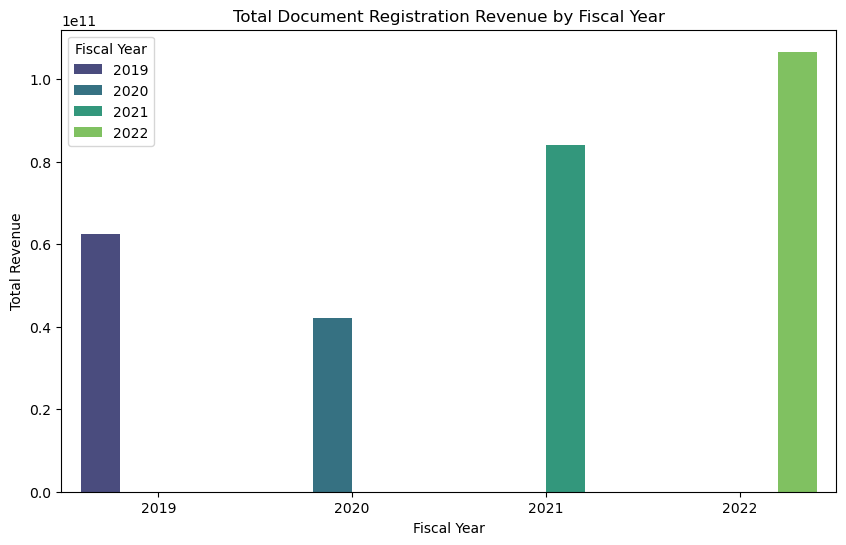

In [156]:
# Aggregate Document Registration Revenue by Fiscal Year
revenue_by_year = merged_stamps_districts.groupby(['fiscal_year'])['documents_registered_rev'].sum().reset_index()

# Bar Chart for Total Document Registration Revenue with Hue
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(data=revenue_by_year, x='fiscal_year', y='documents_registered_rev', hue='fiscal_year', dodge=True, palette='viridis')

ax.set_title('Total Document Registration Revenue by Fiscal Year')
ax.set_xlabel('Fiscal Year')
ax.set_ylabel('Total Revenue')
ax.legend(title='Fiscal Year', loc='upper left')
plt.show()

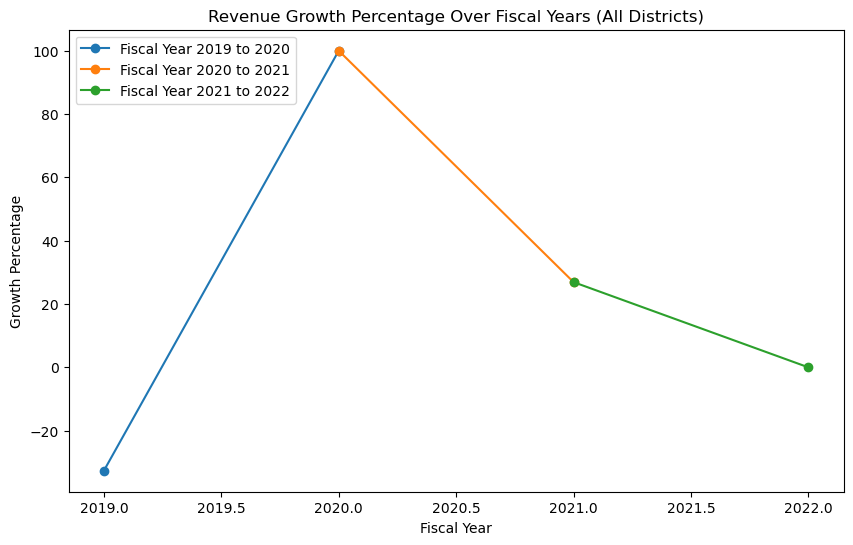

In [157]:
# Data for Growth Percentage
years = [2019, 2020, 2021, 2022]
growth_percentages = [growth_2019_to_2020_all, growth_2020_to_2021_all, growth_2021_to_2022_all, 0]  # Include growth for 2022

# Line Chart for Growth Percentage with Hue and Lines
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(len(years)-1):
    plt.plot([years[i], years[i+1]], [growth_percentages[i], growth_percentages[i+1]], marker='o', label=f"Fiscal Year {years[i]} to {years[i+1]}")

ax.set_title('Revenue Growth Percentage Over Fiscal Years (All Districts)')
ax.set_xlabel('Fiscal Year')
ax.set_ylabel('Growth Percentage')
ax.legend(loc='upper left')
plt.show()

In [158]:
# Merge 'date_data' with 'transport_data' on 'start_date'
merged_transport_date = pd.merge(transport, date, on='start_date')

# Filter data for each fiscal year
fy_2019_transport = merged_transport_date[merged_transport_date['fiscal_year'] == 2019].copy()
fy_2020_transport = merged_transport_date[merged_transport_date['fiscal_year'] == 2020].copy()
fy_2021_transport = merged_transport_date[merged_transport_date['fiscal_year'] == 2021].copy()
fy_2022_transport = merged_transport_date[merged_transport_date['fiscal_year'] == 2022].copy()

# Columns related to vehicle sales
vehicle_sales_cols = ['fuel_type_petrol', 'fuel_type_diesel', 'fuel_type_electric', 'fuel_type_others']

# Calculate total vehicle sales for each fiscal year (Transport category)
total_sales_2019_transport_all = fy_2019_transport[vehicle_sales_cols].sum().sum()
total_sales_2020_transport_all = fy_2020_transport[vehicle_sales_cols].sum().sum()
total_sales_2021_transport_all = fy_2021_transport[vehicle_sales_cols].sum().sum()
total_sales_2022_transport_all = fy_2022_transport[vehicle_sales_cols].sum().sum()

# Calculate the change in growth from 2019 to 2020, 2020 to 2021, and 2021 to 2022 (Transport category)
growth_2019_to_2020_transport_all = ((total_sales_2020_transport_all - total_sales_2019_transport_all) / total_sales_2019_transport_all) * 100
growth_2020_to_2021_transport_all = ((total_sales_2021_transport_all - total_sales_2020_transport_all) / total_sales_2020_transport_all) * 100
growth_2021_to_2022_transport_all = ((total_sales_2022_transport_all - total_sales_2021_transport_all) / total_sales_2021_transport_all) * 100

# Print the results for the specified fuel types
print("\nTotal Vehicle Sales in FY 2019 (All):")
print(total_sales_2019_transport_all)
print("\nTotal Vehicle Sales in FY 2020 (All):")
print(total_sales_2020_transport_all)
print("\nTotal Vehicle Sales in FY 2021 (All):")
print(total_sales_2021_transport_all)
print("\nTotal Vehicle Sales in FY 2022 (All):")
print(total_sales_2022_transport_all)

print("\nChange in Growth from 2019 to 2020 (All):")
print(growth_2019_to_2020_transport_all)
print("\nChange in Growth from 2020 to 2021 (All):")
print(growth_2020_to_2021_transport_all)
print("\nChange in Growth from 2021 to 2022 (All):")
print(growth_2021_to_2022_transport_all)

# Convert relevant columns to numeric
fy_2019_transport[vehicle_sales_cols] = fy_2019_transport[vehicle_sales_cols].apply(pd.to_numeric, errors='coerce')
fy_2020_transport[vehicle_sales_cols] = fy_2020_transport[vehicle_sales_cols].apply(pd.to_numeric, errors='coerce')
fy_2021_transport[vehicle_sales_cols] = fy_2021_transport[vehicle_sales_cols].apply(pd.to_numeric, errors='coerce')
fy_2022_transport[vehicle_sales_cols] = fy_2022_transport[vehicle_sales_cols].apply(pd.to_numeric, errors='coerce')

# Calculate total vehicle sales for each fiscal year (Transport category)
total_sales_2019_transport = fy_2019_transport[vehicle_sales_cols].sum()
total_sales_2020_transport = fy_2020_transport[vehicle_sales_cols].sum()
total_sales_2021_transport = fy_2021_transport[vehicle_sales_cols].sum()
total_sales_2022_transport = fy_2022_transport[vehicle_sales_cols].sum()

# Calculate the change in growth from 2019 to 2020, 2020 to 2021, and 2021 to 2022 (Transport category)
growth_2019_to_2020_transport = ((total_sales_2020_transport - total_sales_2019_transport) / total_sales_2019_transport) * 100
growth_2020_to_2021_transport = ((total_sales_2021_transport - total_sales_2020_transport) / total_sales_2020_transport) * 100
growth_2021_to_2022_transport = ((total_sales_2022_transport - total_sales_2021_transport) / total_sales_2021_transport) * 100

# Print the results for the Transport category
print("\nTotal Vehicle Sales in FY 2019 (Transport):")
print(total_sales_2019_transport)
print("\nTotal Vehicle Sales in FY 2020 (Transport):")
print(total_sales_2020_transport)
print("\nTotal Vehicle Sales in FY 2021 (Transport):")
print(total_sales_2021_transport)
print("\nTotal Vehicle Sales in FY 2022 (Transport):")
print(total_sales_2022_transport)

print("\nChange in Growth from 2019 to 2020 (Transport):")
print(growth_2019_to_2020_transport)
print("\nChange in Growth from 2020 to 2021 (Transport):")
print(growth_2020_to_2021_transport)
print("\nChange in Growth from 2021 to 2022 (Transport):")
print(growth_2021_to_2022_transport)


Total Vehicle Sales in FY 2019 (All):
2043571

Total Vehicle Sales in FY 2020 (All):
1658209

Total Vehicle Sales in FY 2021 (All):
1550305

Total Vehicle Sales in FY 2022 (All):
1413692

Change in Growth from 2019 to 2020 (All):
-18.857284625784963

Change in Growth from 2020 to 2021 (All):
-6.507261750478981

Change in Growth from 2021 to 2022 (All):
-8.812007959724054

Total Vehicle Sales in FY 2019 (Transport):
fuel_type_petrol      1669884
fuel_type_diesel       341790
fuel_type_electric       4143
fuel_type_others        27754
dtype: int64

Total Vehicle Sales in FY 2020 (Transport):
fuel_type_petrol      1433801
fuel_type_diesel       212145
fuel_type_electric       5980
fuel_type_others         6283
dtype: int64

Total Vehicle Sales in FY 2021 (Transport):
fuel_type_petrol      1300723
fuel_type_diesel       199346
fuel_type_electric      31004
fuel_type_others        19232
dtype: int64

Total Vehicle Sales in FY 2022 (Transport):
fuel_type_petrol      1118857
fuel_type_diesel

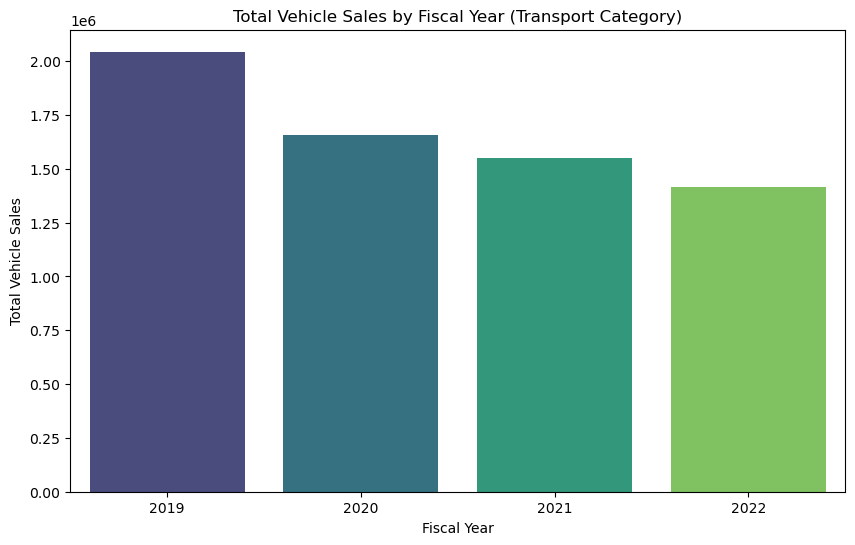

In [159]:
# Data for Bar Chart
years_transport = [2019, 2020, 2021, 2022]
total_sales_transport = [total_sales_2019_transport_all, total_sales_2020_transport_all, total_sales_2021_transport_all, total_sales_2022_transport_all]

# Bar Chart for Total Vehicle Sales
fig, ax1 = plt.subplots(figsize=(10, 6))

sns.barplot(x=years_transport, y=total_sales_transport, palette='viridis', ax=ax1)

ax1.set_title('Total Vehicle Sales by Fiscal Year (Transport Category)')
ax1.set_xlabel('Fiscal Year')
ax1.set_ylabel('Total Vehicle Sales')

plt.show()

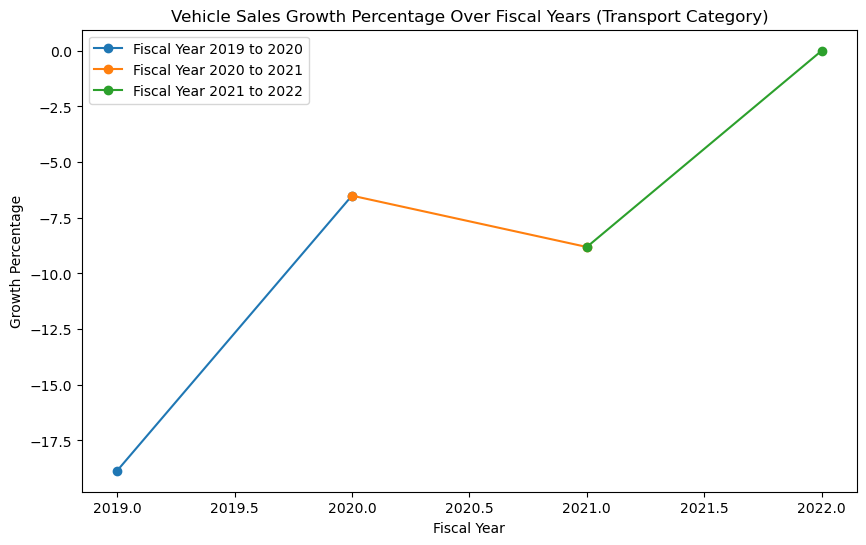

In [160]:
# Data for Line Chart
years_transport = [2019, 2020, 2021, 2022]
growth_percentages_transport = [growth_2019_to_2020_transport_all, growth_2020_to_2021_transport_all, growth_2021_to_2022_transport_all, 0]

# Line Chart for Growth Percentage with Hue and Lines
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(len(years_transport)-1):
    plt.plot([years_transport[i], years_transport[i+1]], [growth_percentages_transport[i], growth_percentages_transport[i+1]], marker='o', label=f"Fiscal Year {years_transport[i]} to {years_transport[i+1]}")

ax.set_title('Vehicle Sales Growth Percentage Over Fiscal Years (Transport Category)')
ax.set_xlabel('Fiscal Year')
ax.set_ylabel('Growth Percentage')
ax.legend(loc='upper left')
plt.show()


In [161]:
# Merge 'date_data' with 'ts_ipass_data' on 'start_date'
merged_ts_ipass_date = pd.merge(ts_ipass, date, on='start_date')

# Filter data for each fiscal year
fy_2019_ts_ipass = merged_ts_ipass_date[merged_ts_ipass_date['fiscal_year'] == 2019]
fy_2020_ts_ipass = merged_ts_ipass_date[merged_ts_ipass_date['fiscal_year'] == 2020]
fy_2021_ts_ipass = merged_ts_ipass_date[merged_ts_ipass_date['fiscal_year'] == 2021]
fy_2022_ts_ipass = merged_ts_ipass_date[merged_ts_ipass_date['fiscal_year'] == 2022]

# Calculate total investments for each fiscal year
total_investments_2019 = fy_2019_ts_ipass['investment in cr'].sum()
total_investments_2020 = fy_2020_ts_ipass['investment in cr'].sum()
total_investments_2021 = fy_2021_ts_ipass['investment in cr'].sum()
total_investments_2022 = fy_2022_ts_ipass['investment in cr'].sum()

# Calculate the change in growth for each period
growth_2019_to_2020 = ((total_investments_2020 - total_investments_2019) / total_investments_2019) * 100
growth_2020_to_2021 = ((total_investments_2021 - total_investments_2020) / total_investments_2020) * 100
growth_2021_to_2022 = ((total_investments_2022 - total_investments_2021) / total_investments_2021) * 100

# Print the results
print("Total Investments in FY 2019:", total_investments_2019)
print("Total Investments in FY 2020:", total_investments_2020)
print("Total Investments in FY 2021:", total_investments_2021)
print("Total Investments in FY 2022:", total_investments_2022)

print("\nChange in Growth from 2019 to 2020: {:.2f}%".format(growth_2019_to_2020))
print("Change in Growth from 2020 to 2021: {:.2f}%".format(growth_2020_to_2021))
print("Change in Growth from 2021 to 2022: {:.2f}%".format(growth_2021_to_2022))

Total Investments in FY 2019: 40500.6688
Total Investments in FY 2020: 14979.9938
Total Investments in FY 2021: 17888.8438
Total Investments in FY 2022: 25763.9599

Change in Growth from 2019 to 2020: -63.01%
Change in Growth from 2020 to 2021: 19.42%
Change in Growth from 2021 to 2022: 44.02%


Here, we embark on a data exploration journey to uncover insights that address `the primary questions`

- How does the revenue generated from document registration vary across districts in Telangana?

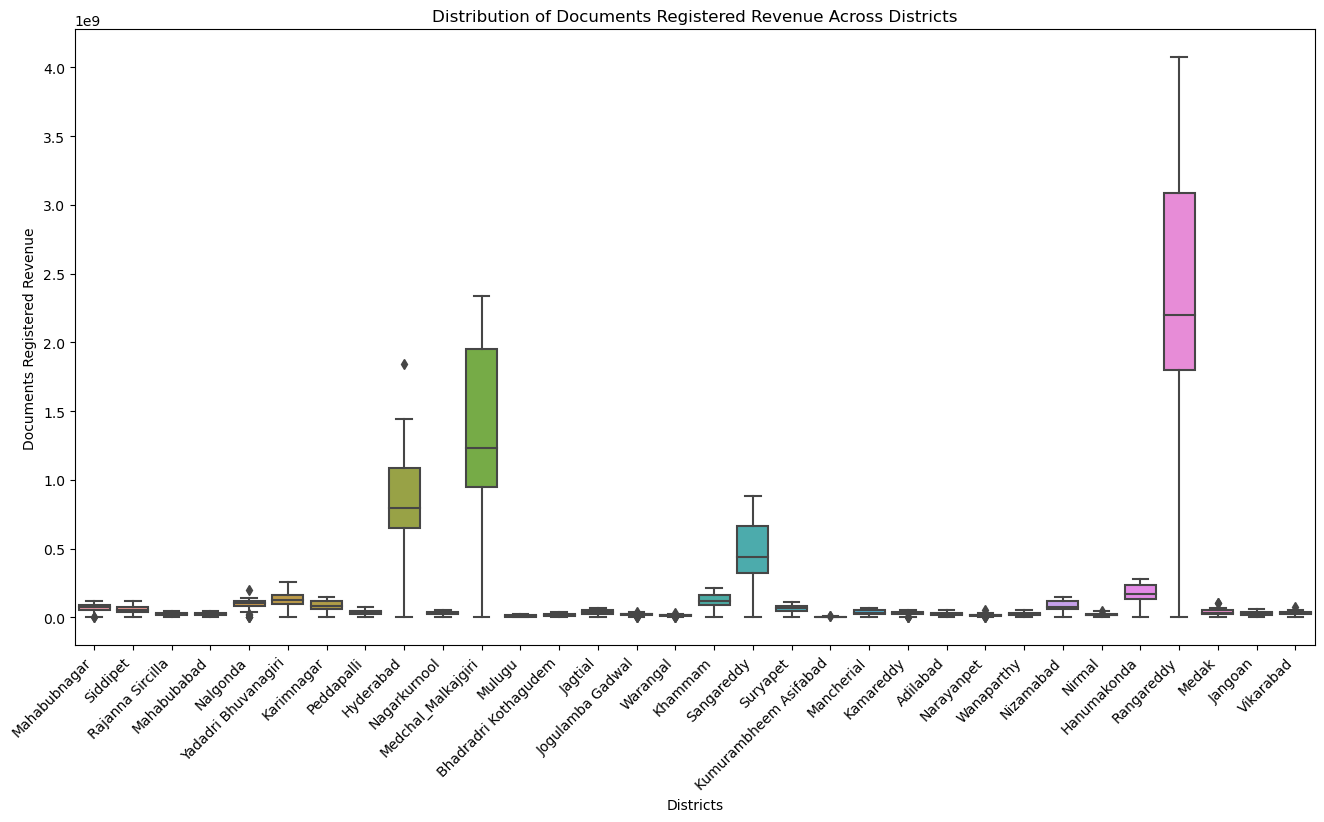

In [162]:
# Merge 'stamps' with 'dim_districts' to add 'district' column
stamps_with_district = pd.merge(stamps, districts[['dist_code', 'district']], on='dist_code', how='left')

# Set the plot size
plt.figure(figsize=(16, 8))

# Create a boxplot to visualize revenue distribution across districts
sns.boxplot(x='district', y='documents_registered_rev', data=stamps_with_district)

# Set plot labels and title
plt.xlabel('Districts')
plt.ylabel('Documents Registered Revenue')
plt.title('Distribution of Documents Registered Revenue Across Districts')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

In [163]:
stamps_grouped = stamps_with_district.groupby('district')['documents_registered_rev'].sum().reset_index()

In [164]:
summary_stats = stamps_grouped['documents_registered_rev'].describe()
print(summary_stats)

count    3.200000e+01
mean     9.225915e+09
std      2.220451e+10
min      2.274626e+08
25%      1.064885e+09
50%      1.667087e+09
75%      4.165612e+09
max      1.081987e+11
Name: documents_registered_rev, dtype: float64


- List down the top 5 districts that showed the highest document registration revenue growth between FY 2019 and 2022.

In [165]:
# Calculate growth for each district and get the top 5 districts
district_growth_2019_to_2020 = fy_2020_stamps.groupby('district')['documents_registered_rev'].sum() - fy_2019_stamps.groupby('district')['documents_registered_rev'].sum()
district_growth_2020_to_2021 = fy_2021_stamps.groupby('district')['documents_registered_rev'].sum() - fy_2020_stamps.groupby('district')['documents_registered_rev'].sum()
district_growth_2021_to_2022 = fy_2022_stamps.groupby('district')['documents_registered_rev'].sum() - fy_2021_stamps.groupby('district')['documents_registered_rev'].sum()

district_growth_total = district_growth_2019_to_2020 + district_growth_2020_to_2021 + district_growth_2021_to_2022

top_5_districts = pd.DataFrame({
    'Total Growth': district_growth_total,
    'Change (%) 2019-2020': (district_growth_2019_to_2020 / fy_2019_stamps.groupby('district')['documents_registered_rev'].sum()) * 100,
    'Change (%) 2020-2021': (district_growth_2020_to_2021 / fy_2020_stamps.groupby('district')['documents_registered_rev'].sum()) * 100,
    'Change (%) 2021-2022': (district_growth_2021_to_2022 / fy_2021_stamps.groupby('district')['documents_registered_rev'].sum()) * 100
})

top_5_districts = top_5_districts.nlargest(5, 'Total Growth')

print("\nTop 5 Districts with Highest Document Registration Revenue Growth (FY 2019 to FY 2022):")
print(top_5_districts)


Top 5 Districts with Highest Document Registration Revenue Growth (FY 2019 to FY 2022):
                    Total Growth  Change (%) 2019-2020  Change (%) 2020-2021  \
district                                                                       
Rangareddy           14448100747            -33.823496            107.109570   
Medchal_Malkajgiri   11500235014            -25.986885             96.052589   
Hyderabad             5966606163            -38.315647            109.239691   
Sangareddy            3675577001            -38.896821            125.835569   
Hanumakonda           1078958209            -25.549036             60.551878   

                    Change (%) 2021-2022  
district                                  
Rangareddy                     18.302802  
Medchal_Malkajgiri             32.100796  
Hyderabad                      33.179226  
Sangareddy                     30.401925  
Hanumakonda                    35.587010  


- How does the revenue generated from document registration compare to the revenue generated from e-stamp challans across districts? 

In [166]:
updated_stamps = pd.merge(stamps_with_district, date , on='start_date', how='left')

In [167]:
# Include both document registration and e-stamp data without filtering
doc_reg_data = updated_stamps
e_stamp_data = updated_stamps[updated_stamps['estamps_challans_rev'] != 0]

# Filter data for FY 2022
doc_reg_2022 = doc_reg_data[doc_reg_data['fiscal_year'] == 2022]
e_stamp_2022 = e_stamp_data[e_stamp_data['fiscal_year'] == 2022]

# Group data by district and calculate total revenue for each fiscal year
doc_reg_revenue_2022 = doc_reg_2022.groupby('district')['documents_registered_rev'].sum()
e_stamp_revenue_2022 = e_stamp_2022.groupby('district')['estamps_challans_rev'].sum()

# Combine the two types of revenue into a single DataFrame
revenue_comparison = pd.DataFrame({
    'District': doc_reg_revenue_2022.index,
    'Document_Registration_Revenue': doc_reg_revenue_2022.values,
    'E_Stamp_Revenue': e_stamp_revenue_2022.values
})

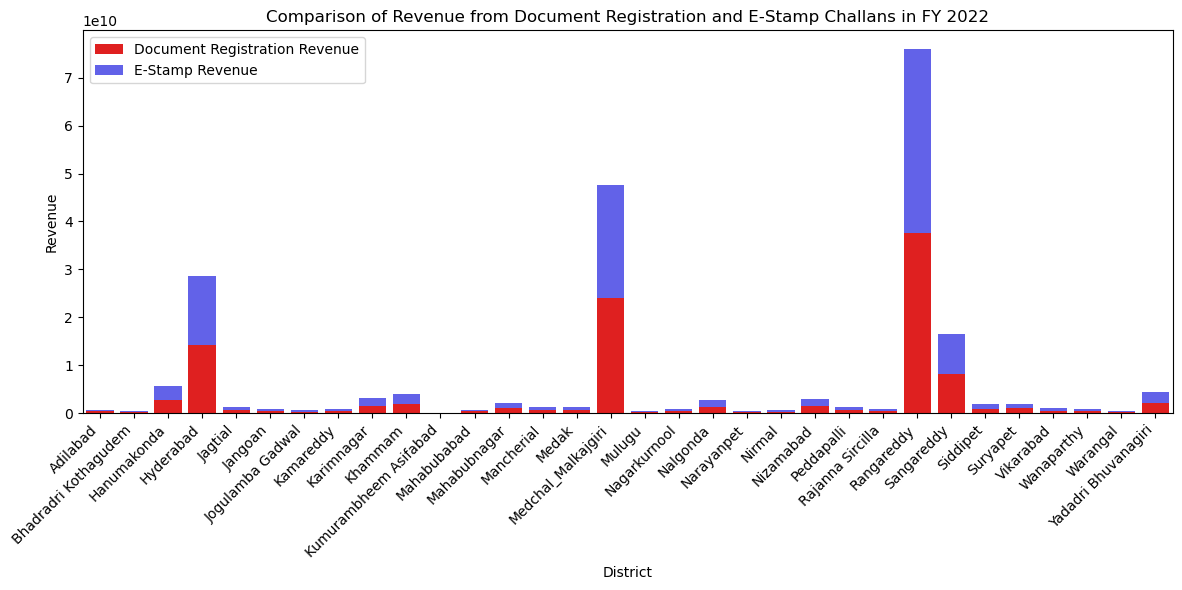

In [168]:
# Plotting the results
plt.figure(figsize=(12, 6))

# Stacked bar chart for Document Registration and E-Stamp Challans Revenue
sns.barplot(x='District', y='Document_Registration_Revenue', data=revenue_comparison, color='red', label='Document Registration Revenue')
sns.barplot(x='District', y='E_Stamp_Revenue', data=revenue_comparison, color='blue', label='E-Stamp Revenue', alpha=0.7, bottom=revenue_comparison['Document_Registration_Revenue'])

# Set plot labels and title
plt.xlabel('District')
plt.ylabel('Revenue')
plt.title('Comparison of Revenue from Document Registration and E-Stamp Challans in FY 2022')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

- List down the top 5 districts where e-stamps revenue contributes significantly more to the revenue than the documents in FY 2022?

In [169]:
# Include both document registration and e-stamp data without filtering
doc_reg_data = updated_stamps
e_stamp_data = updated_stamps[updated_stamps['estamps_challans_rev'] != 0]

# Filter data for FY 2022
doc_reg_2022 = doc_reg_data[doc_reg_data['fiscal_year'] == 2022]
e_stamp_2022 = e_stamp_data[e_stamp_data['fiscal_year'] == 2022]

# Group data by district and calculate total revenue for each fiscal year
doc_reg_revenue_2022 = doc_reg_2022.groupby('district')['documents_registered_rev'].sum()
e_stamp_revenue_2022 = e_stamp_2022.groupby('district')['estamps_challans_rev'].sum()

# Calculate the proportion of e-stamps revenue to the total revenue
proportion_e_stamp = e_stamp_revenue_2022 / (e_stamp_revenue_2022 + doc_reg_revenue_2022)

# Set the threshold for a district to be considered
threshold = 0.5  # Adjust this threshold as needed (e.g., 0.7, 0.85, etc.)

# Filter districts where e-stamps revenue contributes significantly more than documents in FY 2022
significant_e_stamp_districts = proportion_e_stamp[proportion_e_stamp > threshold]

# Get the top 5 significant districts
top_5_significant_districts = significant_e_stamp_districts.nlargest(5)

# Display the top 5 results
print(f"Top 5 Districts where E-Stamps Revenue Contributes More than {threshold * 100}% of Total Revenue in FY 2022:")
print(top_5_significant_districts)

Top 5 Districts where E-Stamps Revenue Contributes More than 50.0% of Total Revenue in FY 2022:
district
Jangoan       0.506276
Nirmal        0.505185
Mancherial    0.504896
Rangareddy    0.504284
Kamareddy     0.503978
dtype: float64


- Is there any alteration of e-Stamp challan count and document registration count pattern since the implementation of e-Stamp challan? 
- If so, what suggestions would you propose to the government?

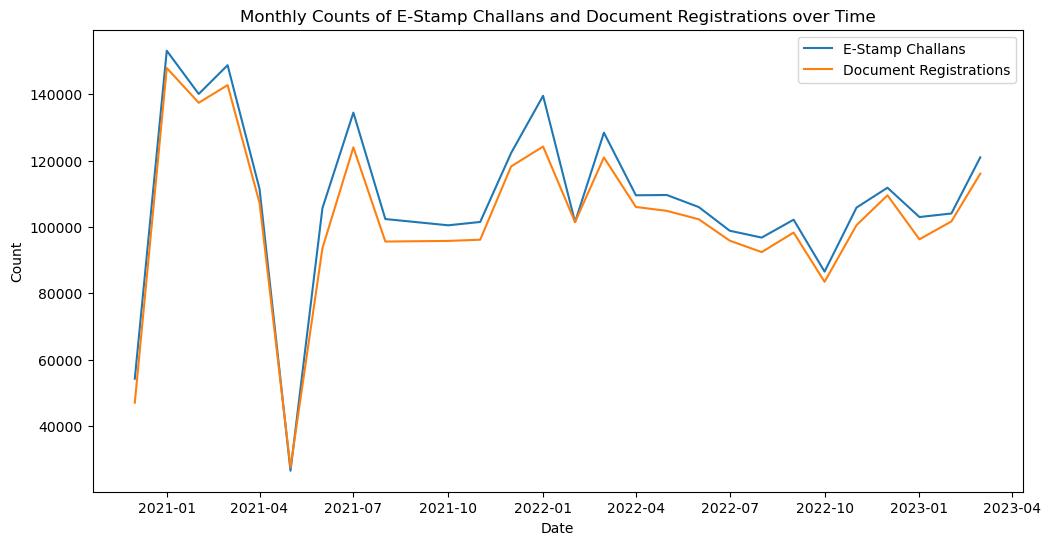

In [170]:
# Filter data for e-Stamp challans with non-zero counts
e_stamp_data = updated_stamps[updated_stamps['estamps_challans_cnt'] != 0]
doc_reg_data = updated_stamps[updated_stamps['estamps_challans_cnt'] != 0]

# Calculate monthly counts for e-Stamp challans and document registrations separately
e_stamp_counts = e_stamp_data.groupby(['start_date', 'fiscal_year'])['estamps_challans_cnt'].sum().reset_index()
doc_reg_counts = doc_reg_data.groupby(['start_date', 'fiscal_year'])['documents_registered_cnt'].sum().reset_index()

# Plot the time series
plt.figure(figsize=(12, 6))
sns.lineplot(x='start_date', y='estamps_challans_cnt', data=e_stamp_counts, label='E-Stamp Challans')
sns.lineplot(x='start_date', y='documents_registered_cnt', data=doc_reg_counts, label='Document Registrations')

# Set plot labels and title
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Monthly Counts of E-Stamp Challans and Document Registrations over Time')
plt.legend()
plt.show()

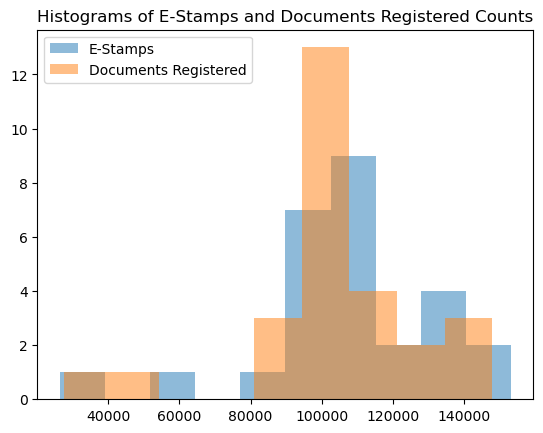

In [171]:
plt.hist(e_stamp_counts['estamps_challans_cnt'], bins='auto', alpha=0.5, label='E-Stamps')
plt.hist(doc_reg_counts['documents_registered_cnt'], bins='auto', alpha=0.5, label='Documents Registered')
plt.legend()
plt.title('Histograms of E-Stamps and Documents Registered Counts')
plt.show()

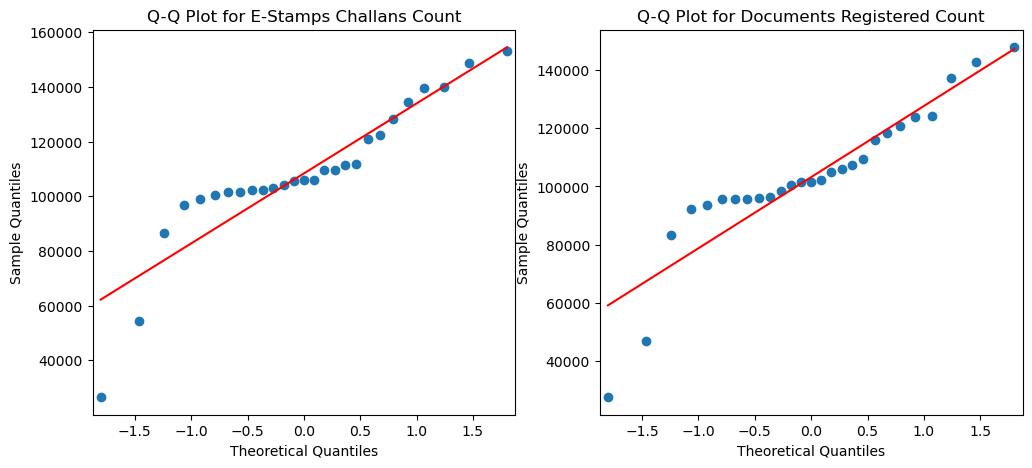

In [172]:
import statsmodels.api as sm

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sm.qqplot(e_stamp_counts['estamps_challans_cnt'], line='s', ax=ax[0])
ax[0].set_title('Q-Q Plot for E-Stamps Challans Count')

sm.qqplot(doc_reg_counts['documents_registered_cnt'], line='s', ax=ax[1])
ax[1].set_title('Q-Q Plot for Documents Registered Count')

plt.show()

In [173]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(e_stamp_counts['estamps_challans_cnt'], doc_reg_counts['documents_registered_cnt'])

# Print the results
print(f'Mann-Whitney U Test Results:')
print(f'Statistic: {statistic}')
print(f'P-value: {p_value}')

# Check for statistical significance
alpha = 0.05
if p_value < alpha:
    print('The difference is statistically significant. Reject the null hypothesis.')
else:
    print('The difference is not statistically significant. Fail to reject the null hypothesis.')

Mann-Whitney U Test Results:
Statistic: 442.0
P-value: 0.18282792394786307
The difference is not statistically significant. Fail to reject the null hypothesis.


- Categorize districts into three segments based on their stamp registration revenue generation during the fiscal year 2021 to 2022.

In [174]:
# Filter data for FY 2021 to 2022
fy_2021_2022 = updated_stamps[(updated_stamps['fiscal_year'] >= 2021) & (updated_stamps['fiscal_year'] <= 2022)]

# Group data by district and calculate total stamp registration revenue
district_revenue = fy_2021_2022.groupby('district')['documents_registered_rev'].sum()

In [175]:
# Determine quartiles for categorization
lower_threshold = district_revenue.quantile(0.25)
upper_threshold = district_revenue.quantile(0.75)

# Categorize districts
district_categories = pd.cut(district_revenue, bins=[-np.inf, lower_threshold, upper_threshold, np.inf], labels=['Low', 'Medium', 'High'])

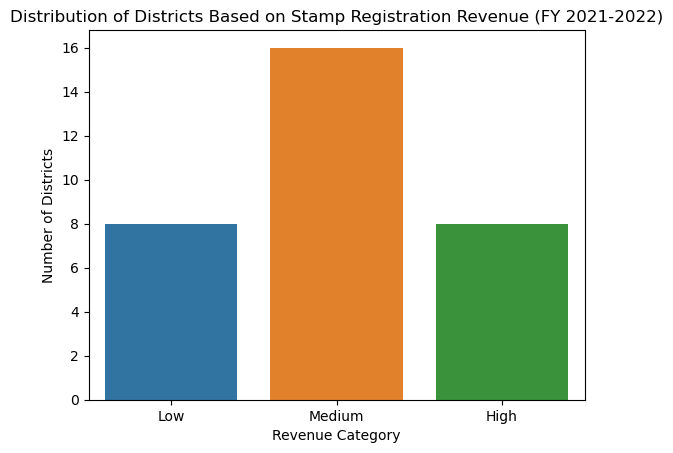

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of districts in each category
category_counts = district_categories.value_counts()

# Plot the bar chart
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.xlabel('Revenue Category')
plt.ylabel('Number of Districts')
plt.title('Distribution of Districts Based on Stamp Registration Revenue (FY 2021-2022)')
plt.show()


In [177]:
# Add the 'district' and 'category' columns to the original DataFrame
district_categories_df = pd.DataFrame({'district': district_revenue.index, 'category': district_categories})

# Display the table with 'district' and 'category' columns only, without the index name
print("Districts Categorized by Stamp Registration Revenue (FY 2021-2022):")
print(district_categories_df[['district', 'category']].to_string(index=False))

Districts Categorized by Stamp Registration Revenue (FY 2021-2022):
             district category
             Adilabad   Medium
 Bhadradri Kothagudem      Low
          Hanumakonda     High
            Hyderabad     High
              Jagtial   Medium
              Jangoan   Medium
     Jogulamba Gadwal      Low
            Kamareddy   Medium
           Karimnagar     High
              Khammam     High
Kumurambheem Asifabad      Low
          Mahabubabad      Low
         Mahabubnagar   Medium
           Mancherial   Medium
                Medak   Medium
   Medchal_Malkajgiri     High
               Mulugu      Low
         Nagarkurnool   Medium
             Nalgonda   Medium
           Narayanpet      Low
               Nirmal      Low
            Nizamabad   Medium
           Peddapalli   Medium
     Rajanna Sircilla   Medium
           Rangareddy     High
           Sangareddy     High
             Siddipet   Medium
             Suryapet   Medium
            Vikarabad   Medium
  

- Investigate whether there is any correlation between vehicle sales and specific months or seasons in different districts. 

In [178]:
# Merge 'transport' with 'district' on 'dist_code'
transport_merged = pd.merge(transport, districts, on='dist_code')

# Merge the result with 'date' on 'start_date'
transport_merged = pd.merge(transport_merged, date, on='start_date')

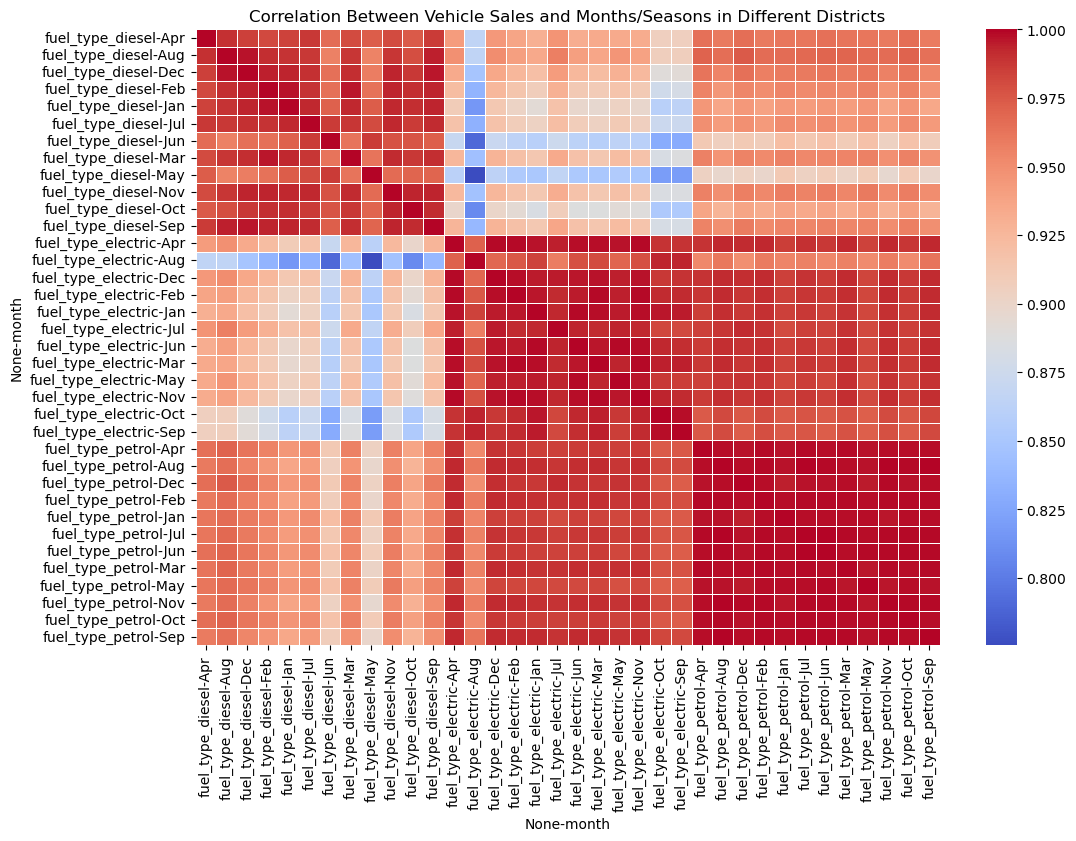

In [179]:
# Filter data for relevant columns
correlation_data = transport_merged[['district', 'month', 'fuel_type_petrol', 'fuel_type_diesel', 'fuel_type_electric']]

# Pivot the data for creating a correlation matrix
correlation_matrix = correlation_data.pivot_table(index='district', columns='month', values=['fuel_type_petrol', 'fuel_type_diesel', 'fuel_type_electric'], aggfunc='sum')

# corr_matrix = correlation_matrix.copy()

# Calculate the correlation matrix
correlation_matrix = correlation_matrix.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.1f', linewidths=.5)
plt.title('Correlation Between Vehicle Sales and Months/Seasons in Different Districts')
plt.show()

- Are there any months or seasons that consistently show higher or lower sales rate, and if yes, what could be the driving factors (Consider Fuel-Type category only)

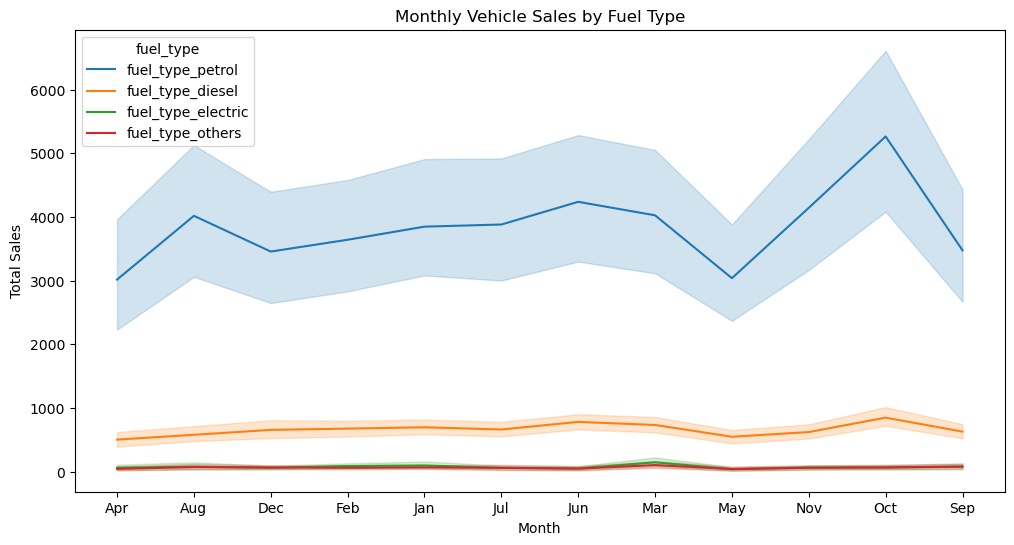

In [180]:
# Group by month and fuel type, summing up the counts
df_sales_by_month = transport_merged.groupby(['month', 'fuel_type_petrol', 'fuel_type_diesel', 'fuel_type_electric', 'fuel_type_others']).sum().reset_index()

# Melt the DataFrame to reshape it
melted_df = df_sales_by_month.melt(id_vars='month', value_vars=['fuel_type_petrol', 'fuel_type_diesel', 'fuel_type_electric', 'fuel_type_others'], var_name='fuel_type', value_name='total_sales')

# Visualize the data
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='total_sales', hue='fuel_type', data=melted_df)
plt.title('Monthly Vehicle Sales by Fuel Type')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

In [181]:
from scipy.stats import kruskal

# Assuming 'total_sales' is the column containing the sales data in the melted DataFrame
petrol_sales = melted_df[melted_df['fuel_type'] == 'fuel_type_petrol']['total_sales']
diesel_sales = melted_df[melted_df['fuel_type'] == 'fuel_type_diesel']['total_sales']
electric_sales = melted_df[melted_df['fuel_type'] == 'fuel_type_electric']['total_sales']
others_sales = melted_df[melted_df['fuel_type'] == 'fuel_type_others']['total_sales']

# Perform Kruskal-Wallis test
kruskal_result = kruskal(petrol_sales, diesel_sales, electric_sales, others_sales)

# Print the Kruskal-Wallis result
print("Kruskal-Wallis Result:")
print(kruskal_result)

# Check if the p-value is less than the significance level (e.g., 0.05)
if kruskal_result.pvalue < 0.05:
    print("There are significant differences in sales between fuel types.")
else:
    print("There are no significant differences in sales between fuel types.")

Kruskal-Wallis Result:
KruskalResult(statistic=4220.614448739037, pvalue=0.0)
There are significant differences in sales between fuel types.


- How does the distribution of vehicles vary by vehicle class (MotorCycle, MotorCar, AutoRickshaw, Agriculture) across different districts? 

<Figure size 1400x800 with 0 Axes>

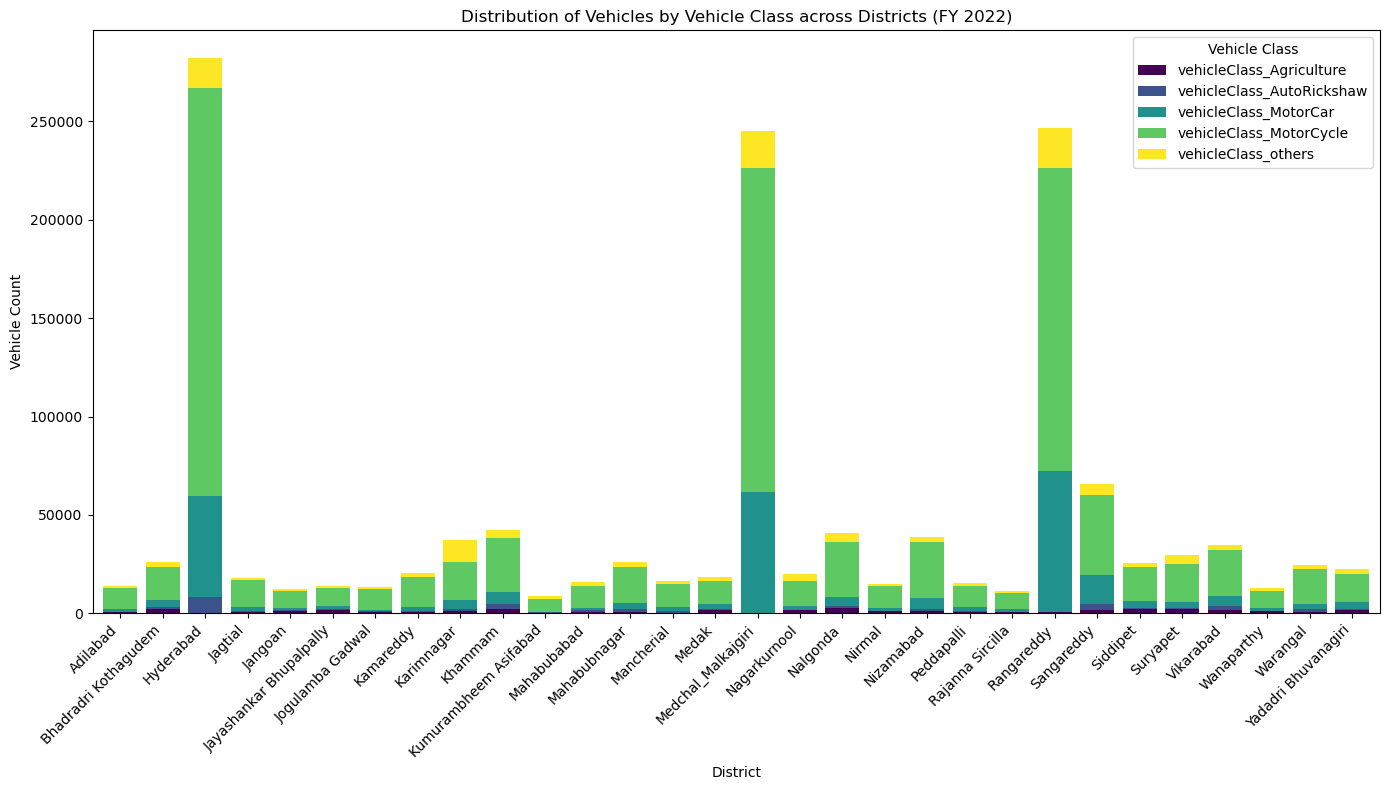

In [182]:
# Filter data for FY 2022
transport_2022 = transport_merged[transport_merged['fiscal_year'] == 2022]

# Group data by district and vehicle class
grouped_data = transport_2022.groupby(['district']).agg({
    'vehicleClass_MotorCycle': 'sum',
    'vehicleClass_MotorCar': 'sum',
    'vehicleClass_AutoRickshaw': 'sum',
    'vehicleClass_Agriculture': 'sum',
    'vehicleClass_others': 'sum'
}).reset_index()

# Melt the dataframe for better visualization
melted_data = pd.melt(grouped_data, id_vars=['district'], var_name='vehicle_class', value_name='vehicle_count_value')

# Aggregate data before pivoting
aggregated_data = melted_data.groupby(['district', 'vehicle_class'], as_index=False)['vehicle_count_value'].sum()

# Pivot the aggregated data for each vehicle class
pivoted_data = aggregated_data.pivot(index='district', columns='vehicle_class', values='vehicle_count_value')

# Plotting the results
plt.figure(figsize=(14, 8))

# Stacked bar chart for Vehicle Class distribution across Districts
pivoted_data.plot(kind='bar', stacked=True, colormap='viridis', figsize=(14, 8), width=0.8)

# Set plot labels and title
plt.xlabel('District')
plt.ylabel('Vehicle Count')
plt.title('Distribution of Vehicles by Vehicle Class across Districts (FY 2022)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Vehicle Class', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()

In [183]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(melted_data['district'], melted_data['vehicle_class'])

# Perform the Chi-Square Test of Independence
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

# Print the results
print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_value)

Chi-Square Statistic: 0.0
P-value: 1.0


In [184]:
# !pip install scikit-posthocs

In [185]:
from scipy.stats import kruskal
from scikit_posthocs import posthoc_dunn

# Perform Kruskal-Wallis test
kruskal_result = kruskal(
    pivoted_data['vehicleClass_MotorCycle'],
    pivoted_data['vehicleClass_MotorCar'],
    pivoted_data['vehicleClass_AutoRickshaw'],
    pivoted_data['vehicleClass_Agriculture'],
    pivoted_data['vehicleClass_others']
)

# Print the Kruskal-Wallis results
print("Kruskal-Wallis Result:")
print("H-statistic:", kruskal_result.statistic)
print("P-value:", kruskal_result.pvalue)

# Perform Dunn's post hoc test if Kruskal-Wallis is significant
if kruskal_result.pvalue < 0.05:
    # Create a DataFrame for post hoc test
    posthoc_df = pd.DataFrame({
        'MotorCycle': pivoted_data['vehicleClass_MotorCycle'],
        'MotorCar': pivoted_data['vehicleClass_MotorCar'],
        'AutoRickshaw': pivoted_data['vehicleClass_AutoRickshaw'],
        'Agriculture': pivoted_data['vehicleClass_Agriculture'],
        'others': pivoted_data['vehicleClass_others']
    })

    # Melt the DataFrame for post hoc test
    posthoc_df_melted = pd.melt(posthoc_df, var_name='group', value_name='value')

    # Perform Dunn's post hoc test
    posthoc_result = posthoc_dunn(posthoc_df_melted, val_col='value', group_col='group', p_adjust='bonferroni')

    # Print the post hoc results
    print("\nDunn's Post Hoc Test:")
    print(posthoc_result)

Kruskal-Wallis Result:
H-statistic: 94.897228316331
P-value: 1.1984227809875317e-19

Dunn's Post Hoc Test:
               Agriculture  AutoRickshaw  MotorCar    MotorCycle    others
Agriculture   1.000000e+00  1.000000e+00  0.001588  4.964513e-13  0.011034
AutoRickshaw  1.000000e+00  1.000000e+00  0.000006  2.167680e-17  0.000075
MotorCar      1.588404e-03  5.970042e-06  1.000000  1.726342e-03  1.000000
MotorCycle    4.964513e-13  2.167680e-17  0.001726  1.000000e+00  0.000195
others        1.103373e-02  7.530761e-05  1.000000  1.953853e-04  1.000000


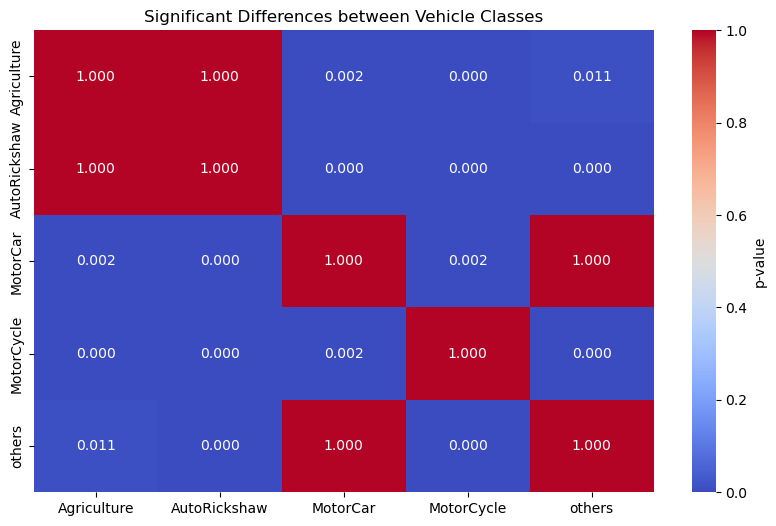

In [186]:
significant_pairs = posthoc_result.dropna(how='all')


plt.figure(figsize=(10, 6))
sns.heatmap(significant_pairs, annot=True, cmap='coolwarm', fmt=".3f", cbar_kws={'label': 'p-value'})
plt.title('Significant Differences between Vehicle Classes')
plt.show()

- Are there any districts with a predominant preference for a specific vehicle class? Consider FY 2022 for analysis.

In [187]:
# Find the most common vehicle class for each district
predominant_preference = pivoted_data.idxmax(axis=1)

# Display the results
print("Districts with Predominant Preference for Specific Vehicle Class (FY 2022):")
print(predominant_preference)

Districts with Predominant Preference for Specific Vehicle Class (FY 2022):
district
Adilabad                   vehicleClass_MotorCycle
Bhadradri Kothagudem       vehicleClass_MotorCycle
Hyderabad                  vehicleClass_MotorCycle
Jagtial                    vehicleClass_MotorCycle
Jangoan                    vehicleClass_MotorCycle
Jayashankar Bhupalpally    vehicleClass_MotorCycle
Jogulamba Gadwal           vehicleClass_MotorCycle
Kamareddy                  vehicleClass_MotorCycle
Karimnagar                 vehicleClass_MotorCycle
Khammam                    vehicleClass_MotorCycle
Kumurambheem Asifabad      vehicleClass_MotorCycle
Mahabubabad                vehicleClass_MotorCycle
Mahabubnagar               vehicleClass_MotorCycle
Mancherial                 vehicleClass_MotorCycle
Medak                      vehicleClass_MotorCycle
Medchal_Malkajgiri         vehicleClass_MotorCycle
Nagarkurnool               vehicleClass_MotorCycle
Nalgonda                   vehicleClass_MotorCyc

- List down the top 3 and bottom 3 districts that have shown the highest and lowest vehicle sales growth during FY 2022 compared to FY 2021? (Consider and compare categories: Petrol, Diesel and Electric)

In [188]:
import pandas as pd

# Assuming you have the data loaded into a dataframe named transport_merged
# Replace this with your actual dataframe name

# Calculate growth for each district and fuel type
transport_merged['growth'] = ((transport_merged['fuel_type_petrol'] + transport_merged['fuel_type_diesel'] + transport_merged['fuel_type_electric']) / 
                            (transport_merged.groupby('dist_code')['fuel_type_petrol'].shift(1) +
                             transport_merged.groupby('dist_code')['fuel_type_diesel'].shift(1) +
                             transport_merged.groupby('dist_code')['fuel_type_electric'].shift(1)) - 1) * 100

# Check for missing values in the 'growth' column
print("Missing values in the 'growth' column before handling:")
print(transport_merged['growth'].isnull().sum())

# Drop or fill missing values in the 'growth' column
transport_merged['growth'].fillna(0, inplace=True)  # You can choose to drop or fill missing values based on your preference

# Check for missing values after handling
print("Missing values in the 'growth' column after handling:")
print(transport_merged['growth'].isnull().sum())

# Filter data for FY 2022 and FY 2021
df_transport_fy2022 = transport_merged[transport_merged['fiscal_year'] == 2022]
df_transport_fy2021 = transport_merged[transport_merged['fiscal_year'] == 2021]

# Calculate total sales for FY 2022 and FY 2021 for Petrol category
total_sales_fy2022_petrol = df_transport_fy2022.groupby('district')['fuel_type_petrol'].sum()
total_sales_fy2021_petrol = df_transport_fy2021.groupby('district')['fuel_type_petrol'].sum()

# Calculate growth percentage for Petrol category
district_growth_petrol = pd.DataFrame({'growth_percentage': ((total_sales_fy2022_petrol / total_sales_fy2021_petrol) - 1) * 100})

# Identify top 3 and bottom 3 districts for Petrol category
top3_petrol = district_growth_petrol.nlargest(3, 'growth_percentage').index.tolist()
bottom3_petrol = district_growth_petrol.nsmallest(3, 'growth_percentage').index.tolist()

# Print results
print("\nTop 3 districts with highest Petrol sales growth:")
print(top3_petrol)

print("\nBottom 3 districts with lowest Petrol sales growth:")
print(bottom3_petrol)

# Calculate total sales for FY 2022 and FY 2021 for Diesel category
total_sales_fy2022_diesel = df_transport_fy2022.groupby('district')['fuel_type_diesel'].sum()
total_sales_fy2021_diesel = df_transport_fy2021.groupby('district')['fuel_type_diesel'].sum()

# Calculate growth percentage for Diesel category
district_growth_diesel = pd.DataFrame({'growth_percentage': ((total_sales_fy2022_diesel / total_sales_fy2021_diesel) - 1) * 100})

# Identify top 3 and bottom 3 districts for Diesel category
top3_diesel = district_growth_diesel.nlargest(3, 'growth_percentage').index.tolist()
bottom3_diesel = district_growth_diesel.nsmallest(3, 'growth_percentage').index.tolist()

# Print results
print("\nTop 3 districts with highest Diesel sales growth:")
print(top3_diesel)

print("\nBottom 3 districts with lowest Diesel sales growth:")
print(bottom3_diesel)

# Calculate total sales for FY 2022 and FY 2021 for Electric category
total_sales_fy2022_electric = df_transport_fy2022.groupby('district')['fuel_type_electric'].sum()
total_sales_fy2021_electric = df_transport_fy2021.groupby('district')['fuel_type_electric'].sum()

# Calculate growth percentage for Electric category
district_growth_electric = pd.DataFrame({'growth_percentage': ((total_sales_fy2022_electric / total_sales_fy2021_electric) - 1) * 100})

# Identify top 3 and bottom 3 districts for Electric category
top3_electric = district_growth_electric.nlargest(3, 'growth_percentage').index.tolist()
bottom3_electric = district_growth_electric.nsmallest(3, 'growth_percentage').index.tolist()

# Print results
print("\nTop 3 districts with highest Electric sales growth:")
print(top3_electric)

print("\nBottom 3 districts with lowest Electric sales growth:")
print(bottom3_electric)


Missing values in the 'growth' column before handling:
30
Missing values in the 'growth' column after handling:
0

Top 3 districts with highest Petrol sales growth:
['Rangareddy', 'Hyderabad', 'Medchal_Malkajgiri']

Bottom 3 districts with lowest Petrol sales growth:
['Warangal', 'Nirmal', 'Jagtial']

Top 3 districts with highest Diesel sales growth:
['Karimnagar', 'Sangareddy', 'Rangareddy']

Bottom 3 districts with lowest Diesel sales growth:
['Warangal', 'Mahabubabad', 'Jangoan']

Top 3 districts with highest Electric sales growth:
['Khammam', 'Bhadradri Kothagudem', 'Suryapet']

Bottom 3 districts with lowest Electric sales growth:
['Wanaparthy', 'Rajanna Sircilla', 'Mancherial']


In [189]:
print("\nDistricts with highest Electric sales growth (FY 2021 to FY 2022):")
print(district_growth_electric)

print("\nDistricts with highest Diesel sales growth (FY 2021 to FY 2022):")
print(district_growth_diesel)

print("\nDistricts with highest Petrol sales growth (FY 2021 to FY 2022):")
print(district_growth_petrol)


Districts with highest Electric sales growth (FY 2021 to FY 2022):
                         growth_percentage
district                                  
Adilabad                         20.216606
Bhadradri Kothagudem            281.578947
Hyderabad                       124.280435
Jagtial                          56.968215
Jangoan                         145.205479
Jayashankar Bhupalpally         104.504505
Jogulamba Gadwal                 61.538462
Kamareddy                        49.180328
Karimnagar                       60.795455
Khammam                         409.395973
Kumurambheem Asifabad           138.235294
Mahabubabad                     180.555556
Mahabubnagar                     19.444444
Mancherial                       19.191919
Medak                            72.432432
Medchal_Malkajgiri               93.564776
Nagarkurnool                     62.857143
Nalgonda                         40.506329
Nirmal                           89.295775
Nizamabad                    

- List down the top 5 sectors that have witnessed the most significant investments in FY 2022

In [190]:
# Filter data for FY 2022
df_fy_2022 = ts_ipass[ts_ipass['start_date'].dt.year == 2022]

# Group data by sector and calculate total investment
sector_investment = df_fy_2022.groupby('sector')['investment in cr'].sum().reset_index()

# Sort sectors based on total investment in descending order
sorted_sectors = sector_investment.sort_values(by='investment in cr', ascending=False)

# Display the top 5 sectors
top_5_sectors = sorted_sectors.head(5).reset_index()
print("Top 5 Sectors with the Most Significant Investments in FY 2022:")
print(top_5_sectors[['sector', 'investment in cr']])

Top 5 Sectors with the Most Significant Investments in FY 2022:
                                          sector  investment in cr
0  Real Estate,Industrial Parks and IT Buildings         3990.2522
1                             Plastic and Rubber         3699.1197
2                  Pharmaceuticals and Chemicals         2649.1294
3               Solar and Other Renewable Energy         2201.5980
4                                      Beverages         1848.1920


- List down the top 3 districts that have attracted the most significant sector investments during FY 2019 to 2022? 
- What factors could have led to the substantial investments in these particular districts?

In [191]:
# Merge ts_ipass with districts on dist_code
merged_data = pd.merge(ts_ipass, districts, on='dist_code', how='left')

# Filter data for FY 2019 to 2022
df_fy_2019_2022 = merged_data[(merged_data['start_date'].dt.year >= 2019) & (merged_data['start_date'].dt.year <= 2022)]

# Group data by district and calculate total investment
district_investment = df_fy_2019_2022.groupby('district')['investment in cr'].sum().reset_index()

# Sort districts based on total investment in descending order
sorted_districts = district_investment.sort_values(by='investment in cr', ascending=False)

# Display the top 3 districts
top_3_districts = sorted_districts.head(3).reset_index()
print("Top 3 Districts with the Most Significant Sector Investments (FY 2019 to 2022):")
print(top_3_districts[['district', 'investment in cr']])

Top 3 Districts with the Most Significant Sector Investments (FY 2019 to 2022):
             district  investment in cr
0          Rangareddy        40984.2759
1  Medchal_Malkajgiri         9987.2529
2          Sangareddy         8955.4081


In [192]:
# Merge ts_ipass with districts on dist_code
merged_data = pd.merge(ts_ipass, districts, on='dist_code', how='left')

# Filter data for FY 2019 to 2022
df_fy_2019_2022 = merged_data[(merged_data['start_date'].dt.year >= 2019) & (merged_data['start_date'].dt.year <= 2022)]

# Group data by district and calculate total investment
district_investment = df_fy_2019_2022.groupby('district')['investment in cr'].sum().reset_index()

# Sort districts based on total investment in descending order
sorted_districts = district_investment.sort_values(by='investment in cr', ascending=False)

# Display the top 3 districts
top_3_districts = sorted_districts.head(3)

# Find the top sector for each of the top 3 districts
result = []

for district in top_3_districts['district']:
    # Filter data for the specific district
    district_data = df_fy_2019_2022[df_fy_2019_2022['district'] == district]
    
    # Find the top sector for the district
    top_sector = district_data.groupby('sector')['investment in cr'].sum().idxmax()
    
    # Get the investment for the top sector
    investment = district_data[district_data['sector'] == top_sector]['investment in cr'].sum()
    
    # Append the result to the list
    result.append({'district': district, 'top_invested_sector': top_sector, 'investment in cr': investment})

# Create a DataFrame from the result list
result_df = pd.DataFrame(result)

# Display the result
print("Top Sector for Each of the Top 3 Districts (FY 2019 to 2022):")
print(result_df[['district', 'top_invested_sector', 'investment in cr']])

Top Sector for Each of the Top 3 Districts (FY 2019 to 2022):
             district                            top_invested_sector  \
0          Rangareddy  Real Estate,Industrial Parks and IT Buildings   
1  Medchal_Malkajgiri                  Pharmaceuticals and Chemicals   
2          Sangareddy                  Pharmaceuticals and Chemicals   

   investment in cr  
0        28970.2729  
1         3823.8972  
2         3494.7198  


- Is there any relationship between district investments, vehicles sales and stamps revenue within the same district between FY 2021 and 2022?

In [193]:
# Merge stamps with districts on dist_code and date on start_date
merged_stamps = pd.merge(stamps, districts, on='dist_code', how='left')
merged_stamps = pd.merge(merged_stamps, date, on='start_date', how='left')

# Merge transport with districts on dist_code and date on start_date
merged_transport = pd.merge(transport, districts, on='dist_code', how='left')
merged_transport = pd.merge(merged_transport, date, on='start_date', how='left')

# Filter stamps and transport data for FY 2021 and 2022
stamps_fy_2021_2022 = merged_stamps[(merged_stamps['fiscal_year'] >= 2021) & (merged_stamps['fiscal_year'] <= 2022)]
transport_fy_2021_2022 = merged_transport[(merged_transport['fiscal_year'] >= 2021) & (merged_transport['fiscal_year'] <= 2022)]

# Group stamps data by district and calculate total revenue
district_revenue_stamps = stamps_fy_2021_2022.groupby('district')[['documents_registered_rev', 'estamps_challans_rev']].sum().reset_index()

# Group transport data by district and calculate total vehicle sales for each seat capacity category
district_vehicle_sales = transport_fy_2021_2022.groupby('district')[['seatCapacity_1_to_3', 'seatCapacity_4_to_6', 'seatCapacity_above_6']].sum().reset_index()

# Merge revenue from stamps and vehicle sales on district
merged_revenue_sales = pd.merge(district_revenue_stamps, district_vehicle_sales, on='district', how='left')

# # Display the merged result
# print("Merged Result for Stamps Revenue and Vehicle Sales:")
# print(merged_revenue_sales.head())

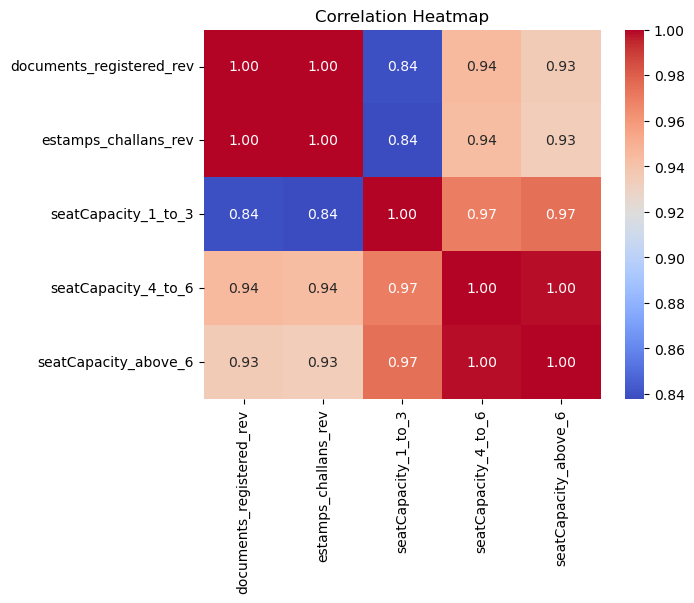

In [194]:
# Calculate the correlation matrix
correlation_matrix = merged_revenue_sales.corr()

# Visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

- Are there any particular sectors that have shown substantial investment in multiple districts between FY 2021 and 2022?

In [195]:
# Merge ts_ipass with districts and date on dist_code and start_date respectively
merged_ts_ipass = pd.merge(ts_ipass, districts, on='dist_code', how='left')
merged_ts_ipass = pd.merge(merged_ts_ipass, date, on='start_date', how='left')

# Filter data for FY 2021 and 2022
ts_ipass_fy_2021_2022 = merged_ts_ipass[(merged_ts_ipass['fiscal_year'] >= 2021) & (merged_ts_ipass['fiscal_year'] <= 2022)]

# Pivot table to get investment in each district for each sector
pivot_table = ts_ipass_fy_2021_2022.pivot_table(values='investment in cr', index=['sector'], columns='district', aggfunc='sum', fill_value=0)

# Sort sectors based on total investments
sorted_sectors = pivot_table.sum(axis=1).sort_values(ascending=False)

# Specify the number of top sectors you want to consider
top_n = 3

# Get the top N sectors
top_sectors = sorted_sectors.head(top_n)

# Find sectors present in more than half of the districts
half_districts = len(pivot_table.columns) / 2
substantial_sectors = pivot_table.loc[top_sectors[top_sectors > 0].index, :].dropna(thresh=half_districts)

# Display the sectors that meet the criteria
print("Sectors with Substantial Investment in Multiple Districts (FY 2021 to 2022):")
print(substantial_sectors.index)

Sectors with Substantial Investment in Multiple Districts (FY 2021 to 2022):
Index(['Pharmaceuticals and Chemicals', 'Plastic and Rubber',
       'Real Estate,Industrial Parks and IT Buildings'],
      dtype='object', name='sector')


- Can we identify any seasonal patterns or cyclicality in the investment trends for specific sectors? 

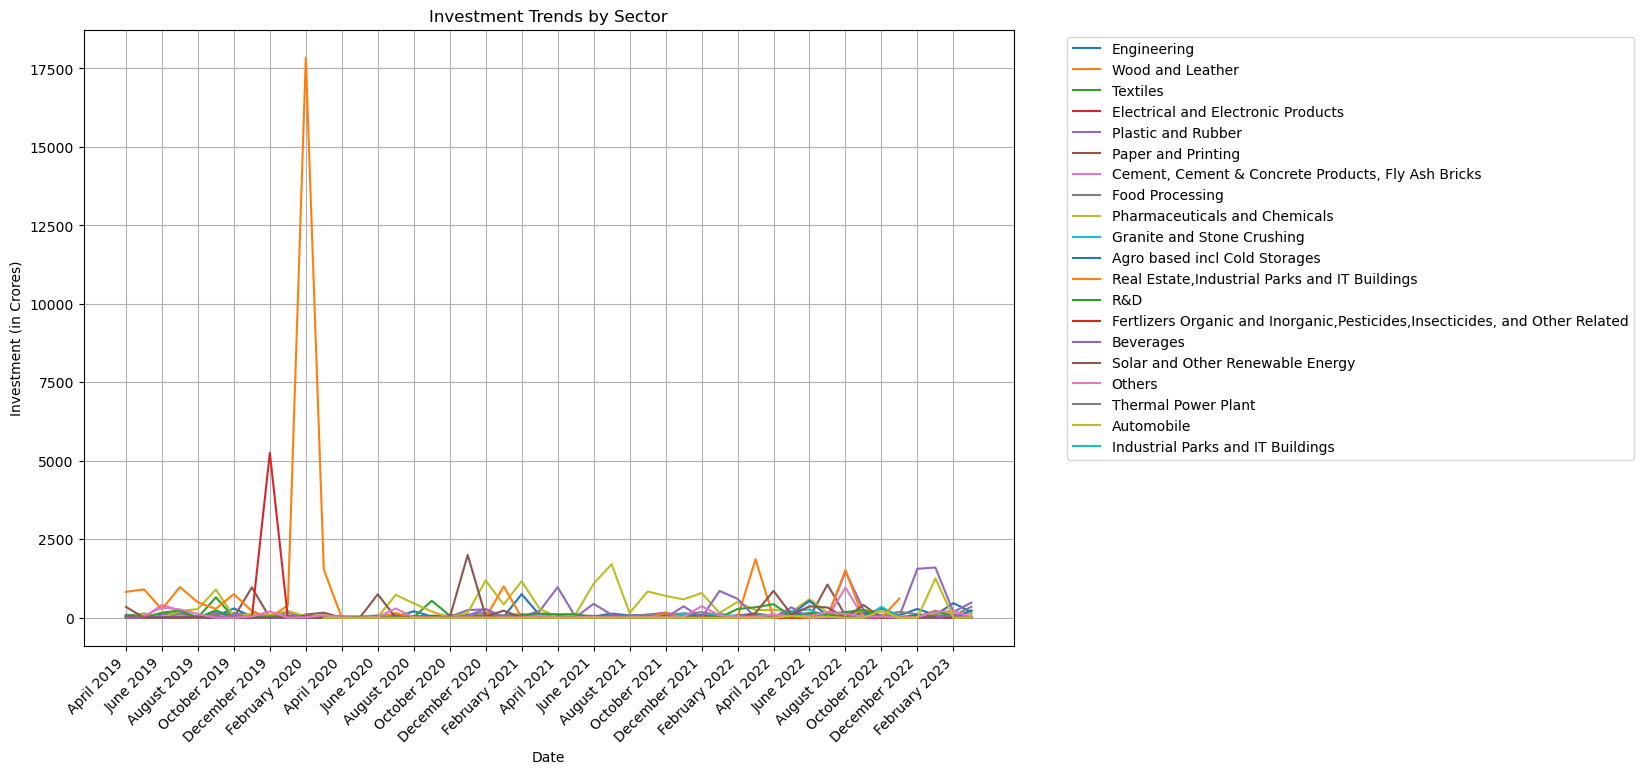

In [196]:
# Create a new DataFrame with 'start_date' as the index
ts_ipass_indexed = ts_ipass.set_index('start_date')

# Get the list of unique sectors
unique_sectors = ts_ipass['sector'].unique()

# Plot investment trends for all sectors
plt.figure(figsize=(12, 8))

for sector in unique_sectors:
    sector_data = ts_ipass_indexed[ts_ipass_indexed['sector'] == sector]
    monthly_investment = sector_data['investment in cr'].resample('M').sum()  # Corrected column name
    plt.plot(monthly_investment.index.strftime('%B %Y'), monthly_investment, label=sector)

plt.title('Investment Trends by Sector')
plt.xlabel('Date')
plt.ylabel('Investment (in Crores)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show ticks for every two months and tilt the date labels
plt.xticks(plt.xticks()[0][::2], rotation=45, ha="right")

plt.grid(True)
plt.show()

- Do certain sectors experience higher investments during particular months?

In [197]:
# Calculate total investments for each month
monthly_total_investments = ts_ipass_indexed.groupby(ts_ipass_indexed.index.to_period("M"))['investment in cr'].sum()

# Find the common months with the highest total investments
common_months = monthly_total_investments.sort_values(ascending=False).index.strftime('%B %Y')

print("Months with Highest Total Investments:")
print(common_months)

Months with Highest Total Investments:
Index(['February 2020', 'December 2019', 'August 2022', 'January 2023',
       'March 2022', 'November 2020', 'September 2019', 'July 2019',
       'July 2022', 'February 2021', 'June 2022', 'December 2022',
       'December 2020', 'July 2021', 'March 2020', 'April 2022',
       'January 2021', 'June 2021', 'February 2022', 'September 2022',
       'December 2021', 'April 2019', 'February 2023', 'March 2023',
       'November 2019', 'November 2021', 'October 2019', 'January 2022',
       'May 2019', 'July 2020', 'May 2022', 'June 2019', 'April 2021',
       'October 2022', 'October 2021', 'September 2021', 'August 2019',
       'June 2020', 'November 2022', 'January 2020', 'March 2021',
       'September 2020', 'August 2020', 'May 2021', 'August 2021',
       'October 2020', 'May 2020', 'April 2020'],
      dtype='object', name='start_date')


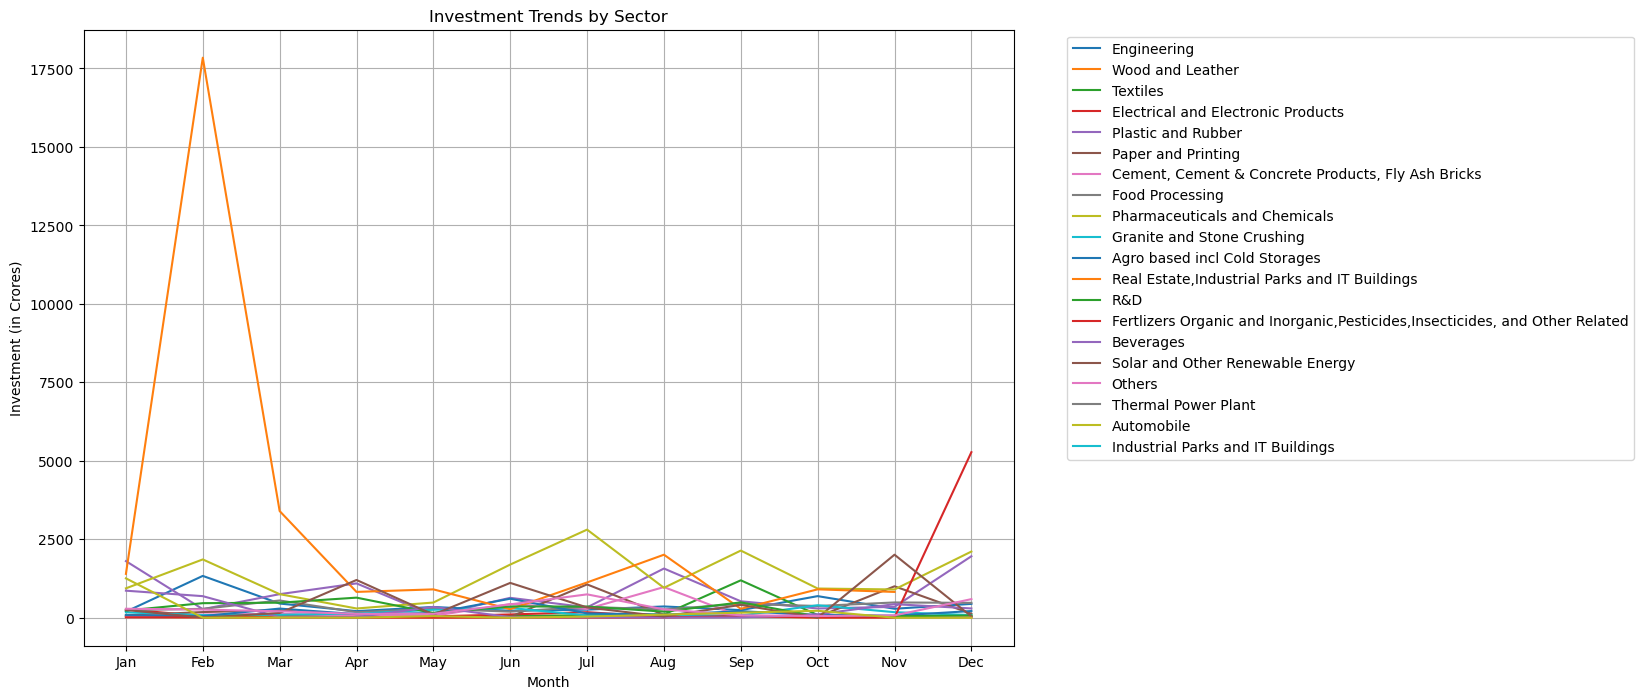

In [198]:
# Merge ts_ipass with other_data on 'start_date'
merged_data = pd.merge(ts_ipass, date, on='start_date')

# Create a new DataFrame with 'start_date' as the index
ts_ipass_indexed = merged_data.set_index('start_date')

# Get the list of unique sectors
unique_sectors = merged_data['sector'].unique()

# Plot investment trends for all sectors
plt.figure(figsize=(12, 8))

for sector in unique_sectors:
    sector_data = ts_ipass_indexed[ts_ipass_indexed['sector'] == sector]
    monthly_investment = sector_data.groupby(sector_data.index.month)['investment in cr'].sum()
    plt.plot(monthly_investment.index, monthly_investment, label=sector)

plt.title('Investment Trends by Sector')
plt.xlabel('Month')
plt.ylabel('Investment (in Crores)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Set month names as x-axis ticks
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(1, 13), month_names)  # Use range(1, 13) for the months

plt.grid(True)
plt.show()

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 28px; font-weight: bold; text-align: justify; color: #555;">Key Insights from Telangana Economic Data (FY 2019-2022):</h2>
<ul style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">
  <li><strong>Diverse Revenue Patterns:</strong> Hyderabad continues to drive economic growth, emphasizing the need for diversified revenue sources across districts.</li>
  <li><strong>District Success Model:</strong> Rangareddy's success highlights replicable strategies for other districts, emphasizing targeted investments in high-growth sectors.</li>
  <li><strong>Electric Vehicle Shift:</strong> Significant growth in electric vehicle sales, especially in Khammam and Bhadradri Kothagudem, signals a changing automotive landscape.</li>
  <li><strong>Sectoral Diversification:</strong> Overreliance on specific sectors, e.g., real estate in Rangareddy, underscores the importance of encouraging investments in diverse sectors like Pharmaceuticals and Renewable Energy.</li>
</ul>